# Departamento VICTORIA - Secundaria

En este documento tenenemos todo el codigo referido a la limpieza y análisis de los alumnos de colegios SECUNDARIOS del departamento Victoria.

In [2]:
library(readxl) #cargamos librerias que vamos a utilizar
library(dplyr)
library(stringr)
library(writexl)
library(fdth) 
library(ggplot2)

# Guia 1 - Limpieza y normalizacion del dataset

In [3]:
# -*- coding: utf-8 -*-
#El archivo esta en "ISO-8859-1", pero lo leemos en "UTF-8"
# Leemos el archivo CSV con read_csv()

#Dataset departamento VICTORIA
VICTORIA <- read.csv("/home/santiago/Documentos/TUPED/Exploracion_Datos_Multivariados/TP_VICTORIA/VICTORIA.csv")

#Dataset secundarias (Entre Rios 2023)
secundaria_2023 <- read.csv("/home/santiago/Documentos/TUPED/Exploracion_Datos_Multivariados/TP_VICTORIA/secundaria 2023 - xls_export.csv")

#Dataset secundaria por departamentos Entre Rios
secundaria_departamentos <- read.csv("/home/santiago/Documentos/TUPED/Exploracion_Datos_Multivariados/TP_VICTORIA/secundaria por departamentos 2023 - xls_export (11).csv")

## Trabajo primero sobre dataset VICTORIA 

### Hacemos una lectura del dataset

In [4]:
names(VICTORIA) #Vemos los nombres de todas las variables

[1] "X"                  "CUE"                "departamento"      
 [4] "localidad"          "CodigoPostal"       "EsPrivada"         
 [7] "turno"              "curso"              "periodoEvaluatorio"
[10] "idalumno"           "Documento"          "anioLectivo"       
[13] "asignatura"         "nota"               "observaciones"     
[16] "idSubOrganizacion"  "idDivision"         "NivelEnsenanza"    
[19] "orden"              "idOrganizaciones"   "ddivision"         
[22] "Nivel"              "esMultianio"        "IdModEnsenanza"    
[25] "Modalidad"          "ModEnsenaza"

In [5]:
str(VICTORIA) #Vemos variables cuantitativas(int) y cualitativas(char)

'data.frame':	320330 obs. of  26 variables:
 $ X                 : int  1 2 3 4 5 6 7 8 9 10 ...
 $ CUE               : int  9002121 9002121 9002121 9002121 9002121 9002121 9002121 9002121 9002121 9002121 ...
 $ departamento      : chr  "VICTORIA" "VICTORIA" "VICTORIA" "VICTORIA" ...
 $ localidad         : chr  "VICTORIA" "VICTORIA" "VICTORIA" "VICTORIA" ...
 $ CodigoPostal      : int  3151 3151 3151 3151 3151 3151 3151 3151 3151 3151 ...
 $ EsPrivada         : chr  "N" "N" "N" "N" ...
 $ turno             : chr  "TARDE" "TARDE" "TARDE" "TARDE" ...
 $ curso             : chr  "4 - M Prim" "4 - M Prim" "4 - M Prim" "4 - M Prim" ...
 $ periodoEvaluatorio: chr  "Primer Trimestre" "Primer Trimestre" "Primer Trimestre" "Primer Trimestre" ...
 $ idalumno          : int  672655 672655 672655 672655 852106 852106 852106 852106 852106 852106 ...
 $ Documento         : int  53400853 53400853 53400853 53400853 53799627 53799627 53799627 53799627 53799627 53799627 ...
 $ anioLectivo       : int  2

In [6]:
#cambiamos los nombres de las variables para un mejor entendimiento
VICTORIA <- rename(VICTORIA, c("CodigoUnicoEscolar" = "CUE", "ModEnseñanza" = "ModEnsenaza", "año" = "anioLectivo", "esMultiaño" ="esMultianio", "IdModEnseñanza" = "IdModEnsenanza","NivelEnseñanza" = "NivelEnsenanza"))
names(VICTORIA)

[1] "X"                  "CodigoUnicoEscolar" "departamento"      
 [4] "localidad"          "CodigoPostal"       "EsPrivada"         
 [7] "turno"              "curso"              "periodoEvaluatorio"
[10] "idalumno"           "Documento"          "año"               
[13] "asignatura"         "nota"               "observaciones"     
[16] "idSubOrganizacion"  "idDivision"         "NivelEnseñanza"    
[19] "orden"              "idOrganizaciones"   "ddivision"         
[22] "Nivel"              "esMultiaño"         "IdModEnseñanza"    
[25] "Modalidad"          "ModEnseñanza"

In [7]:
#Descubrimos una varible, que se encuentra dos veces en el conjunto de datos
son_repetidas <- VICTORIA$idDivision == VICTORIA$ddivision #Chequeamos si esta repetida (ddivision = idDivision ????)
print(son_repetidas)

    [1] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
   [15] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
   [29] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
   [43] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
   [57] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
   [71] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
   [85] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
   [99] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
  [113] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
  [127] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
  [141] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
  [155] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
  [169] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE T

In [8]:
VICTORIA$ddivision <- NULL #Eliminamos la variable ddivison
dim(VICTORIA) #Vemos tamaño dataset --> se reduce a 25 variables
names(VICTORIA)

[1] 320330     25

[1] "X"                  "CodigoUnicoEscolar" "departamento"      
 [4] "localidad"          "CodigoPostal"       "EsPrivada"         
 [7] "turno"              "curso"              "periodoEvaluatorio"
[10] "idalumno"           "Documento"          "año"               
[13] "asignatura"         "nota"               "observaciones"     
[16] "idSubOrganizacion"  "idDivision"         "NivelEnseñanza"    
[19] "orden"              "idOrganizaciones"   "Nivel"             
[22] "esMultiaño"         "IdModEnseñanza"     "Modalidad"         
[25] "ModEnseñanza"

In [9]:
#Reemplazamos los datos de (Victoria$nota) no numericos EPAC/ PA / UP
unique(VICTORIA$nota)

[1] "8"    "7"    "6"    "9"    "10"   "EPAC" "NULL" "UP"   "PA"   "5"   
[11] "4"    "3"    "2"    "1"

In [10]:
#reemplazamos las notas "EPAC", "UP" y "PA" 
VICTORIA$nota[VICTORIA$nota %in% c("EPAC")] <- 5
VICTORIA$nota[VICTORIA$nota %in% c("PA")] <- 6
VICTORIA$nota[VICTORIA$nota %in% c("UP")] <- 7
VICTORIA$nota <- suppressWarnings(as.numeric(VICTORIA$nota)) #convertimos la variable nota a tipo numérico

unique(VICTORIA$nota)

[1]  8  7  6  9 10  5 NA  4  3  2  1

## Creamos dataset Victoria_secundaria

Ahora tomamos del dataset VICTORIA todos los datos correspondientes a colegios Secundarios

In [11]:
#Analizamos las variables que tenemos disponibles
cat("NivelEnsenaza: ",unique(VICTORIA$NivelEnseñanza),"\n") #Datos que hay en variable "NivelEnseñanza"
cat("ModEnsenanza: ", unique(VICTORIA$ModEnseñanza),"\n") #Datos que hay en variable "ModEnseñanza"
cat("Modalida: ", unique(VICTORIA$Modalidad)) #Datos que hay en variable "Modalidad"

NivelEnsenaza:  PRIMARIO SECUNDARIO 
ModEnsenanza:  Comun Escuelas NINA Artistica Ed.Especial Adultos T�cnica Agrot�cnica Cap Tecnica Priv S/D 
Modalida:  Primaria Inicial Secundaria NULL Secundaria 3 a�os Primaria 3 ciclos

In [12]:
#Se guardan los alumnos que cursan en la Secundaria
VICTORIA_Secundaria <- filter(VICTORIA, NivelEnseñanza == "SECUNDARIO" & (ModEnseñanza == "Comun" | ModEnseñanza == "T\xe9cnica" | ModEnseñanza =="Agrot\xe9cnica") & esMultiaño == "N" & Modalidad == "Secundaria") 

In [13]:
cat("Secundarias en dpto. Victoria: ", length(unique(VICTORIA_Secundaria$CodigoUnicoEscolar)), "\n")
cat("Secundarias en la provincia de Entre Rios:", length(unique(secundaria_2023$CUE)), "\n")

Secundarias en dpto. Victoria:  21 
Secundarias en la provincia de Entre Rios: 578 


In [14]:
dim(VICTORIA_Secundaria) #Tamaño del dataset correspondiente a Secundarias

[1] 128743     25

### Creamos nuevas variables que ayuden a resolver el análisis, como por ejemplo Notas Primer/Segundo/Tercer Trimestre, Promedio, Condición Final en la materia.

#### Solucionamos el tema de los caracteres MA\xd1ANA --> MAÑANA

En ese caso me vi obligado a hacerlo manualmente por un error que no pude resolver de la codificacion UTF-8 del.csv

In [15]:
#Chequeamos que tenemos mal codificaco un caracter en MA\xd1ANA
unique(VICTORIA_Secundaria$turno)

#Convertimos la columna 'turno' a codificacion UTF-8
VICTORIA_Secundaria$turno <- iconv(VICTORIA_Secundaria$turno, to = "UTF-8", sub = "byte")

#Reemplazamos todas las instancias del valor incorrecto 'MA<d1>ANA' con el valor correcto 'MAÑANA'
VICTORIA_Secundaria$turno <- gsub("MA<d1>ANA", "MAÑANA", VICTORIA_Secundaria$turno)

#Chequeamos el resultado
unique(VICTORIA_Secundaria$turno)

[1] "TARDE"     "ROTATIVO"  "MA\xd1ANA" "NOCHE"

[1] "TARDE"    "ROTATIVO" "MAÑANA"   "NOCHE"

In [16]:
#Dividimos el dataset VICTORIA_Secundaria en 3 dataset (Primer Trimestres - Segundo Trimestre - Tercer Trimestre)
PrimerT_secundaria <- filter(VICTORIA_Secundaria, periodoEvaluatorio == "Primer Trimestre")
PrimerT_secundaria <- rename(PrimerT_secundaria,NotasPrimerT = nota)
SegundoT_secundaria <- filter(VICTORIA_Secundaria, periodoEvaluatorio == "Segundo Trimestre")
SegundoT_secundaria <- rename(SegundoT_secundaria,NotasSegundoT = nota)
TercerT_secundaria <- filter(VICTORIA_Secundaria, periodoEvaluatorio == "Tercer Trimestre")
TercerT_secundaria <- rename(TercerT_secundaria,NotasTercerT = nota)

In [17]:
#Fusionamos los 3 daset usando las columnas Documento (DNI) y Asignatura como claves para la fusion
#"Claves de fusion" --> Columnas que deben coincidir en los conjuntos de datos que se están fusionando

aux1 <- merge(x = PrimerT_secundaria, y = SegundoT_secundaria, by = c("Documento", "asignatura"))
auxiliar1 <- merge(x = aux1, y = TercerT_secundaria, by = c("Documento", "asignatura"))

In [18]:
#Nos quedamos con las columnas de nuestro interes
Notas_Victoria_secundaria <- select(auxiliar1, 'CodigoUnicoEscolar', 'departamento', 'localidad', 'EsPrivada', 'turno' , 'curso' , 'periodoEvaluatorio' , 'Documento', 'asignatura','idalumno', 'observaciones', 'idSubOrganizacion', 'idDivision', 'NivelEnseñanza', 'orden','Nivel', 'esMultiaño', 'IdModEnseñanza', 'Modalidad', 'ModEnseñanza', 'año','NotasPrimerT','NotasSegundoT', 'NotasTercerT')

In [19]:
#Agregamos nueva columna 'Promedio'.Esta nueva variable vendria a ser el promedio de los 3 trimestres
Notas_Victoria_secundaria$Promedio <-round ((as.numeric(Notas_Victoria_secundaria$NotasPrimerT)+as.numeric(Notas_Victoria_secundaria$NotasSegundoT)+as.numeric(Notas_Victoria_secundaria$NotasTercerT))/3,2)

#Agregamos nueva columna 'Condicion' 
# Según el promedio conseguido tendra aprobado el año lectivo o tendrá que rendir. 
# Los alumnos que tengas una nota menor a 6 en el tercer trimestre tendrán que rendir.
# Los estudiantes que no tengan las 3 notas correspondientes a cada trimestre tendrán un registro incompleto
Notas_Victoria_secundaria <- Notas_Victoria_secundaria %>% 
    mutate(Condición = case_when(
      Promedio >= 6 & NotasTercerT >= 6 ~ "Aprobado", 
      Promedio <=6 | NotasTercerT < 6 ~ "Rinde",  
      TRUE~ "sin registro completo")) 

In [21]:
head(Notas_Victoria_secundaria)

,CodigoUnicoEscolar,departamento,localidad,EsPrivada,turno,curso,periodoEvaluatorio,Documento,asignatura,idalumno,⋯,esMultiaño,IdModEnseñanza,Modalidad,ModEnseñanza,año,NotasPrimerT,NotasSegundoT,NotasTercerT,Promedio,Condición
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<int>,⋯,<chr>,<int>,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,9008373,VICTORIA,VICTORIA,N,NOCHE,3 - B 4000A,Tercer Trimestre,37098670,TECNOLOGIA DE LA INFORMACION Y LA COMUNICACION,1157557,⋯,N,5,Secundaria,Comun,2023,3,3,1,2.33,Rinde
2,9008373,VICTORIA,VICTORIA,N,NOCHE,3 - B 4000A,Tercer Trimestre,37098670,TUTORIAS,1157557,⋯,N,5,Secundaria,Comun,2023,2,2,2,2.00,Rinde
3,9008373,VICTORIA,VICTORIA,N,NOCHE,3 - B 4000A,Tercer Trimestre,38052214,HISTORIA,907312,⋯,N,5,Secundaria,Comun,2023,9,9,9,9.00,Aprobado
4,9008373,VICTORIA,VICTORIA,N,NOCHE,3 - B 4000A,Tercer Trimestre,38052214,LENGUA Y LITERATURA,907312,⋯,N,5,Secundaria,Comun,2023,9,7,10,8.67,Aprobado
5,9008373,VICTORIA,VICTORIA,N,NOCHE,3 - B 4000A,Tercer Trimestre,38052214,LENGUAJE Y PRODUCCION MUSICAL II,907312,⋯,N,5,Secundaria,Comun,2023,10,10,10,10.00,Aprobado
6,9008373,VICTORIA,VICTORIA,N,NOCHE,3 - B 4000A,Tercer Trimestre,38052214,LENGUAJE Y PRODUCCION VISUAL II,907312,⋯,N,5,Secundaria,Comun,2023,8,9,8,8.33,Aprobado


### Unificamos los nombres de las asignaturas (normalizacion)

Nuevamente me veo obligado a modificar manualmente la codificacion. En esta parte cobra una mayor importancia ya que vamos a normalizar los nombres de las asignaturas, no queremos que una misma asignatura sea referida con dos nombres distintos.

In [22]:
#Para evitarnos errores con la codificacion UTF-8 a la hora de normalizar, convertimos todo a ASCII (evito problemas con las tildes)
Notas_Victoria_secundaria$asignatura <- iconv(Notas_Victoria_secundaria$asignatura, from = "UTF-8", to = "ASCII", sub = "")

In [23]:
#Convertimos todos los nombres a MAYUSCULA
Notas_Victoria_secundaria$asignatura <- toupper(Notas_Victoria_secundaria$asignatura)
#Chequeamos
unique(Notas_Victoria_secundaria$asignatura)

[1] "TECNOLOGIA DE LA INFORMACION Y LA COMUNICACION"            
  [2] "TUTORIAS"                                                  
  [3] "HISTORIA"                                                  
  [4] "LENGUA Y LITERATURA"                                       
  [5] "LENGUAJE Y PRODUCCION MUSICAL II"                          
  [6] "LENGUAJE Y PRODUCCION VISUAL II"                           
  [7] "LENGUAS EXTRANJERAS"                                       
  [8] "MATEMATICA"                                                
  [9] "PRODUCCION MULTIMEDIAL EN LENGUAJES ART. I Y II"           
 [10] "PRODUCCIONES ARTISTICAS INTEGRADAS"                        
 [11] "PSICOLOGIA"                                                
 [12] "BIOLOGIA"                                                  
 [13] "EDUCACION TECNOLOGICA"                                     
 [14] "CULTURA Y ESTETICA"                                        
 [15] "FORMACION ETICA Y CIUDADANA"                               
 [16] "CIRCUITOS TURISTICOS I Y II"                               
 [17] "DESARROLLO DE LOCALIDADES TURISTICAS"                      
 [18] "EDUCACION FISICA"                                          
 [19] "EMPRESAS TURISTICAS"                                       
 [20] "GEOGRAFIA"                                                 
 [21] "INFRAESTRUCTURA TURISTICA Y TURISMO TERMAL"                
 [22] "LITERATURA ARGENTINA"                                      
 [23] "PRACTICAS EDUCATIVAS"                                      
 [24] "FISICA"                                                    
 [25] "LENGUAJE Y PRODUCCION MUSICAL I"                           
 [26] "LENGUAJE Y PRODUCCION VISUAL I"                            
 [27] "MICROECONOMIA"                                             
 [28] "PRINCIPIOS BASICOS DE CONTABILIDAD"                        
 [29] "QUIMICA"                                                   
 [30] "TEORIA Y GESTION DE LAS ORGANIZACIONES I"                  
 [31] "FILOSOFIA"                                                 
 [32] "LITERATURA LATINOAMERICANA"                                
 [33] "TECNOLOGIA DE LA INFORMACION Y COMUNICACION"               
 [34] "INTRODUCCION A LA HOSPITALIDAD"                            
 [35] "INTRODUCCION AL TURISMO"                                   
 [36] "TUTORIAS DISCIPLINARES"                                    
 [37] "DERECHO COMERCIAL"                                         
 [38] "LEGISLACION LABORAL Y PRACTICA IMPOSITIVA"                 
 [39] "MACROECONOMIA"                                             
 [40] "SISTEMA DE INFORMACION CONTABLE"                           
 [41] "TEORIA Y GESTION DE LAS ORGANIZACIONES II"                 
 [42] "FILOSOFIA II"                                              
 [43] "GEOGRAFIA AMBIENTAL"                                       
 [44] "METODOLOGIA DE LA INVESTIGACION"                           
 [45] "SOCIOLOGIA"                                                
 [46] "TEORIA Y GESTION DE LAS ORGANIZACIONES"                    
 [47] "ECONOMIA"                                                  
 [48] "ECOLOGIA"                                                  
 [49] "INTRODUCCION A LA INVESTIGACION EN CIENCIAS NATURALES"     
 [50] "ORGANIZACION INDUSTRIAL Y RELACIONES HUMANAS"              
 [51] "PROYECTO DE PRACTICAS PROFESIONALIZANTES"                  
 [52] "QUIMICA ANALITICA CUANTITATIVA"                            
 [53] "QUIMICA ORGANICA II"                                       
 [54] "TECNOLOGIA DE LOS ALIMENTOS"                               
 [55] "TRABAJOS PRACTICOS DE QUIMICA ANALITICA CUANTIT."          
 [56] "TRABAJOS PRACTICOS DE QUIMICA INDUSTRIAL APLICADA"         
 [57] "TRABAJOS PRACTICOS DE QUIMICA ORGANICA II"                 
 [58] "TRABAJOS PRACTICOS DE TECNOL. DE LOS ALIMENTOS"            
 [59] "TEATRO"                                                    
 [60] "INTRODUCCION A LA ADMINISTRACION"         

In [24]:
cat("Cantidad de nombres de asignaturas: ", length(unique(Notas_Victoria_secundaria$asignatura)), "\n")

Cantidad de nombres de asignaturas:  182 


In [25]:
#Normalizamos los nombres de las asignaturas en el conjunto de datos.
#Nos aseguramos que las asignaturas que refieren a lo mismo sean llamadas de igual manera.

Notas_Victoria_secundaria$asignatura <- str_replace_all(Notas_Victoria_secundaria$asignatura, ".*BIOLOGIA.*", "BIOLOGIA")
Notas_Victoria_secundaria$asignatura <- str_replace_all(Notas_Victoria_secundaria$asignatura, ".*MATEMATICA*", "MATEMATICA")
Notas_Victoria_secundaria$asignatura <- str_replace_all(Notas_Victoria_secundaria$asignatura, ".*LENGUA*", "LENGUA")
Notas_Victoria_secundaria$asignatura <- str_replace_all(Notas_Victoria_secundaria$asignatura, ".*EXTRANJERA*", "INGLES")
Notas_Victoria_secundaria$asignatura <- str_replace_all(Notas_Victoria_secundaria$asignatura, ".*GEOGRAFIA.*", "GEOGRAFIA")
Notas_Victoria_secundaria$asignatura <- str_replace_all(Notas_Victoria_secundaria$asignatura, ".*HISTORIA*", "HISTORIA")
Notas_Victoria_secundaria$asignatura <- str_replace_all(Notas_Victoria_secundaria$asignatura, ".*BIOLOGIA.*", "BIOLOGIA")
Notas_Victoria_secundaria$asignatura <- str_replace_all(Notas_Victoria_secundaria$asignatura, ".*ETICA*", "ETICA")
Notas_Victoria_secundaria$asignatura <- str_replace_all(Notas_Victoria_secundaria$asignatura, ".*MUSICA*", "MUSICA")
Notas_Victoria_secundaria$asignatura <- str_replace_all(Notas_Victoria_secundaria$asignatura, ".*ETICA*", "ETICA")
Notas_Victoria_secundaria$asignatura <- str_replace_all(Notas_Victoria_secundaria$asignatura, ".*FILOSOFIA*", "FILOSOFIA")
Notas_Victoria_secundaria$asignatura <- str_replace_all(Notas_Victoria_secundaria$asignatura, ".*ECONOMIA*", "ECONOMIA")
Notas_Victoria_secundaria$asignatura <- str_replace_all(Notas_Victoria_secundaria$asignatura, ".*FISICO QUIMICA*", "FISICA Y QUIMICA")
Notas_Victoria_secundaria$asignatura <- gsub("AUTO C.A.D", "C.A.D", Notas_Victoria_secundaria$asignatura)
Notas_Victoria_secundaria$asignatura <- gsub("DERECHO COMERCIAL", "DERECHO", Notas_Victoria_secundaria$asignatura)
Notas_Victoria_secundaria$asignatura <- gsub("CEREALES Y OLEAGINOSAS|MARCO JURIDICO DE LOS CIENCIAS AGROPECUARIAS |PRODUCCION HORTICOLA|PRODUCCION DE PLANTAS EN VIVERO |PRODUCCION DE FORRAJES|PRODUCCION DE CERDOS|PRODUCCION DE CAPRINOS|PRODUCCION BOVINO PARA CARNE|PROCESOS PRODUCTIVOS|INSTALACIONES AGROPECUARIAS|CIENCIAS NATURALES APLICADAS A PRO. AGROPECUARIOS|INDUSTRIA DE PROD. LACTEOS DE BOVINO O CAPRINO|INDUSTRIA CARNE PORCINA", "CIENCIAS AGROPECUARIAS", Notas_Victoria_secundaria$asignatura)
Notas_Victoria_secundaria$asignatura <- gsub("CIENCIAS NATURALES (FISICO QUIMICA)|FISICO Y QUIMICA)|CIENCIAS NATURALES FISICO-QUIMICA|FISICA Y QUIMICA|ESPACIO DE LA ORIENTACION EN CIENCIAS NATURALES (FISICO QUIMICA)", "FISICO Y QUIMICA", Notas_Victoria_secundaria$asignatura)
Notas_Victoria_secundaria$asignatura <- gsub("CIRCUITOS TURISTICOS I Y II|MARKETING TURISTICO|INTRODUCCION AL TURISMO|EMPRESAS TURISTICAS|INFRAESTRUCTURA TURISTICA Y TURISMO TERMAL II|INFRAESTRUCTURA TURISTICA Y TURISMO TERMAL I|INFRAESTRUCTURA TURISTICA Y TURISMO TERMAL|CIRCUITOS TURISTICOS II|DESARROLLO DE LOCALIDADES TURISTICAS", "TURISMO", Notas_Victoria_secundaria$asignatura)
Notas_Victoria_secundaria$asignatura <- gsub("ECONOMIA II", "ECONOMIA", Notas_Victoria_secundaria$asignatura)
Notas_Victoria_secundaria$asignatura <- gsub("ETICA Y CIUDADANA|ETICAS CONTEMPORANEAS I", "ETICA", Notas_Victoria_secundaria$asignatura)
Notas_Victoria_secundaria$asignatura <- gsub("FILOSOFIA II", "FILOSOFIA", Notas_Victoria_secundaria$asignatura)
Notas_Victoria_secundaria$asignatura <- gsub("FISICA APLICADA|TRABAJOS PRACTICOS DE FISICA APLICADA", "FISICA", Notas_Victoria_secundaria$asignatura)
Notas_Victoria_secundaria$asignatura <- gsub("FRANCÉS", "FRANCES", Notas_Victoria_secundaria$asignatura)
Notas_Victoria_secundaria$asignatura <- gsub("INGLES (INGLES)|INGLES (INGLES)|INGLESS", "INGLES", Notas_Victoria_secundaria$asignatura)
Notas_Victoria_secundaria$asignatura <- gsub("PORTUGUÉS", "PORTUGUES", Notas_Victoria_secundaria$asignatura)
Notas_Victoria_secundaria$asignatura <- gsub("QUIMICA ANALITICA CUALITATIVA|QUIMICA APLICADA|TRABAJOS PRACTICOS DE QUIMICA ORGANICA II|TRABAJOS PRACTICOS DE QUIMICA ORGANICA |TRABAJOS PRACTICOS DE QUIMICA INORGANICA |TRABAJOS PRACTICOS DE QUIMICA INDUSTRIAL APLICADA |TRABAJOS PRACTICOS DE QUIMICA INDUSTRIAL|TRABAJOS PRACTICOS DE QUIMICA GENERAL|TRABAJOS PRACTICOS DE QUIMICA ANALITICA CUANTIT.|TRABAJOS PRACTICOS DE PROC. Y OPERACIONES QUIMICAS|TRABAJOS PRACTICOS DE PROC. Y OPERACIONES QUIMICAS|QUIMICA ANALITICA CUANTITATIVA|QUIMICA GENERAL|QUIMICA INORGANICA|QUIMICA ORGANICA II|TALLER MODULAR QUIMICA", "QUIMICA", Notas_Victoria_secundaria$asignatura)
Notas_Victoria_secundaria$asignatura <- gsub("TECNOLOGIA I|TECNOLOGIA II|TECNOLOGIA III|EDUCACION TECNOLOGICA", "TECNOLOGIA", Notas_Victoria_secundaria$asignatura)
Notas_Victoria_secundaria$asignatura <- gsub("TUTORIAS DISCIPLINARES", "TUTORIAS", Notas_Victoria_secundaria$asignatura)
Notas_Victoria_secundaria$asignatura <- gsub("GESTION DE LA PRODUCCION ARTISTICA", "ARTES VISUALES", Notas_Victoria_secundaria$asignatura)
Notas_Victoria_secundaria$asignatura <- gsub("HISTORIA)", "HISTORIA", Notas_Victoria_secundaria$asignatura)
Notas_Victoria_secundaria$asignatura <- gsub("MATEMATICA|MATEMATICAO", "MATEMATICA", Notas_Victoria_secundaria$asignatura)
Notas_Victoria_secundaria$asignatura <- gsub("LENGUA Y LITERATURA|LITERATURA ARGENTINA|LITERATURA LATINOAMERICANA", "LENGUA Y LITERATURA", Notas_Victoria_secundaria$asignatura)
Notas_Victoria_secundaria$asignatura <- gsub("INGLES\\s*\\(INGLES\\)", "INGLES", Notas_Victoria_secundaria$asignatura)

In [26]:
cat("Cantidad de nombres de asignaturas: ", length(unique(Notas_Victoria_secundaria$asignatura)), "\n")

Cantidad de nombres de asignaturas:  125 


In [27]:
#Chequeamos
unique(Notas_Victoria_secundaria$asignatura)

[1] "TECNOLOGIA DE LA INFORMACION Y LA COMUNICACION"            
  [2] "TUTORIAS"                                                  
  [3] "HISTORIA"                                                  
  [4] "LENGUA Y LITERATURA"                                       
  [5] "MUSICAL II"                                                
  [6] "LENGUAJE Y PRODUCCION VISUAL II"                           
  [7] "INGLES"                                                    
  [8] "MATEMATICA"                                                
  [9] "LENGUAJES ART. I Y II"                                     
 [10] "PRODUCCIONES ARTISTICAS INTEGRADAS"                        
 [11] "PSICOLOGIA"                                                
 [12] "BIOLOGIA"                                                  
 [13] "TECNOLOGIA"                                                
 [14] "ETICA"                                                     
 [15] "TURISMO"                                                   
 [16] "EDUCACION FISICA"                                          
 [17] "GEOGRAFIA"                                                 
 [18] "PRACTICAS EDUCATIVAS"                                      
 [19] "FISICA"                                                    
 [20] "MUSICAL I"                                                 
 [21] "LENGUAJE Y PRODUCCION VISUAL I"                            
 [22] "ECONOMIA"                                                  
 [23] "PRINCIPIOS BASICOS DE CONTABILIDAD"                        
 [24] "QUIMICA"                                                   
 [25] "TEORIA Y GESTION DE LAS ORGANIZACIONES I"                  
 [26] "FILOSOFIA"                                                 
 [27] "TECNOLOGIA DE LA INFORMACION Y COMUNICACION"               
 [28] "INTRODUCCION A LA HOSPITALIDAD"                            
 [29] "DERECHO"                                                   
 [30] "LEGISLACION LABORAL Y PRACTICA IMPOSITIVA"                 
 [31] "SISTEMA DE INFORMACION CONTABLE"                           
 [32] "TEORIA Y GESTION DE LAS ORGANIZACIONES II"                 
 [33] "METODOLOGIA DE LA INVESTIGACION"                           
 [34] "SOCIOLOGIA"                                                
 [35] "TEORIA Y GESTION DE LAS ORGANIZACIONES"                    
 [36] "ECOLOGIA"                                                  
 [37] "INTRODUCCION A LA INVESTIGACION EN CIENCIAS NATURALES"     
 [38] "ORGANIZACION INDUSTRIAL Y RELACIONES HUMANAS"              
 [39] "PROYECTO DE PRACTICAS PROFESIONALIZANTES"                  
 [40] "TECNOLOGIA DE LOS ALIMENTOS"                               
 [41] "QUIMICA APLICADA"                                          
 [42] "TRABAJOS PRACTICOS DE TECNOL. DE LOS ALIMENTOS"            
 [43] "TEATRO"                                                    
 [44] "INTRODUCCION A LA ADMINISTRACION"                          
 [45] "MUSICA"                                                    
 [46] "ARTES VISUALES"                                            
 [47] "ESPACIO DE LA ORIENTACION EN CIENCIAS NATURALES"           
 [48] "PORTUGUS"                                                  
 [49] "FISICO Y QUIMICA"                                          
 [50] "FRANCES"                                                   
 [51] "EDI CONTAMINACION AMBIENTAL"                               
 [52] "EDI: COOPERATIVISMO Y FORMAS DE ORGANIZACION LABOR"        
 [53] "MATEMATICA APLICADA"                                       
 [54] "CIENCIAS AGROPECUARIAS"                                    
 [55] "PROYECTO PRODUCTIVO TECNOLOGICO"                           
 [56] "TECNOLOGIA DE CONTROL"                                     
 [57] "TECNOLOGIA DE GESTION"                                     
 [58] "LENGUAJE CORPORAL Y DANZA O TEATRO"                        
 [59] "SEMINARIO DE PRACTICA PROFESIONAL"                         
 [60] "FORMULACION DE PROYECTOS PRODUCTIVOS"     

In [28]:
#Filtramos lo cursos (CN - RURAL CNR), no nos sirven para el analisis
table(Notas_Victoria_secundaria$curso)
Notas_Victoria_secundaria <- Notas_Victoria_secundaria[Notas_Victoria_secundaria$curso != "CN - RURAL CNR", ]
table(Notas_Victoria_secundaria$curso)


                  1 - 1 CBC                1 - 1 RCBCET 
                        837                         295 
                  1 - 2 CBC                1 - 2 RCBCET 
                        568                         370 
                  1 - 3 CBC                1 - 3 RCBCET 
                        463                         319 
                  1 - 4 CBC                1 - 4 RCBCET 
                        630                         310 
                  1 - 5 CBC                1 - 5 RCBEAT 
                        195                         700 
                1 - A 4000E                   1 - A ART 
                         20                         360 
                  1 - A CBC 1 - A Cs. Soc y Hum 485/10C 
                       1714                           1 
                1 - B 4000A                   1 - B CBC 
                        154                         394 
                1 - C 4000A                   1 - C CBC 
                        102   


                  1 - 1 CBC                1 - 1 RCBCET 
                        837                         295 
                  1 - 2 CBC                1 - 2 RCBCET 
                        568                         370 
                  1 - 3 CBC                1 - 3 RCBCET 
                        463                         319 
                  1 - 4 CBC                1 - 4 RCBCET 
                        630                         310 
                  1 - 5 CBC                1 - 5 RCBEAT 
                        195                         700 
                1 - A 4000E                   1 - A ART 
                         20                         360 
                  1 - A CBC 1 - A Cs. Soc y Hum 485/10C 
                       1714                           1 
                1 - B 4000A                   1 - B CBC 
                        154                         394 
                1 - C 4000A                   1 - C CBC 
                        102   

In [29]:
#Recordamos la variable nueva creada anteriormente 'Condicion'
unique(Notas_Victoria_secundaria$Condición)
#No nos sirven los alumnos 'SIN REGISTRO COMPLETO' para el analisis
Notas_Victoria_secundaria <- subset(Notas_Victoria_secundaria, Condición != "sin registro completo")
unique(Notas_Victoria_secundaria$Condición)

[1] "Rinde"                 "Aprobado"              "sin registro completo"

[1] "Rinde"    "Aprobado"

In [30]:
#Creamos nueva variable "Año_Curso"

#Para ello convertimos todos los datos en 'Condición' en caracteres (strings)
Notas_Victoria_secundaria$curso <- as.character(Notas_Victoria_secundaria$curso)
#En la nueva variable 'Año_Curso" guardo 
Notas_Victoria_secundaria$Año_Curso <- substr(Notas_Victoria_secundaria$curso, 1, 1)
table(Notas_Victoria_secundaria$Año_Curso)
#Ahora reemplazo el numero por su equivalente en palabras
Notas_Victoria_secundaria$Año_Curso <- str_replace(Notas_Victoria_secundaria$Año_Curso, "1" , "PRIMERO")
Notas_Victoria_secundaria$Año_Curso <- str_replace(Notas_Victoria_secundaria$Año_Curso, "2" , "SEGUNDO")
Notas_Victoria_secundaria$Año_Curso <- str_replace(Notas_Victoria_secundaria$Año_Curso, "3" , "TERCERO")
Notas_Victoria_secundaria$Año_Curso <- str_replace(Notas_Victoria_secundaria$Año_Curso, "4" , "CUARTO")
Notas_Victoria_secundaria$Año_Curso <- str_replace(Notas_Victoria_secundaria$Año_Curso, "5" , "QUINTO")
Notas_Victoria_secundaria$Año_Curso <- str_replace(Notas_Victoria_secundaria$Año_Curso, "6" , "SEXTO")
Notas_Victoria_secundaria$Año_Curso <- str_replace(Notas_Victoria_secundaria$Año_Curso, "7" , "SEPTIMO")

table(Notas_Victoria_secundaria$Año_Curso)


    1     2     3     4     5     6     7 
 7863 10225  8301  8239  7582  8657   819 


 CUARTO PRIMERO  QUINTO SEGUNDO SEPTIMO   SEXTO TERCERO 
   8239    7863    7582   10225     819    8657    8301 

In [31]:
dim(Notas_Victoria_secundaria)

[1] 51686    27

In [32]:
#Guardamos el dataset Victoria_secundaria limpio como xlsx
write_xlsx(Notas_Victoria_secundaria, "/home/santiago/Documentos/TUPED/Exploracion_Datos_Multivariados/TP_VICTORIA/VICTORIA_SECUNDARIA_LIMPIA.xlsx")

### Completamos tabla calculo representatividad 

In [33]:
#Dataset con todos los datos de la secundaria ordenados por departamento
#Usamos Departamento == 'VICTORIA'
names(secundaria_departamentos)
head(secundaria_departamentos)

[1] "X"            "X.1"          "X.2"          "X.3"          "X.4"         
 [6] "Ciclo.Básico" "X.5"          "X.6"          "Orientado"    "X.7"         
[11] "X.8"          "X.9"          "X.10"         "X.11"

,X,X.1,X.2,X.3,X.4,Ciclo.Básico,X.5,X.6,Orientado,X.7,X.8,X.9,X.10,X.11
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,Departamento,Sector,Ámbito,Tipo,Todos,1er Año/Grado,2do Año/Grado,3er Año/Grado,4to Año/Grado,5to Año/Grado,6to Año/Grado,7mo Año/Grado,Total Ciclo Básico,Total Ciclo Orientado
2,COLON,Estatal,Urbano,ORIENTADA,"2515,",474,476,465,437,351,312,,1415,1100
3,COLON,Estatal,Urbano,TECNICA,"1601,",312,277,244,217,187,185,179,833,768
4,COLON,Estatal,Rural Aglomerado,AGRO,186,34,54,24,26,17,25,6,112,74
5,COLON,Estatal,Rural Aglomerado,ORIENTADA,659,170,156,116,93,62,62,,442,217
6,COLON,Estatal,Rural Aglomerado,TECNICA,121,34,33,21,13,3,7,10,88,33


##### PRIMERO

In [34]:
secundaria_departamentos_1Año_Victoria <- secundaria_departamentos %>%
  filter(X == 'VICTORIA') %>% #Filtramos los datos de dpto VICTORIA
  select(Ciclo.Básico, X)  # Seleccionar las columnas que deseas ver

# Convertimos la columna a tipo entero
secundaria_departamentos_1Año_Victoria$Ciclo.Básico <- as.integer(secundaria_departamentos_1Año_Victoria$Ciclo.Básico)
# Vemos el resultado
secundaria_departamentos_1Año_Victoria

# Sumamos los datos en la columna 'Ciclo.Básico'
total <- sum(secundaria_departamentos_1Año_Victoria$Ciclo.Básico)
# Imprimir la matricula total
print(total)

Ciclo.Básico,X
<int>,<chr>
394,VICTORIA
104,VICTORIA
31,VICTORIA
30,VICTORIA
37,VICTORIA
118,VICTORIA


[1] 714


In [35]:
#Filtramos notas de PRIMERO
Notas_Victoria_1erAño <- distinct(filter(Notas_Victoria_secundaria, Año_Curso == "PRIMERO"))
# Suma los datos en la columna 'asignatura'
total <- sum(Notas_Victoria_1erAño$asignatura == 'MATEMATICA')
# Imprime la matricula total en MATEMATICA
print(total)

[1] 558


##### SEGUNDO

In [36]:
secundaria_departamentos_2Año_Victoria <- secundaria_departamentos %>%
  filter(X == 'VICTORIA') %>% #Filtramos los datos de dpto VICTORIA
  select(X.5, X)  # Seleccionar las columnas que deseas ver

# Convertimos la columna a tipo entero
secundaria_departamentos_2Año_Victoria$X.5 <- as.integer(secundaria_departamentos_2Año_Victoria$X.5)
# Vemos el resultado
secundaria_departamentos_2Año_Victoria

# Sumamos los datos en la columna 'X.5'
total <- sum(secundaria_departamentos_2Año_Victoria$X.5)
# Imprimir la matricula total
print(total)

X.5,X
<int>,<chr>
458,VICTORIA
104,VICTORIA
36,VICTORIA
25,VICTORIA
46,VICTORIA
126,VICTORIA


[1] 795


In [37]:
#Filtramos notas de SEGUNDO
Notas_Victoria_2doAño <- distinct(filter(Notas_Victoria_secundaria, Año_Curso == "SEGUNDO"))
# Suma los datos en la columna 'asignatura'
total <- sum(Notas_Victoria_2doAño$asignatura == 'MATEMATICA')
# Imprime la matricula total en MATEMATICA
print(total)

[1] 598


##### TERCERO

In [38]:
secundaria_departamentos_3Año_Victoria <- secundaria_departamentos %>%
  filter(X == 'VICTORIA') %>% #Filtramos los datos de dpto VICTORIA
  select(X.6, X)  # Seleccionar las columnas que deseas ver

# Convertimos la columna a tipo entero
secundaria_departamentos_3Año_Victoria$X.6 <- as.integer(secundaria_departamentos_3Año_Victoria$X.6)
# Vemos el resultado
secundaria_departamentos_3Año_Victoria

# Sumamos los datos en la columna 'X.6'
total <- sum(secundaria_departamentos_3Año_Victoria$X.6)
# Imprimir la matricula total
print(total)

X.6,X
<int>,<chr>
363,VICTORIA
101,VICTORIA
28,VICTORIA
33,VICTORIA
27,VICTORIA
139,VICTORIA


[1] 691


In [39]:
#Filtramos notas de TERCERO
Notas_Victoria_3erAño <- distinct(filter(Notas_Victoria_secundaria, Año_Curso == "TERCERO"))
# Suma los datos en la columna 'asignatura'
total <- sum(Notas_Victoria_3erAño$asignatura == 'MATEMATICA')
# Imprime la matricula total en MATEMATICA
print(total)

[1] 507


##### CUARTO

In [40]:
secundaria_departamentos_4Año_Victoria <- secundaria_departamentos %>%
  filter(X == 'VICTORIA') %>% #Filtramos los datos de dpto VICTORIA
  select(Orientado, X)  # Seleccionar las columnas que deseas ver

# Convertimos la columna a tipo entero
secundaria_departamentos_4Año_Victoria$Orientado <- as.integer(secundaria_departamentos_4Año_Victoria$Orientado)
# Vemos el resultado
secundaria_departamentos_4Año_Victoria

# Sumamos los datos en la columna 'Orientado'
total <- sum(secundaria_departamentos_4Año_Victoria$Orientado)
# Imprimir la matricula total
print(total)

Orientado,X
<int>,<chr>
256,VICTORIA
68,VICTORIA
29,VICTORIA
14,VICTORIA
24,VICTORIA
120,VICTORIA


[1] 511


In [41]:
#Filtramos notas de CUARTO
Notas_Victoria_4toAño <- distinct(filter(Notas_Victoria_secundaria, Año_Curso == "CUARTO"))
# Suma los datos en la columna 'asignatura'
total <- sum(Notas_Victoria_4toAño$asignatura == 'MATEMATICA')
# Imprime la matricula total en MATEMATICA
print(total)

[1] 482


##### QUINTO

In [42]:
secundaria_departamentos_5Año_Victoria <- secundaria_departamentos %>%
  filter(X == 'VICTORIA') %>% #Filtramos los datos de dpto VICTORIA
  select(X.7, X)  # Seleccionar las columnas que deseas ver

# Convertimos la columna a tipo entero
secundaria_departamentos_5Año_Victoria$X.7 <- as.integer(secundaria_departamentos_5Año_Victoria$X.7)
# Vemos el resultado
secundaria_departamentos_5Año_Victoria

# Sumamos los datos en la columna 'X.7'
total <- sum(secundaria_departamentos_5Año_Victoria$X.7)
# Imprimir la matricula total
print(total)

X.7,X
<int>,<chr>
210,VICTORIA
44,VICTORIA
12,VICTORIA
9,VICTORIA
25,VICTORIA
122,VICTORIA


[1] 422


In [43]:
#Filtramos notas de QUINTO
Notas_Victoria_5toAño <- distinct(filter(Notas_Victoria_secundaria, Año_Curso == "QUINTO"))
# Suma los datos en la columna 'asignatura'
total <- sum(Notas_Victoria_5toAño$asignatura == 'MATEMATICA')
# Imprime la matricula total en MATEMATICA
print(total)

[1] 381


##### SEXTO

In [44]:
secundaria_departamentos_6Año_Victoria <- secundaria_departamentos %>%
  filter(X == 'VICTORIA') %>% #Filtramos los datos de dpto VICTORIA
  select(X.8, X)  # Seleccionar las columnas que deseas ver

# Convertimos la columna a tipo entero
secundaria_departamentos_6Año_Victoria$X.8 <- as.integer(secundaria_departamentos_6Año_Victoria$X.8)
# Vemos el resultado
secundaria_departamentos_6Año_Victoria

# Sumamos los datos en la columna 'X.8'
total <- sum(secundaria_departamentos_6Año_Victoria$X.8)
# Imprimir la matricula total
print(total)

X.8,X
<int>,<chr>
187,VICTORIA
40,VICTORIA
16,VICTORIA
10,VICTORIA
25,VICTORIA
109,VICTORIA


[1] 387


In [45]:
#Filtramos notas de SEXTO
Notas_Victoria_1Año <- distinct(filter(Notas_Victoria_secundaria, Año_Curso == "SEXTO"))
# Suma los datos en la columna 'asignatura'
total <- sum(Notas_Victoria_1Año$asignatura == 'MATEMATICA')
# Imprime la matricula total en MATEMATICA
print(total)

[1] 323


##### SEPTIMO

In [46]:
secundaria_departamentos_7Año_Victoria <- secundaria_departamentos %>%
  filter(X == 'VICTORIA') %>% #Filtramos los datos de dpto VICTORIA
  select(X.9, X)  # Seleccionar las columnas que deseas ver

# Convertimos la columna a tipo entero
secundaria_departamentos_7Año_Victoria$X.9 <- as.integer(secundaria_departamentos_7Año_Victoria$X.9)
# Vemos el resultado
secundaria_departamentos_7Año_Victoria

# Sumamos los datos en la columna 'X1er.Año.Grado'
total <- sum(secundaria_departamentos_7Año_Victoria$X.9, na.rm = TRUE)
# Imprimir la matricula total
print(total)

X.9,X
<int>,<chr>
NA,VICTORIA
36,VICTORIA
NA,VICTORIA
14,VICTORIA
NA,VICTORIA
NA,VICTORIA


[1] 50


In [47]:
#Filtramos notas de SEPTIMO
Notas_Victoria_7moAño <- distinct(filter(Notas_Victoria_secundaria, Año_Curso == "SEPTIMO"))
# Suma los datos en la columna 'asignatura'
total <- sum(Notas_Victoria_7moAño$asignatura == 'MATEMATICA')
# Imprime la matricula total en MATEMATICA
print(total)

[1] 15


-------------------------------------------------

# Guia ejercicios 2

In [48]:
#Aunque lo tenemos arriba, lo leemos nuevamente 
#Este es el dataset limpio con el que vamos a trabajar
secundaria_VICTORIA <- read_excel("/home/santiago/Documentos/TUPED/Exploracion_Datos_Multivariados/TP_VICTORIA/VICTORIA_SECUNDARIA_LIMPIA.xlsx")

### 2.A ¿Quedan variables que deberían eliminarse? Si la respuesta es afirmativa indique el motivo.

In [49]:
#Variables con las que contamos hasta ahora
names(secundaria_VICTORIA)

[1] "CodigoUnicoEscolar" "departamento"       "localidad"         
 [4] "EsPrivada"          "turno"              "curso"             
 [7] "periodoEvaluatorio" "Documento"          "asignatura"        
[10] "idalumno"           "observaciones"      "idSubOrganizacion" 
[13] "idDivision"         "NivelEnseñanza"     "orden"             
[16] "Nivel"              "esMultiaño"         "IdModEnseñanza"    
[19] "Modalidad"          "ModEnseñanza"       "año"               
[22] "NotasPrimerT"       "NotasSegundoT"      "NotasTercerT"      
[25] "Promedio"           "Condición"          "Año_Curso"

In [50]:
#Estas dos variables son redundantes, ya comprobamos que todos los datos pertenecen al departamento VICTORIA
unique(secundaria_VICTORIA$localidad)
unique(secundaria_VICTORIA$departamento)

#Eliminamos la variable 'localidad' y 'departamento'  
secundaria_VICTORIA <- subset(secundaria_VICTORIA, select = -c(localidad, departamento))

[1] "VICTORIA"

[1] "VICTORIA"

In [51]:
#Esta variable no sirve, ya comprobamos que todos los datos pertenecen al año 2023
unique(secundaria_VICTORIA$año)
#Eliminamos la variable 'año'
secundaria_VICTORIA <- subset(secundaria_VICTORIA, select = -c(año))

[1] 2023

In [52]:
#Esta variable no sirve, ya tenemos la variable Año_Curso, es redundante
unique(secundaria_VICTORIA$curso)
#Eliminamos la variable 'curso'
secundaria_VICTORIA <- subset(secundaria_VICTORIA, select = -c(curso))

[1] "3 - B 4000A"                 "1 - B 4000A"                
  [3] "2 - B 4000A"                 "6 - A 3322T"                
  [5] "1 - C 4000A"                 "2 - 2 4000E"                
  [7] "5 - A 3322N"                 "1 - E 4000T"                
  [9] "3 - 2 4000E"                 "6 - A 3322S"                
 [11] "2 - A 4000E"                 "2 - A Cs. Soc y Hum 485/10C"
 [13] "5 - A 3322E"                 "3 - A Cs. Soc y Hum 485/10C"
 [15] "6 - A 3322N"                 "3 - 1 4000E"                
 [17] "1 - D 4000T"                 "7 - 1 TQ TQUIMIC"           
 [19] "5 - 4 3322A"                 "4 - A 3322E"                
 [21] "4 - A 401Ef"                 "6 - 2 3322N"                
 [23] "1\xba - B CNR"               "3 - C 4000A"                
 [25] "2 - D 4000T"                 "5 - 1 3322N"                
 [27] "6 - 1 3322T"                 "1 - A 4000E"                
 [29] "6 - 1 3322N"                 "4 - A 3322N"                
 [31] "6 - A 3322E"                 "3 - B Cs. Soc y Hum 485/10C"
 [33] "3 - A CBC"                   "2 - 2 CBC"                  
 [35] "6 - 1 TPA TEPABYS"           "2 - C 4000A"                
 [37] "3 - D 4000T"                 "4 - A 3322T"                
 [39] "7 - 1 TPA TEPABYS"           "6 - A 401Ef"                
 [41] "7 - 1 TM TCMECAN"            "6 - A 3322A"                
 [43] "4 - A 3322A"                 "5 - A 3322A"                
 [45] "5 - 1 3322S"                 "4 - 1 3322T"                
 [47] "6 - 2 3322E"                 "3- - A 4000E"               
 [49] "6 - 1 3322C"                 "6 - A ART"                  
 [51] "5 - 3 3322S"                 "4 - A 3322S"                
 [53] "6 - 4 3322A"                 "5 - A 3322T"                
 [55] "6 - 3 3322S"                 "6 - 1 3322E"                
 [57] "2 - 1 4000E"                 "6 - 1 3322S"                
 [59] "1 - A Cs. Soc y Hum 485/10C" "4 - 1 3322E"                
 [61] "5 - A 3322S"                 "6 - 1 TQ TQUIMIC"           
 [63] "6 - 1 TM TCMECAN"            "4 - 1 TQ TQUIMIC"           
 [65] "5 - A 401Ef"                 "4 - 1 3322S"                
 [67] "5 - 1 3322T"                 "3 - B CBC"                  
 [69] "5 - 1 TMEC TCMECAN"          "1\xba - 3 4000E"            
 [71] "5 - 1 TQ TQUIMIC"            "5 - 2 3322N"                
 [73] "4 - 2 3322N"                 "3 - 4 CBC"                  
 [75] "1 - A CBC"                   "5 - 1 3322E"                
 [77] "4 - 2 3322E"                 "5 - A ART"                  
 [79] "4 - 1 3322N"                 "4 - 2 TMEC TCMECAN"         
 [81] "2 - C CBC"                   "3 - 2 CBC"                  
 [83] "4 - 1 TMEC TCMECAN"          "4 - 1 3322C"                
 [85] "5 - 1 TPA TEPABYS"           "3 - 1 CBC"                  
 [87] "4 - 4 3322A"                 "4 - 3 3322S"                
 [89] "5 - 2 3322E"                 "2 - B CBC"                  
 [91] "3 - 2 RCBCET"                "2 - 1 CBC"                  
 [93] "5 - 1 3322C"                 "2 - 5 CBC"                  
 [95] "3 - 1 RCBCET"                "3 - 3 RCBCET"               
 [97] "2 - A CBC"                   "3 - 5 AGRO RCBEAT"          
 [99] "4 - 1 TPA TEPABYS"           "3 - 4 RCBCET"               
[101] "2 - 3 CBC"                   "1 - 1 CBC"                  
[103] "4 - A ART"                   "3 - 3 CBC"                  
[105] "1 - C CBC"                   "2 - 4 CBC"                  
[107] "2 - 2 RCBCET"                "1 - 3 CBC"                  
[109] "1 - B CBC"                   "1 - 2 CBC"                  
[111] "2 - 3 RCBCET"                "2 - 1 RCBCET"               
[113] "1 - 5 CBC"                   "3 - A ART"                  
[115] "2 - 4 RCBCET"                "1 - A ART"                  
[117] "1 - 4 CBC"                   "1 - 2 RCBCET"               
[119] "2 - A ART"                   "2 - 5 RCBEAT"               
[121] "1 - 3 RCBCET"                "1 - 4

In [53]:
#Chequeamos que se hayan eliminado correctamente 
names(secundaria_VICTORIA)

[1] "CodigoUnicoEscolar" "EsPrivada"          "turno"             
 [4] "periodoEvaluatorio" "Documento"          "asignatura"        
 [7] "idalumno"           "observaciones"      "idSubOrganizacion" 
[10] "idDivision"         "NivelEnseñanza"     "orden"             
[13] "Nivel"              "esMultiaño"         "IdModEnseñanza"    
[16] "Modalidad"          "ModEnseñanza"       "NotasPrimerT"      
[19] "NotasSegundoT"      "NotasTercerT"       "Promedio"          
[22] "Condición"          "Año_Curso"

### 2.B De las asignaturas de interés en el estudio en las cuales se normalizaron los nombres, ¿quedan  todas bien cargadas?

In [54]:
#Vemos las materias de secundaria
unique(secundaria_VICTORIA$asignatura)
table(secundaria_VICTORIA$asignatura)

[1] "TECNOLOGIA DE LA INFORMACION Y LA COMUNICACION"            
  [2] "TUTORIAS"                                                  
  [3] "HISTORIA"                                                  
  [4] "LENGUA Y LITERATURA"                                       
  [5] "MUSICAL II"                                                
  [6] "LENGUAJE Y PRODUCCION VISUAL II"                           
  [7] "INGLES"                                                    
  [8] "MATEMATICA"                                                
  [9] "LENGUAJES ART. I Y II"                                     
 [10] "PRODUCCIONES ARTISTICAS INTEGRADAS"                        
 [11] "PSICOLOGIA"                                                
 [12] "BIOLOGIA"                                                  
 [13] "TECNOLOGIA"                                                
 [14] "ETICA"                                                     
 [15] "TURISMO"                                                   
 [16] "EDUCACION FISICA"                                          
 [17] "GEOGRAFIA"                                                 
 [18] "PRACTICAS EDUCATIVAS"                                      
 [19] "FISICA"                                                    
 [20] "MUSICAL I"                                                 
 [21] "LENGUAJE Y PRODUCCION VISUAL I"                            
 [22] "ECONOMIA"                                                  
 [23] "PRINCIPIOS BASICOS DE CONTABILIDAD"                        
 [24] "QUIMICA"                                                   
 [25] "TEORIA Y GESTION DE LAS ORGANIZACIONES I"                  
 [26] "FILOSOFIA"                                                 
 [27] "TECNOLOGIA DE LA INFORMACION Y COMUNICACION"               
 [28] "INTRODUCCION A LA HOSPITALIDAD"                            
 [29] "DERECHO"                                                   
 [30] "LEGISLACION LABORAL Y PRACTICA IMPOSITIVA"                 
 [31] "SISTEMA DE INFORMACION CONTABLE"                           
 [32] "TEORIA Y GESTION DE LAS ORGANIZACIONES II"                 
 [33] "METODOLOGIA DE LA INVESTIGACION"                           
 [34] "SOCIOLOGIA"                                                
 [35] "TEORIA Y GESTION DE LAS ORGANIZACIONES"                    
 [36] "ECOLOGIA"                                                  
 [37] "INTRODUCCION A LA INVESTIGACION EN CIENCIAS NATURALES"     
 [38] "ORGANIZACION INDUSTRIAL Y RELACIONES HUMANAS"              
 [39] "QUIMICA APLICADA"                                          
 [40] "TRABAJOS PRACTICOS DE TECNOL. DE LOS ALIMENTOS"            
 [41] "TEATRO"                                                    
 [42] "INTRODUCCION A LA ADMINISTRACION"                          
 [43] "MUSICA"                                                    
 [44] "ARTES VISUALES"                                            
 [45] "ESPACIO DE LA ORIENTACION EN CIENCIAS NATURALES"           
 [46] "PORTUGUS"                                                  
 [47] "FISICO Y QUIMICA"                                          
 [48] "PROYECTO DE PRACTICAS PROFESIONALIZANTES"                  
 [49] "TECNOLOGIA DE LOS ALIMENTOS"                               
 [50] "FRANCES"                                                   
 [51] "EDI CONTAMINACION AMBIENTAL"                               
 [52] "EDI: COOPERATIVISMO Y FORMAS DE ORGANIZACION LABOR"        
 [53] "MATEMATICA APLICADA"                                       
 [54] "CIENCIAS AGROPECUARIAS"                                    
 [55] "PROYECTO PRODUCTIVO TECNOLOGICO"                           
 [56] "TECNOLOGIA DE CONTROL"                                     
 [57] "TECNOLOGIA DE GESTION"                                     
 [58] "SEMINARIO DE PRACTICA PROFESIONAL"                         
 [59] "FORMULACION DE PROYECTOS PRODUCTIVOS"                      
 [60] "ORGANIZACION Y GESTION DE EMPRESAS AGROPEC


                                            ARTES VISUALES 
                                                      2451 
                                        BIDIMENSION I Y II 
                                                        51 
                                                  BIOLOGIA 
                                                      3458 
                                                     C.A.D 
                                                        40 
                                                CATEQUESIS 
                                                       127 
                                    CIENCIAS AGROPECUARIAS 
                                                       185 
                                              COMUNICACION 
                                                        15 
              COMUNICACION, EDUCACION Y NUEVAS TECNOLOGIAS 
                                                         6 
                                    CUL

In [55]:
#Notamos que se nos pasaron algunas asignaturas a normalizar 
#Lo modificamos antes de continuar
secundaria_VICTORIA$asignatura <- str_replace_all(secundaria_VICTORIA$asignatura, "FISICO Y QUIMICA\\)", "FISICO Y QUIMICA")
secundaria_VICTORIA$asignatura <- str_replace_all(secundaria_VICTORIA$asignatura, "FRANCS", "FRANCES")
secundaria_VICTORIA$asignatura <- str_replace_all(secundaria_VICTORIA$asignatura, "MATEMATICA APLICADA", "MATEMATICA")

#Chequeamos arreglo
table(secundaria_VICTORIA$asignatura)


                                            ARTES VISUALES 
                                                      2451 
                                        BIDIMENSION I Y II 
                                                        51 
                                                  BIOLOGIA 
                                                      3458 
                                                     C.A.D 
                                                        40 
                                                CATEQUESIS 
                                                       127 
                                    CIENCIAS AGROPECUARIAS 
                                                       185 
                                              COMUNICACION 
                                                        15 
              COMUNICACION, EDUCACION Y NUEVAS TECNOLOGIAS 
                                                         6 
                                    CUL

In [56]:
#Guardamos los cambios realizamos 
write_xlsx(secundaria_VICTORIA, "/home/santiago/Documentos/TUPED/Exploracion_Datos_Multivariados/TP_VICTORIA/VICTORIA_SECUNDARIA_LIMPIA.xlsx")

### 2.C ¿La proporción de datos mal cargados en las notas es significativa? 

In [57]:
#Dimensiones del dataset limpio 
dim(secundaria_VICTORIA)

[1] 51686    23

In [58]:
#Dataset departamento VICTORIA original
VICTORIA_original <- read.csv("/home/santiago/Documentos/TUPED/Exploracion_Datos_Multivariados/TP_VICTORIA/VICTORIA.csv")

In [59]:
VICTORIA_secundaria_original <- filter(VICTORIA_original, NivelEnsenanza == "SECUNDARIO")

In [60]:
"Dataset SECUNDARIA previo a limpieza"
dim(VICTORIA_secundaria_original) #Chequea este numero, a ayrton le dio en el orden de los 100.000
"Dataset SECUNDARIA limpio"
dim(secundaria_VICTORIA) #Este le dio identico

[1] "Dataset SECUNDARIA previo a limpieza"

[1] 201037     26

[1] "Dataset SECUNDARIA limpio"

[1] 51686    23

### 3. A partir del dataset del departamento, tomando como punto de partida variables  cualitativas realice una tabla de frecuencias completa: 

In [61]:
### Tablas de frecuencias variables que luego graficamos en guia siguiente

In [62]:
#Tabla de frecuencias por turnos, nivel secundario
Fa <- table(secundaria_VICTORIA$turno)
Fr <- prop.table(Fa)
fip <- prop.table(Fa)*100
FA <- cumsum(Fa)
FR <- cumsum(Fr)
tabla_frecuencias_turno_s <- round(cbind(Fa, Fr, fip,FA, FR),3)
print("Tabla de frecuencias de TURNOS nivel secundario")
tabla_frecuencias_turno_s #tabla de frecuencias de turnos nivel secundario

[1] "Tabla de frecuencias de TURNOS nivel secundario"


,Fa,Fr,fip,FA,FR
MAÑANA,35158,0.680,68.022,35158,0.680
NOCHE,1439,0.028,2.784,36597,0.708
ROTATIVO,26,0.001,0.050,36623,0.709
TARDE,15063,0.291,29.143,51686,1.000


In [63]:
#Tablas de frecuencias por TIPO DE GESTION (publico / privado) nivel secundario
Fa <- table(secundaria_VICTORIA$EsPrivada)
Fr <- prop.table(Fa)
fip <- prop.table(Fa)*100
FA <- cumsum(Fa)
FR <- cumsum(Fr)
tabla_frecuencias_sector_s <- round(cbind(Fa, Fr, fip,FA, FR),2)
print("Tabla de frecuencias de TIPO GESTION nivel secundario")
tabla_frecuencias_sector_s #tabla de frecuencias de gestion nivel secundario

[1] "Tabla de frecuencias de TIPO GESTION nivel secundario"


,Fa,Fr,fip,FA,FR
N,45964,0.89,88.93,45964,0.89
S,5722,0.11,11.07,51686,1.00


In [64]:
#Tabla de frecuencia de AÑO DE CURSADO nivel secundario
Fa <- table(secundaria_VICTORIA$Año_Curso)
Fr <- prop.table(Fa)
fip <- prop.table(Fa)*100
FA <- cumsum(Fa)
FR <- cumsum(Fr)
tabla_frecuencias_cursos_s <- round(cbind(Fa, Fr, fip,FA, FR),2)
print("Tabla de frecuencias de AÑO CURSO nivel secundario")
tabla_frecuencias_cursos_s #tabla de frecuencias de cursos nivel secundario

[1] "Tabla de frecuencias de AÑO CURSO nivel secundario"


,Fa,Fr,fip,FA,FR
CUARTO,8239,0.16,15.94,8239,0.16
PRIMERO,7863,0.15,15.21,16102,0.31
QUINTO,7582,0.15,14.67,23684,0.46
SEGUNDO,10225,0.20,19.78,33909,0.66
SEPTIMO,819,0.02,1.58,34728,0.67
SEXTO,8657,0.17,16.75,43385,0.84
TERCERO,8301,0.16,16.06,51686,1.00


In [65]:
#Evitamos problema que acarreo yo por formato UTF-8, convierto a ASCII
secundaria_VICTORIA$ModEnseñanza <- iconv(secundaria_VICTORIA$ModEnseñanza, from = "UTF-8", to = "ASCII", sub = "")

In [66]:
#Tabla de frecuencia de MODALIDAD ENSEÑANZA (Comun / Técnica / Agrotécnica) nivel secundario
Fa <- table(secundaria_VICTORIA$ModEnseñanza)
Fr <- prop.table(Fa)
fip <- prop.table(Fa)*100
FA <- cumsum(Fa)
FR <- cumsum(Fr)
tabla_frecuencias_modEnseñanza_s <- round(cbind(Fa, Fr, fip,FA, FR),2)
print("Tabla de frecuencias de MODALIDAD ENSEÑANZA nivel secundario")
tabla_frecuencias_modEnseñanza_s #tabla de frecuencias de modos de enseñanza nivel secundario

[1] "Tabla de frecuencias de MODALIDAD ENSEÑANZA nivel secundario"


,Fa,Fr,fip,FA,FR
Agrotcnica,2081,0.04,4.03,2081,0.04
Comun,43004,0.83,83.20,45085,0.87
Tcnica,6601,0.13,12.77,51686,1.00


In [67]:
#Tabla de frecuencia de CONDICION FINAL (en cada asignatura) nivel secundario
Fa <- table(secundaria_VICTORIA$Condición)
Fr <- prop.table(Fa)
fip <- prop.table(Fa)*100
FA <- cumsum(Fa)
FR <- cumsum(Fr)
tabla_frecuencias_condicion_s <- round(cbind(Fa, Fr, fip,FA, FR),2)
print("Tabla de frecuencias de MODALIDAD ENSEÑANZA nivel secundario")
tabla_frecuencias_condicion_s #tabla de frecuencias de condicion final nivel secundario

[1] "Tabla de frecuencias de MODALIDAD ENSEÑANZA nivel secundario"


,Fa,Fr,fip,FA,FR
Aprobado,40381,0.78,78.13,40381,0.78
Rinde,11305,0.22,21.87,51686,1.00


# Guia ejercicios 3 - Graficas generales

### En esta seccion se encuentran los graficos utilizados para la elaboracion del informe

In [68]:
#Códigos hexadecimales que representan diferentes colores que vamos a usar para personalizar los gráficos
celeste <- '#2196f3'
amarillo <- '#ffeb3b'
rojo <- '#FF0000'
rojo_naranja <- '#f44336'
rojo_pastel <- '#C23B22'
rosa_fuerte <- '#e91e63'
azul <- '#2962ff'
verde <- '#4caf50'
violeta <- '#bb3af2'
naranja <- '#ea7441'
verde_claro <- '#8bc34a'
verde_celeste <- '#009688'
rosa_fuerte <- '#ff4081'
rojo_fuerte <- '#ff5252'
naranja_oscuro <- '#ff6e40'
amarillo_fuerte <- '#ffc107'
amarillo_verde <- '#aeea00'
azul_verde <- '#00bfa5'
verde_agua <- '#1de9b6'
celeste <- '#00b0ff'
violeta_oscuro <- '#8e24aa'
violeta_rosado <- '#d500f9'
fucsia <- '#f50057'
azul_violeta <- '#311b92'
violeta_fuerte <- '#6200ea'
celeste_agua <- '#64ffda'
naranja_fuerte4 <- '#ff5722'

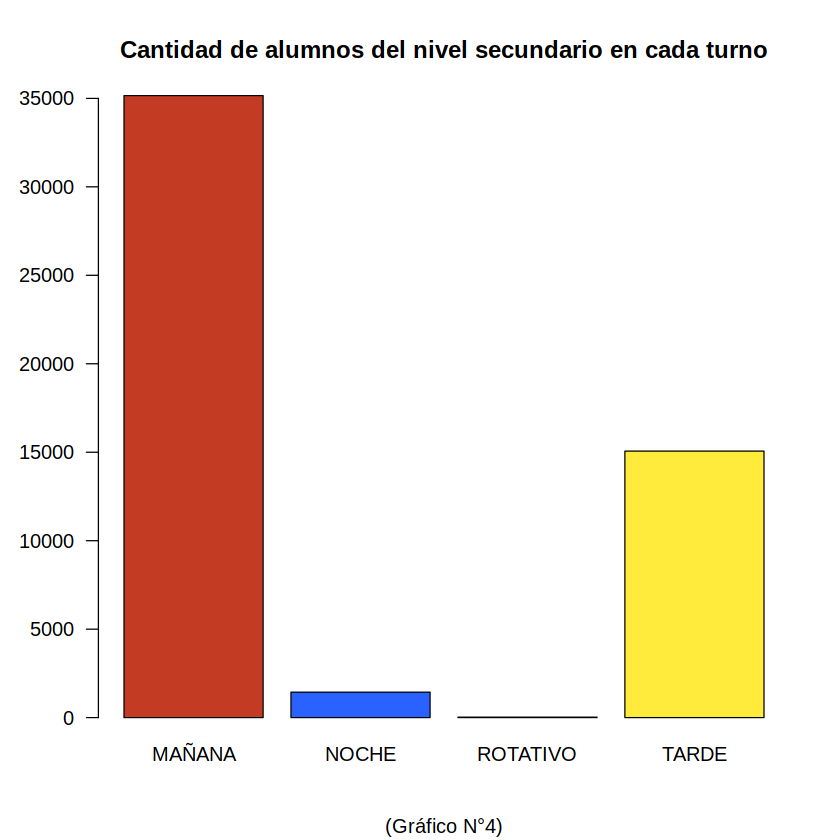

In [69]:
#Distribucion de alumnos por niveles
tabla <- table(secundaria_VICTORIA$turno)
barplot(tabla, main = "Cantidad de alumnos del nivel secundario en cada turno",
        sub = "(Gráfico N°4)",
        col.sub = "black",
        col = c(rojo_pastel,azul,verde,amarillo), ylim = c(0, 35000), las = 1)

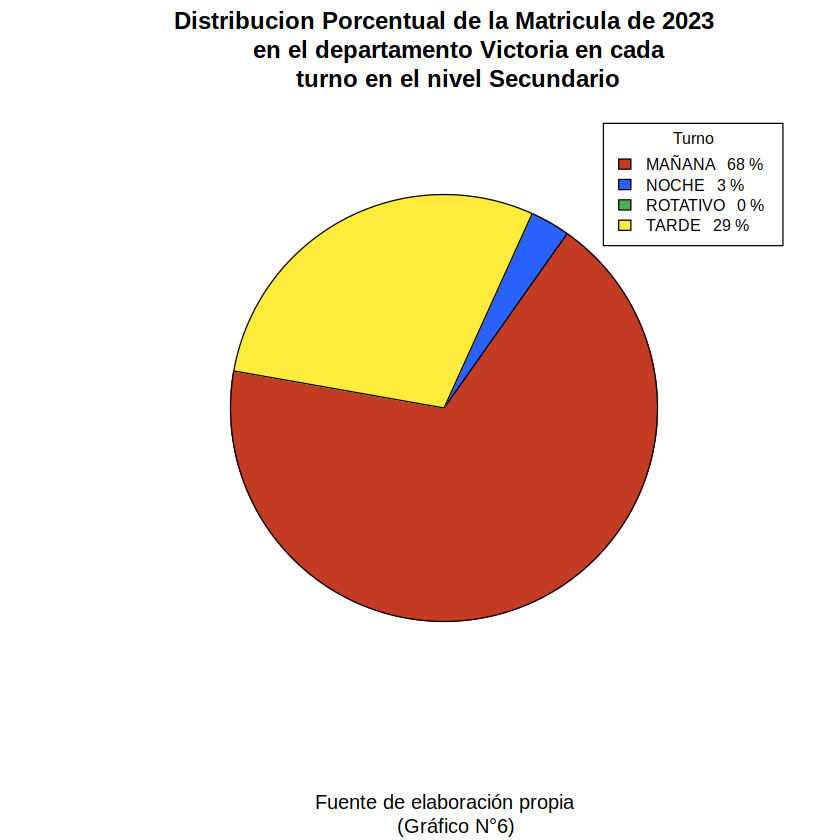

In [70]:
# Distribucion de alumnos por turno
pie_commute <- round(100 * table(secundaria_VICTORIA$turno) / length(secundaria_VICTORIA$turno))
titulos <- c("MAÑANA","NOCHE", "ROTATIVO","TARDE")

colors = c(rojo_pastel,azul,verde,amarillo)

pie(pie_commute, labels = "",
    col = colors,
    radius = .75,
    main = "Distribucion Porcentual de la Matricula de 2023
    en el departamento Victoria en cada
    turno en el nivel Secundario",
    col.main = "black",
    sub = "Fuente de elaboración propia
    (Gráfico N°6)",
    col.sub = "black",
    density = 500, angle = seq(0,190,35),
    border = 'black',
    cex = 1,
    init.angle = 170)

# Agregar la leyenda
legend(x = 0.56, y = 1, c(0,0.1),
       legend = paste(titulos, " ", pie_commute, "%"),
       fill = colors,
       title = "Turno",
       cex = 0.8)  # Ajustar el tamaño del texto de la leyenda

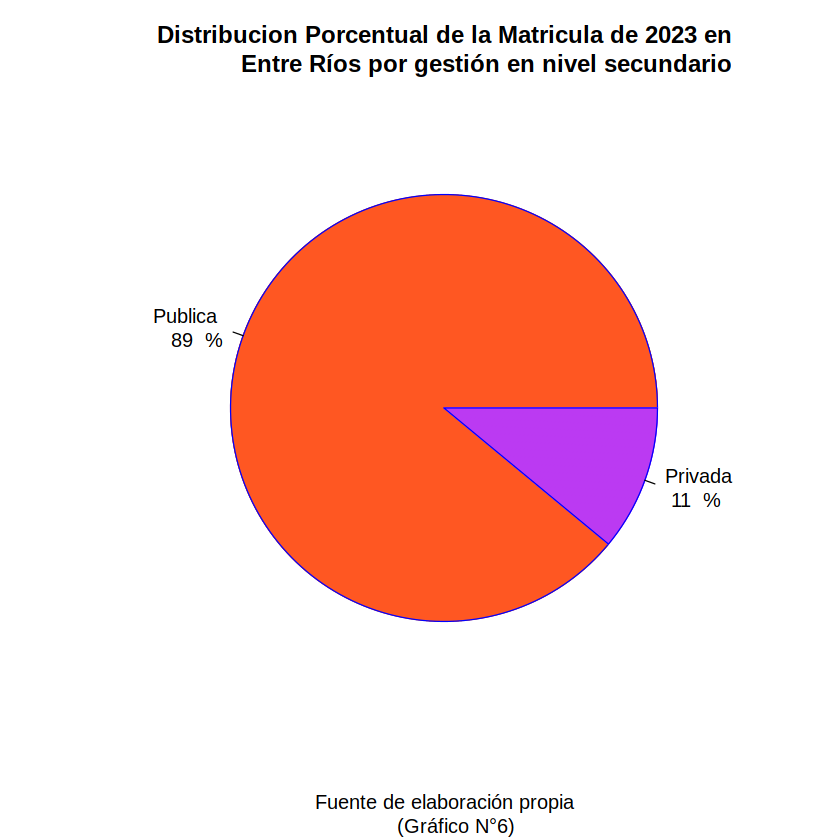

In [71]:
#Distribucion de alumnos por turno
pie_commute <- round(100 * table(secundaria_VICTORIA$EsPrivada) / length(secundaria_VICTORIA$EsPrivada))
titulos <- c("Publica", "Privada")

colors = c(naranja_fuerte4,'#bb3af2')

pie(pie_commute, labels = paste(titulos,'\n', pie_commute, ' %'),
    col = colors,
    radius = .75,
    main = "Distribucion Porcentual de la Matricula de 2023 en
            Entre Ríos por gestión en nivel secundario",
    col.main = "black",
    sub = "Fuente de elaboración propia
    (Gráfico N°6)",
    col.sub = "black",
    density = 500, angle = seq(0,180,35),
    border = 'blue')

In [72]:
Victoria_secundaria <- filter(secundaria_VICTORIA, Año_Curso== "PRIMERO" |  Año_Curso== "SEGUNDO" |  Año_Curso== "TERCERO" |
                     Año_Curso== "CUARTO" |  Año_Curso== "QUINTO" |  Año_Curso== "SEXTO" |  Año_Curso== "SEPTIMO")

In [73]:
# Filtrar los datos y mantener solo una entrada por documento por año
Victoria_secundaria_unico <- secundaria_VICTORIA %>%
  filter(Año_Curso %in% c("PRIMERO", "SEGUNDO", "TERCERO", "CUARTO", "QUINTO", "SEXTO", "SEPTIMO")) %>%
  distinct(Documento, Año_Curso, EsPrivada)

# Contar la cantidad de inscritos por año
inscritos_por_año <- Victoria_secundaria_unico %>%
  count(Año_Curso)

`inscritos_por_año`

Año_Curso,n
<chr>,<int>
CUARTO,481
PRIMERO,594
QUINTO,396
SEGUNDO,631
SEPTIMO,50
SEXTO,371
TERCERO,530


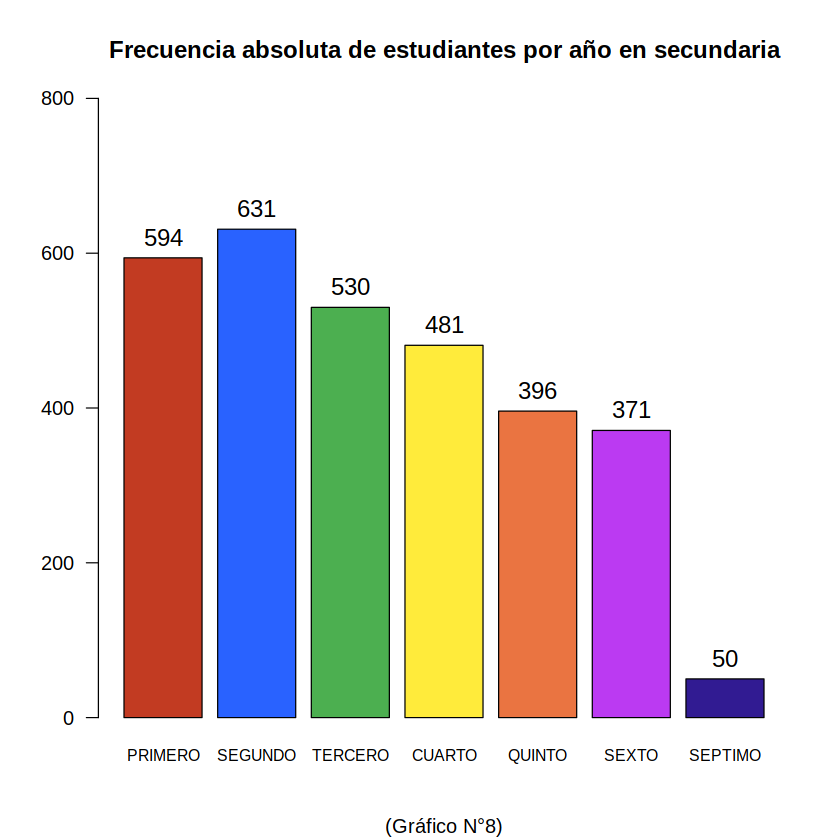

In [74]:
# Distribucion de alumnos por años
colors <- c(rojo_pastel, azul, verde, amarillo, naranja, violeta, azul_violeta) 
datos2 <- table(Victoria_secundaria_unico$Año_Curso)
tabla_años2 <- as.data.frame(datos2)
names(tabla_años2) <- c("Año", "Freq")
tabla_años2 <- tabla_años2 %>% arrange(factor(Año, levels = c('PRIMERO', 'SEGUNDO', 'TERCERO', 'CUARTO', 'QUINTO', 'SEXTO','SEPTIMO')))
# Grafico de barras de frecuencia absoluta ordenado por año
bp <- barplot(tabla_años2$Freq, 
        names = tabla_años2$Año, 
        main = "Frecuencia absoluta de estudiantes por año en secundaria",
        sub = "(Gráfico N°8)",
        col.sub = "black",
        col = colors,  # Utilizar colores personalizados
        ylim = c(0, 800), 
        las = 1, 
        cex.names = 0.79)

# Agregar la cantidad de estudiantes sobre cada barra
text(x = bp, 
     y = tabla_años2$Freq, 
     labels = tabla_años2$Freq, 
     pos = 3,  # Posición para ubicar el texto (encima de la barra)
     cex = 1.2,  # Tamaño del texto
     col = "black")  # Color del texto

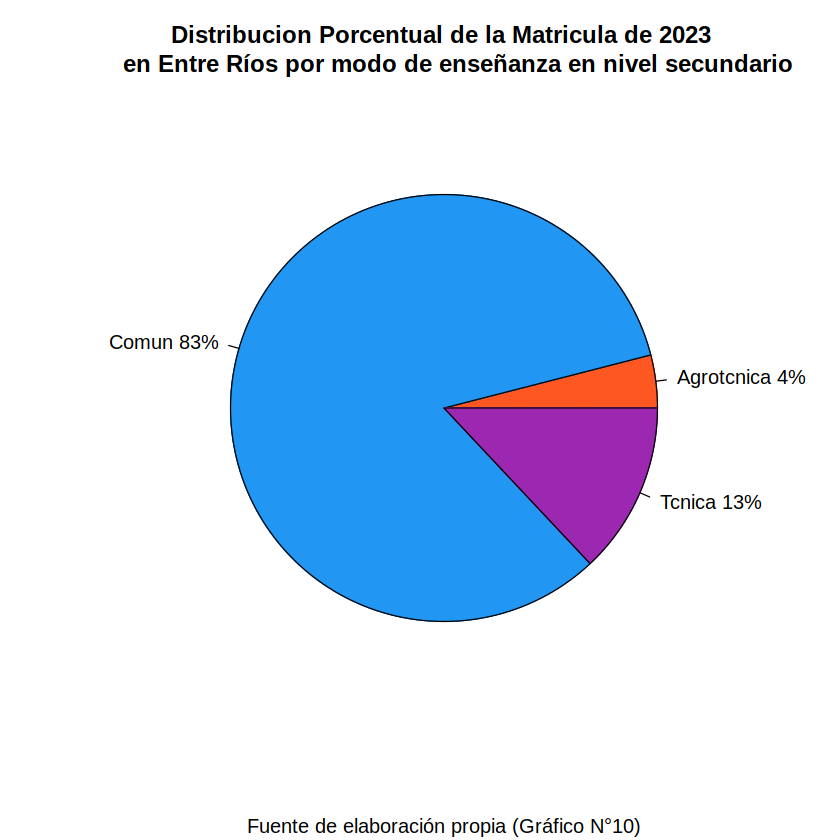

In [75]:
#Distribucion de modalidad de eseñanza
# Calcular los porcentajes
pie_commute <- round(100 * table(Victoria_secundaria$ModEnseñanza) / length(Victoria_secundaria$ModEnseñanza))

# Definir colores
colors <- c('#ff5722','#2196f3','#9c27b0')

# Crear el gráfico de torta
pie(pie_commute, labels = paste0(names(pie_commute), ' ', pie_commute, '%'),
    col = colors,
    radius = .75,
    main = "Distribucion Porcentual de la Matricula de 2023 
    en Entre Ríos por modo de enseñanza en nivel secundario",
    col.main = "black",
    sub = "Fuente de elaboración propia (Gráfico N°10)",
    col.sub = "black",
    density = 500, angle = seq(0,180,35),
    border = 'black')

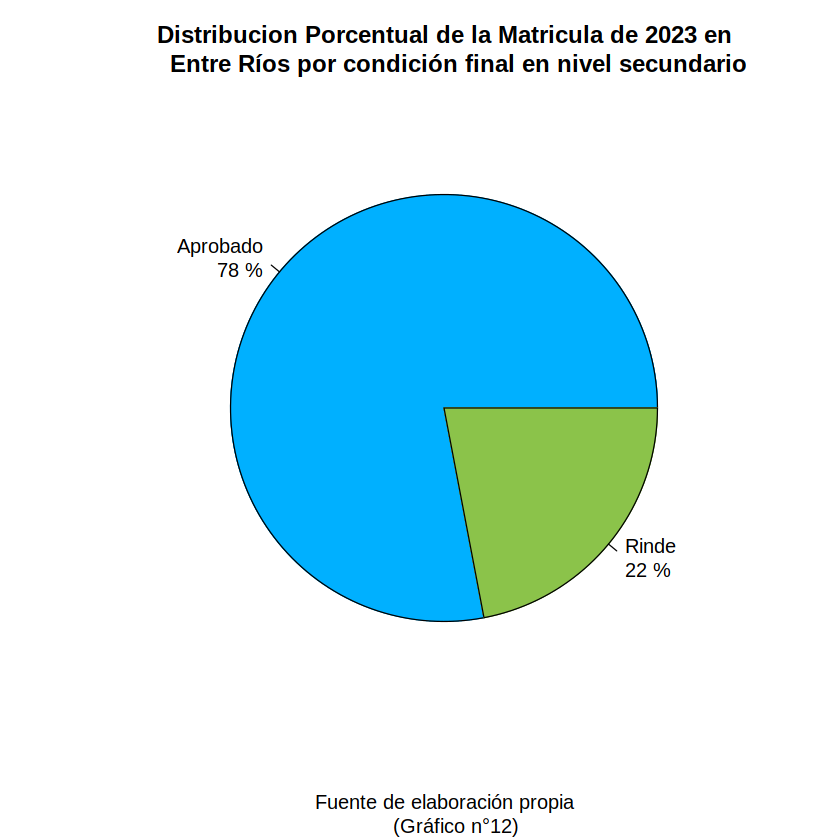

In [76]:
#Distribucion de alumnos segun condicion final
pie_commute <- round(100 * table(Victoria_secundaria$Condición) / length(Victoria_secundaria$Condición))

colors = c(celeste,verde_claro)
pie(pie_commute, labels = paste0(names(pie_commute),'\n', pie_commute, ' %'),
    col = colors,
    radius = .75,
    main = "Distribucion Porcentual de la Matricula de 2023 en
    Entre Ríos por condición final en nivel secundario",
    col.main = "black",
    sub = "Fuente de elaboración propia
    (Gráfico n°12)",
    col.sub = "black",
    density = 500, angle = seq(0,180,35),
    border = 'black')

In [77]:
secundarias_privadas <- filter(Victoria_secundaria_unico, EsPrivada == "S")

In [78]:
dim(secundarias_privadas)

[1] 346   3

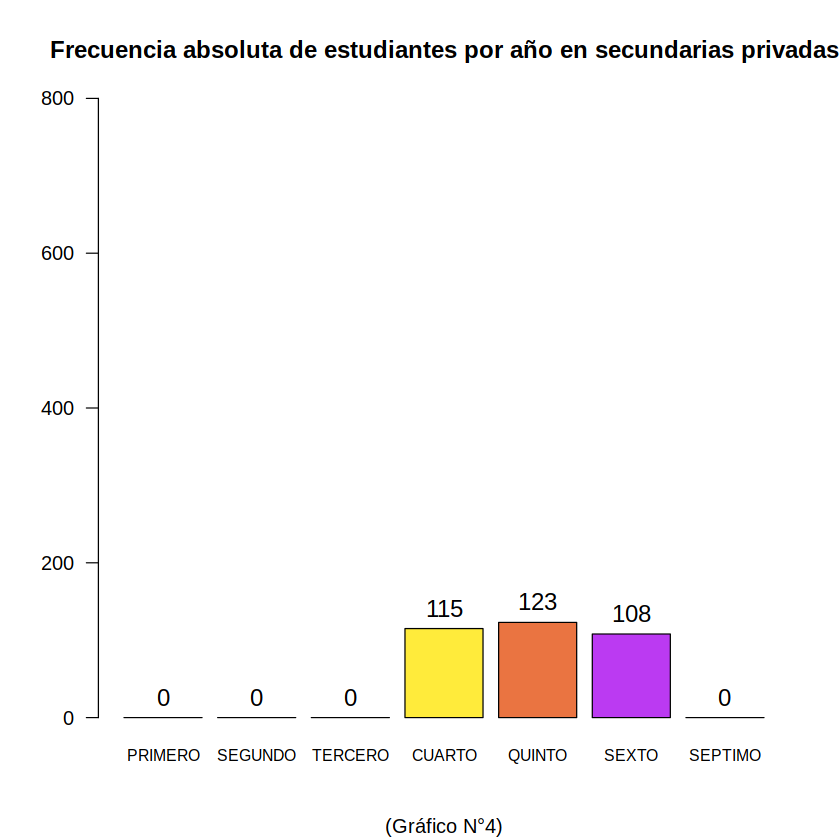

In [79]:
#Distribucion de alumnos por año en colegios secundarios PRIVADOS
#Define todas las categorías (años)
categorias <- c('PRIMERO', 'SEGUNDO', 'TERCERO', 'CUARTO', 'QUINTO', 'SEXTO', 'SEPTIMO')

# Calcula la tabla de frecuencias
tabla <- table(secundarias_privadas$Año_Curso)

# Completa la tabla con todas las categorías
tabla_completa <- table(factor(secundarias_privadas$Año_Curso, levels = categorias))

# Graficamos
bp <- barplot(tabla_completa, 
               main = "Frecuencia absoluta de estudiantes por año en secundarias privadas",
               sub = "(Gráfico N°4)",
               col.sub = "black",
               col = c(rojo_pastel, azul, verde, amarillo, naranja, violeta, azul_violeta), 
               ylim = c(0, 800), 
               las = 1,
               cex.names = 0.79)

# Agrega etiquetas con los porcentajes
text(x = bp, 
     y = tabla_completa, 
     labels = paste(tabla_completa), 
     pos = 3,  # Posición para ubicar el texto (encima de la barra)
     cex = 1.2,  # Tamaño del texto
     col = "black")  # Color del texto

In [80]:
Victoria_secundaria_primero_mat <- dplyr::select(filter(secundaria_VICTORIA, Año_Curso == "PRIMERO" & (asignatura == "MATEMATICA"))       
                                             , CodigoUnicoEscolar, asignatura, Promedio, Documento) %>%
  distinct()

Victoria_secundaria_primero_len <- dplyr::select(filter(secundaria_VICTORIA, Año_Curso == "PRIMERO" & (asignatura == "LENGUA Y LITERATURA"))       
                                             , CodigoUnicoEscolar, asignatura, Promedio, Documento) %>%
  distinct()

Victoria_secundaria_segundo_mat <- dplyr::select(filter(secundaria_VICTORIA, Año_Curso == "SEGUNDO" & (asignatura == "MATEMATICA"))       
                                             , CodigoUnicoEscolar, asignatura, Promedio, Documento) %>%
  distinct()

Victoria_secundaria_segundo_len <- dplyr::select(filter(secundaria_VICTORIA, Año_Curso == "SEGUNDO" & (asignatura == "LENGUA Y LITERATURA"))       
                                             , CodigoUnicoEscolar, asignatura, Promedio, Documento) %>%
  distinct()

Victoria_secundaria_tercero_mat <- dplyr::select(filter(secundaria_VICTORIA, Año_Curso == "TERCERO" & (asignatura == "MATEMATICA"))       
                                             , CodigoUnicoEscolar, asignatura, Promedio, Documento) %>%
  distinct()

Victoria_secundaria_tercero_len <- dplyr::select(filter(secundaria_VICTORIA, Año_Curso == "TERCERO" & (asignatura == "LENGUA Y LITERATURA"))       
                                             , CodigoUnicoEscolar, asignatura, Promedio, Documento) %>%
  distinct()

Victoria_secundaria_cuarto_mat <- dplyr::select(filter(secundaria_VICTORIA, Año_Curso == "CUARTO" & (asignatura == "MATEMATICA"))       
                                             , CodigoUnicoEscolar, asignatura, Promedio, Documento) %>%
  distinct()

Victoria_secundaria_cuarto_len <- dplyr::select(filter(secundaria_VICTORIA, Año_Curso == "CUARTO" & (asignatura == "LENGUA Y LITERATURA"))       
                                             , CodigoUnicoEscolar, asignatura, Promedio, Documento) %>%
  distinct()

Victoria_secundaria_quinto_mat <- dplyr::select(filter(secundaria_VICTORIA, Año_Curso == "QUINTO" & (asignatura == "MATEMATICA"))       
                                             , CodigoUnicoEscolar, asignatura, Promedio, Documento) %>%
  distinct()

Victoria_secundaria_quinto_len <- dplyr::select(filter(secundaria_VICTORIA, Año_Curso == "QUINTO" & (asignatura == "LENGUA Y LITERATURA"))       
                                             , CodigoUnicoEscolar, asignatura, Promedio, Documento) %>%
  distinct()

Victoria_secundaria_sexto_mat <- dplyr::select(filter(secundaria_VICTORIA, Año_Curso == "SEXTO" & (asignatura == "MATEMATICA"))       
                                             , CodigoUnicoEscolar, asignatura, Promedio, Documento) %>%
  distinct()

Victoria_secundaria_sexto_len <- dplyr::select(filter(secundaria_VICTORIA, Año_Curso == "SEXTO" & (asignatura == "LENGUA Y LITERATURA"))       
                                             , CodigoUnicoEscolar, asignatura, Promedio, Documento) %>%
  distinct()

Victoria_secundaria_septimo_mat <- dplyr::select(filter(secundaria_VICTORIA, Año_Curso == "SEPTIMO" & (asignatura == "MATEMATICA"))       
                                             , CodigoUnicoEscolar, asignatura, Promedio, Documento) %>%
  distinct()

Victoria_secundaria_septimo_agro <- dplyr::select(filter(secundaria_VICTORIA, Año_Curso == "SEPTIMO" & (asignatura == "CIENCIAS AGROPECUARIAS"))       
                                             , CodigoUnicoEscolar, asignatura, Promedio, Documento) %>%
  distinct()

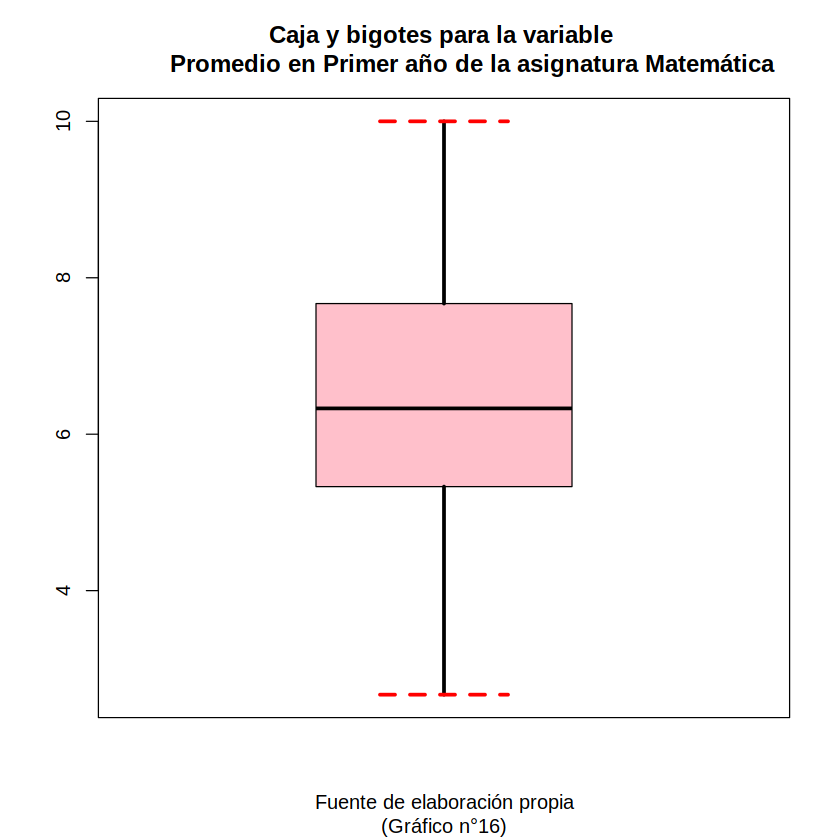

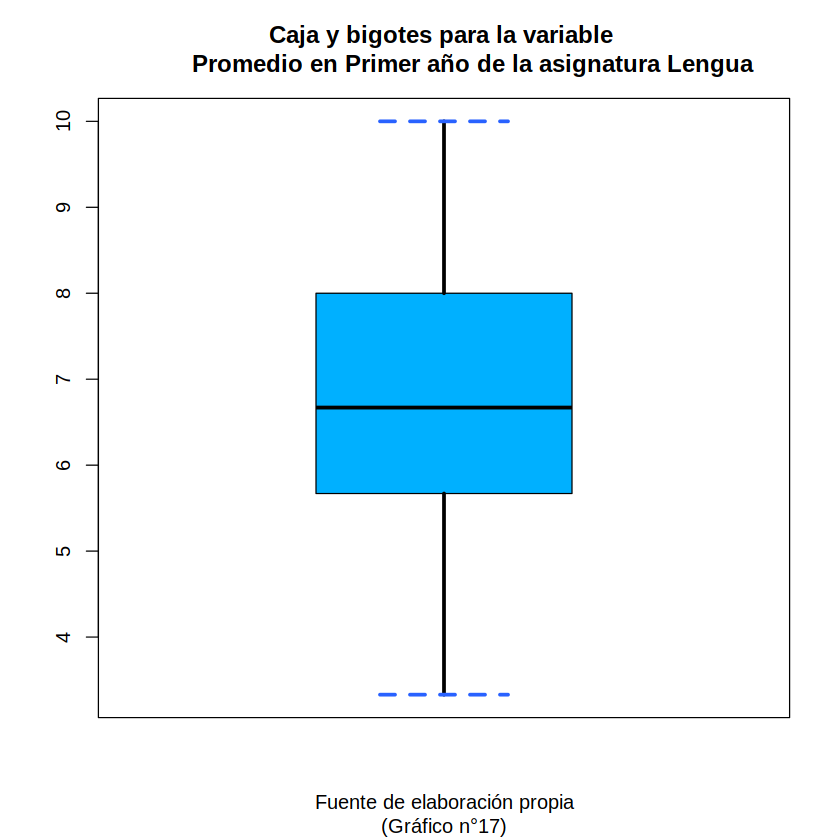

In [81]:
boxplot(Victoria_secundaria_primero_mat[!is.na(Victoria_secundaria_primero_mat$Promedio),]$Promedio,
        main = "Caja y bigotes para la variable 
        Promedio en Primer año de la asignatura Matemática",
        whisklty = 1,       # Tipo línea bigotes
        whisklwd = 3,       # Ancho línea bigotes
        whiskcol = "black",   # Color bigotes
        staplelty = 2,      # Tipo línea barras
        staplelwd = 3,      # Ancho línea barras
        staplecol = "red",  # Color barras
        col = "pink",     # Color caja
        sub = "Fuente de elaboración propia
(Gráfico n°16)",
        col.sub = "black")

boxplot(Victoria_secundaria_primero_len[!is.na(Victoria_secundaria_primero_len$Promedio),]$Promedio,
        main = "Caja y bigotes para la variable 
        Promedio en Primer año de la asignatura Lengua",
        whisklty = 1,       # Tipo línea bigotes
        whisklwd = 3,       # Ancho línea bigotes
        whiskcol = "black",   # Color bigotes
        staplelty = 2,      # Tipo línea barras
        staplelwd = 3,      # Ancho línea barras
        staplecol = azul,  # Color barras
        col = celeste,     # Color caja
        sub = "Fuente de elaboración propia
(Gráfico n°17)",
        col.sub = "black")


	Shapiro-Wilk normality test

data:  Victoria_secundaria_primero_mat$Promedio
W = 0.98153, p-value = 1.748e-06


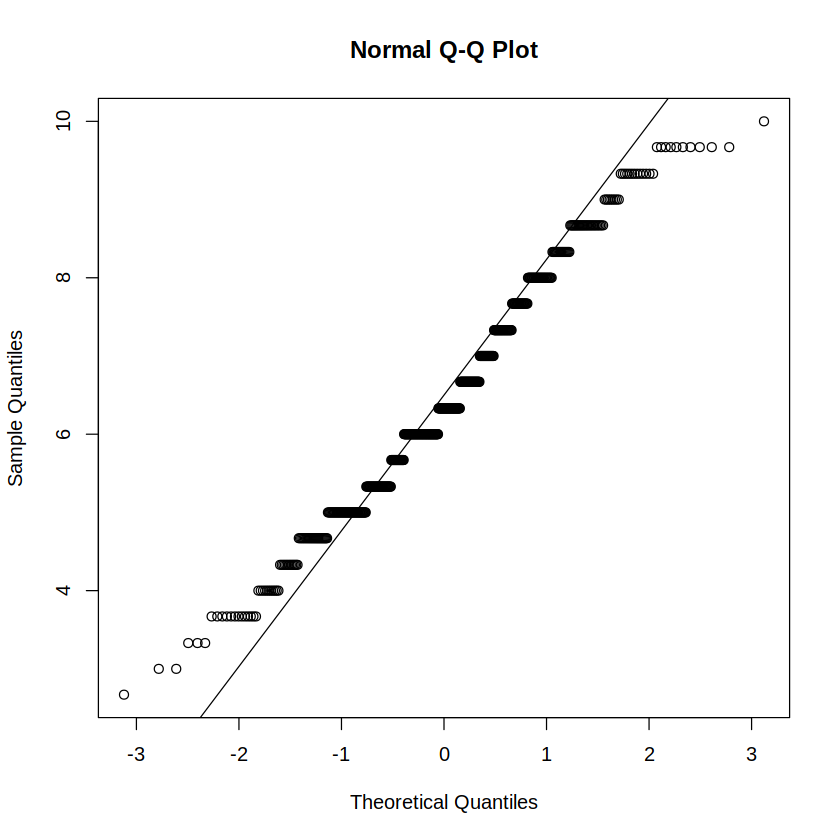


	Shapiro-Wilk normality test

data:  Victoria_secundaria_primero_len$Promedio
W = 0.98238, p-value = 5.132e-06


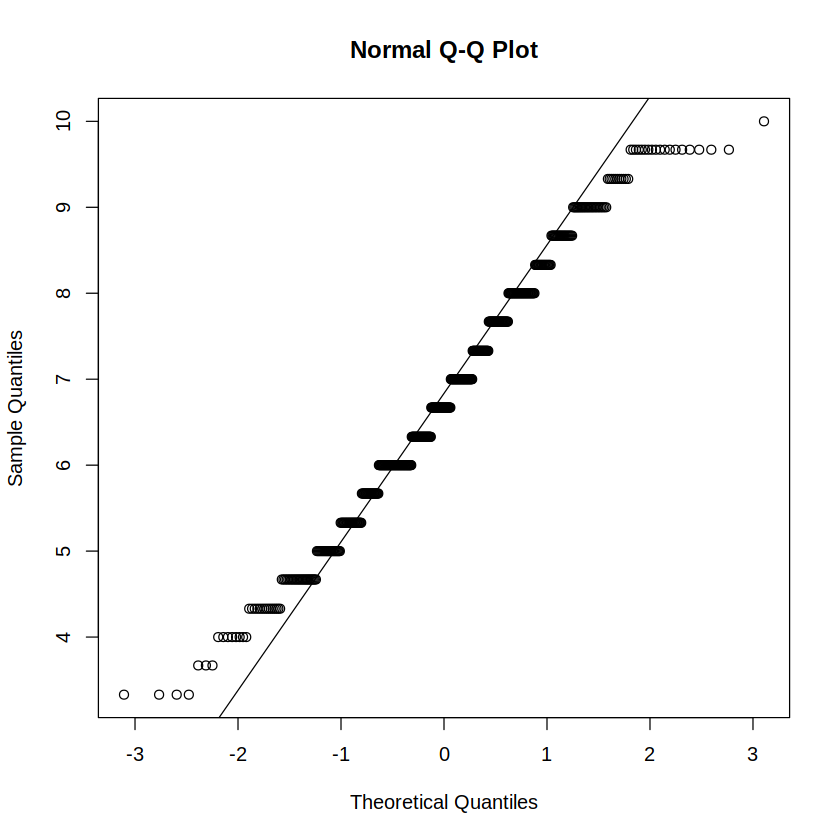

In [82]:
qqnorm(as.numeric(Victoria_secundaria_primero_mat[!is.na(Victoria_secundaria_primero_mat$Promedio),]$Promedio))
qqline(as.numeric(Victoria_secundaria_primero_mat[!is.na(Victoria_secundaria_primero_mat$Promedio),]$Promedio))
shapiro.test(Victoria_secundaria_primero_mat$Promedio)

qqnorm(as.numeric(Victoria_secundaria_primero_len[!is.na(Victoria_secundaria_primero_len$Promedio),]$Promedio))
qqline(as.numeric(Victoria_secundaria_primero_len[!is.na(Victoria_secundaria_primero_len$Promedio),]$Promedio))
shapiro.test(Victoria_secundaria_primero_len$Promedio)

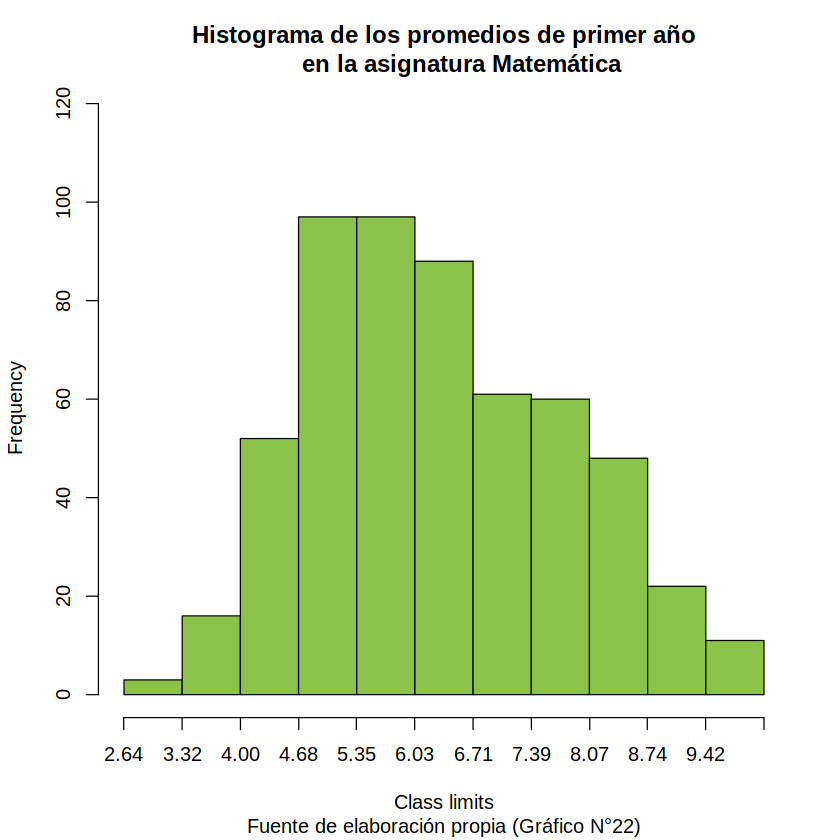

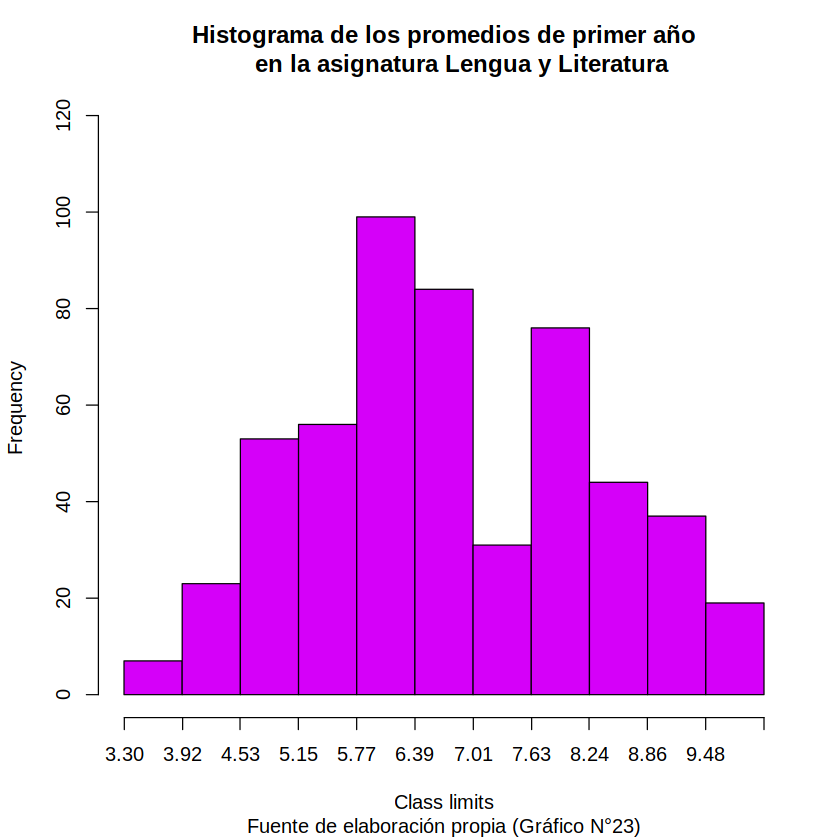

In [83]:
Notas_mat_primero_secundaria <- fdt(Victoria_secundaria_primero_mat$Promedio, breaks= "Sturges", na.rm= TRUE)
plot(Notas_mat_primero_secundaria,
     type= "fh",
     col= verde_claro,
     main= "Histograma de los promedios de primer año
     en la asignatura Matemática",
     sub= "

Fuente de elaboración propia (Gráfico N°22)",
     col.sub= "black",)

Notas_len_primero_secundaria <- fdt(Victoria_secundaria_primero_len$Promedio, breaks= "Sturges", na.rm= TRUE)
plot(Notas_len_primero_secundaria,
     type= "fh",
     col= violeta_rosado,
     main= "Histograma de los promedios de primer año
     en la asignatura Lengua y Literatura",
     sub= "

Fuente de elaboración propia (Gráfico N°23)",
     col.sub= "black",)

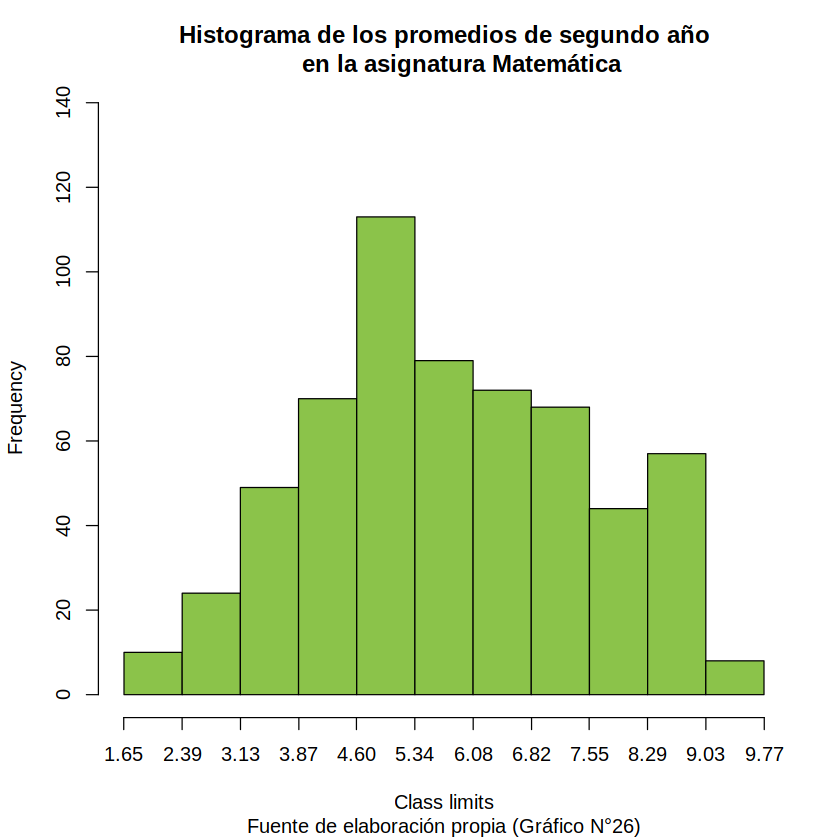

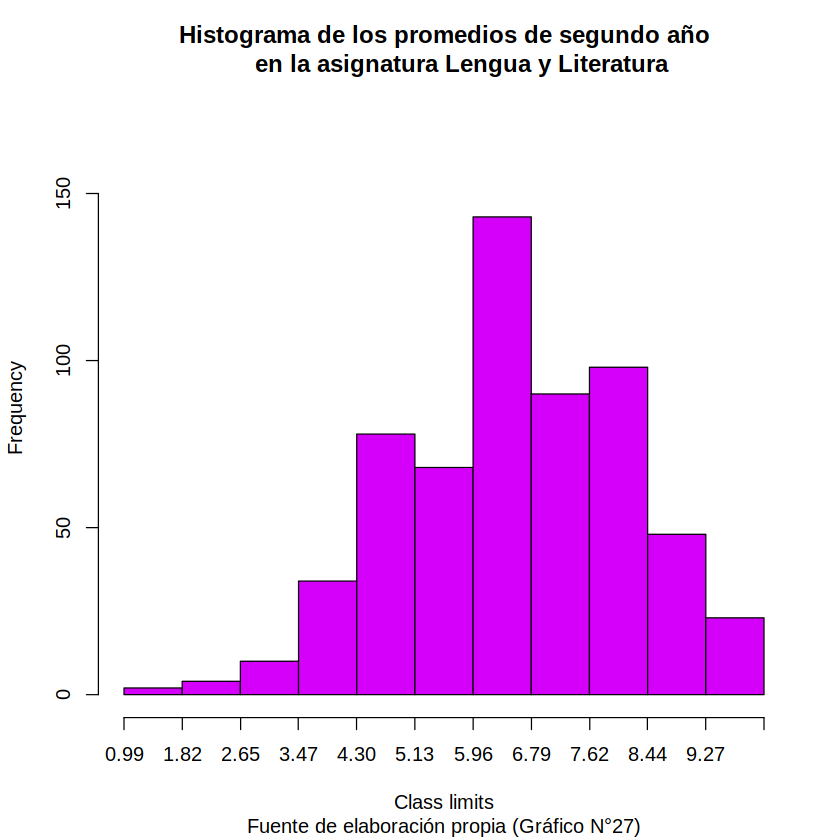

In [84]:
Notas_mat_2_secundaria <- fdt(Victoria_secundaria_segundo_mat$Promedio, breaks= "Sturges", na.rm= TRUE)
plot(Notas_mat_2_secundaria,
     type= "fh",
     col= verde_claro,
     main= "Histograma de los promedios de segundo año
     en la asignatura Matemática",
     sub= "

Fuente de elaboración propia (Gráfico N°26)",
     col.sub= "black",)

Notas_len_2_secundaria <- fdt(Victoria_secundaria_segundo_len$Promedio, breaks= "Sturges", na.rm= TRUE)
plot(Notas_len_2_secundaria,
     type= "fh",
     col= violeta_rosado,
     main= "Histograma de los promedios de segundo año
     en la asignatura Lengua y Literatura",
     sub= "

Fuente de elaboración propia (Gráfico N°27)",
     col.sub= "black",)

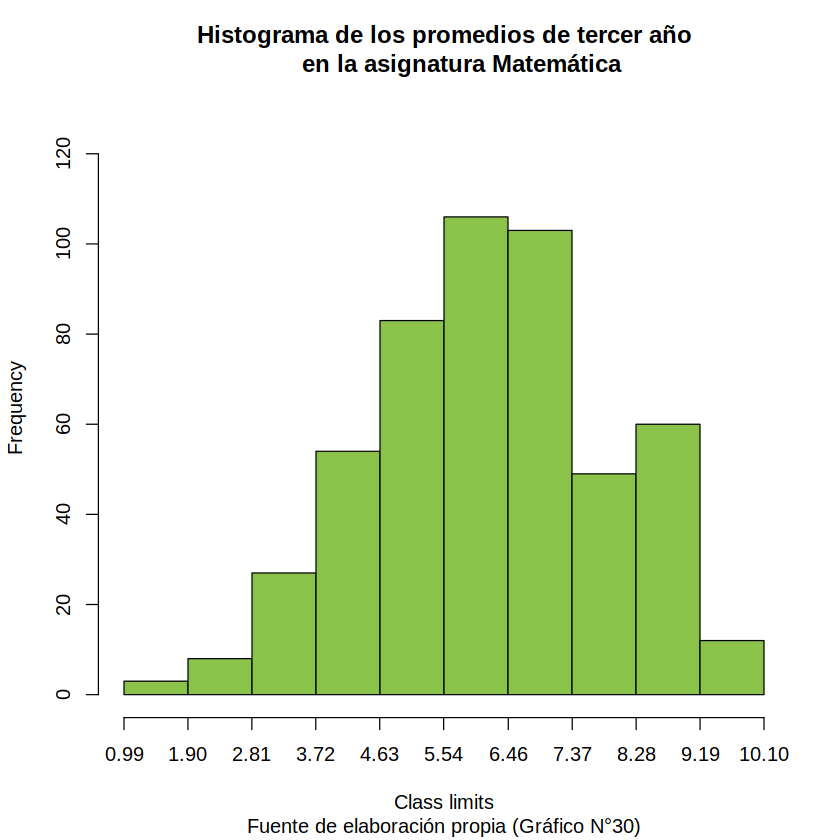

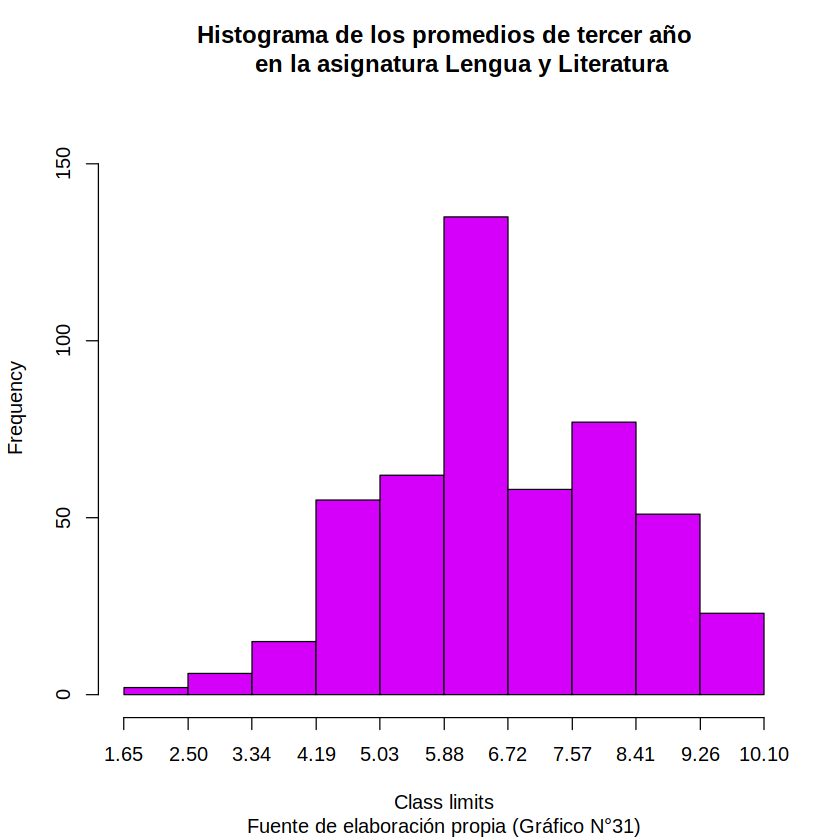

In [85]:
Notas_mat_3_secundaria <- fdt(Victoria_secundaria_tercero_mat$Promedio, breaks= "Sturges", na.rm= TRUE)
plot(Notas_mat_3_secundaria,
     type= "fh",
     col= verde_claro,
     main= "Histograma de los promedios de tercer año
     en la asignatura Matemática",
     sub= "

Fuente de elaboración propia (Gráfico N°30)",
     col.sub= "black",)

Notas_len_3_secundaria <- fdt(Victoria_secundaria_tercero_len$Promedio, breaks= "Sturges", na.rm= TRUE)
plot(Notas_len_3_secundaria,
     type= "fh",
     col= violeta_rosado,
     main= "Histograma de los promedios de tercer año
     en la asignatura Lengua y Literatura",
     sub= "

Fuente de elaboración propia (Gráfico N°31)",
     col.sub= "black",)

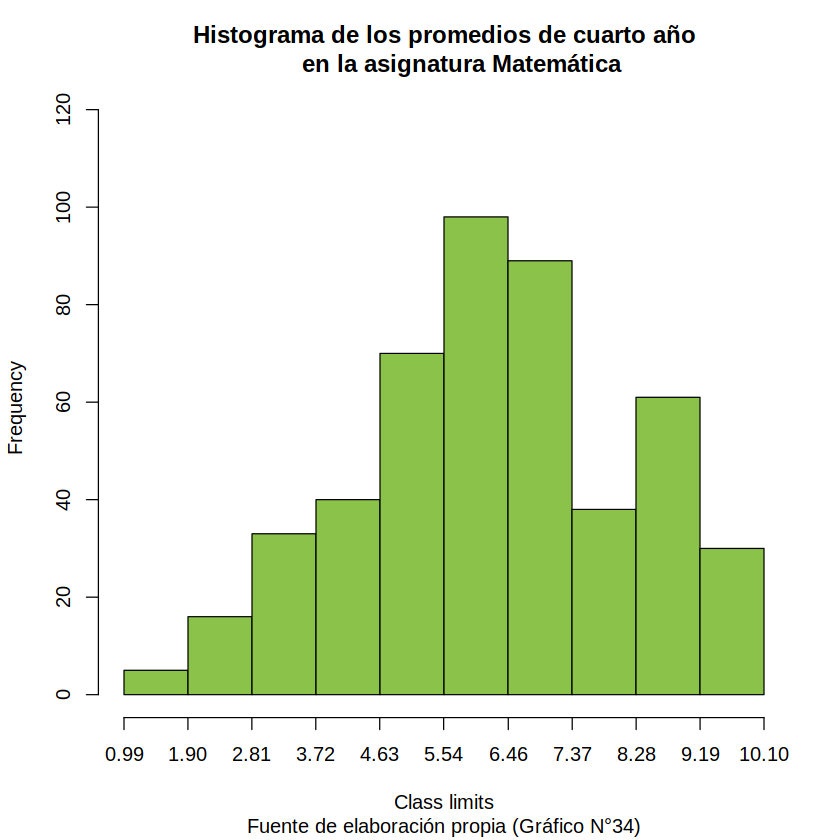

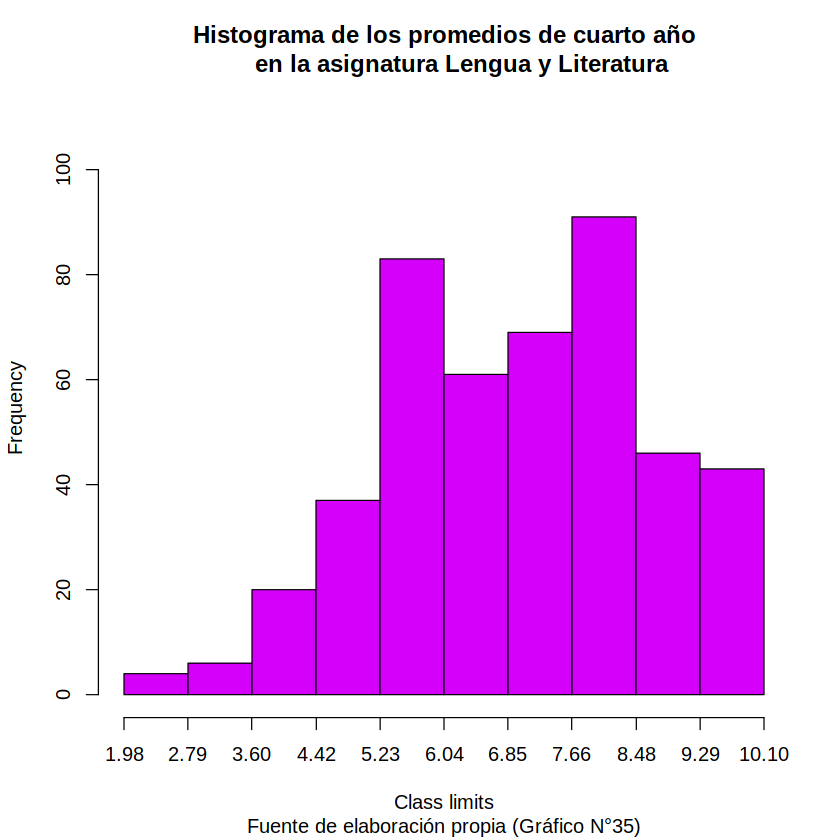

In [86]:
Notas_mat_4_secundaria <- fdt(Victoria_secundaria_cuarto_mat$Promedio, breaks= "Sturges", na.rm= TRUE)
plot(Notas_mat_4_secundaria,
     type= "fh",
     col= verde_claro,
     main= "Histograma de los promedios de cuarto año
     en la asignatura Matemática",
     sub= "

Fuente de elaboración propia (Gráfico N°34)",
     col.sub= "black",)

Notas_len_4_secundaria <- fdt(Victoria_secundaria_cuarto_len$Promedio, breaks= "Sturges", na.rm= TRUE)
plot(Notas_len_4_secundaria,
     type= "fh",
     col= violeta_rosado,
     main= "Histograma de los promedios de cuarto año
     en la asignatura Lengua y Literatura",
     sub= "

Fuente de elaboración propia (Gráfico N°35)",
     col.sub= "black",)

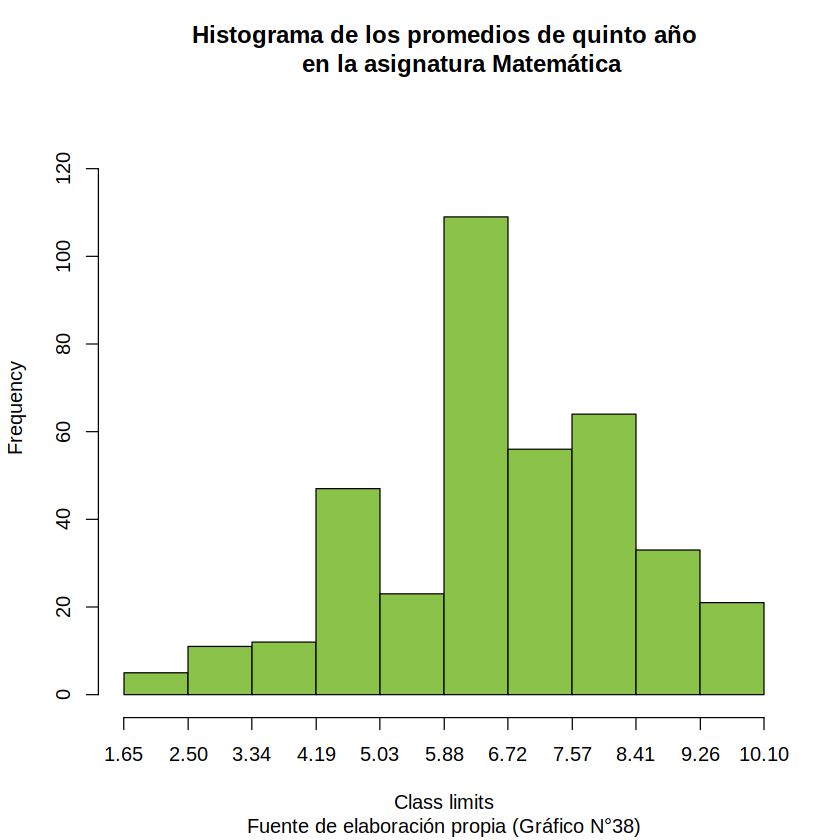

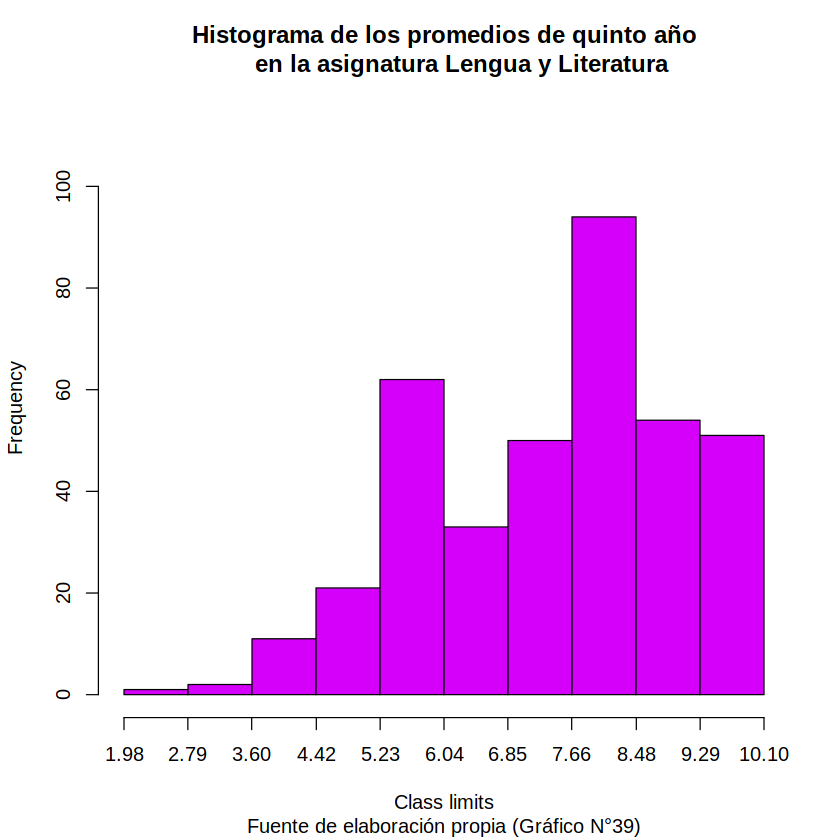

In [87]:
Notas_mat_5_secundaria <- fdt(Victoria_secundaria_quinto_mat$Promedio, breaks= "Sturges", na.rm= TRUE)
plot(Notas_mat_5_secundaria,
     type= "fh",
     col= verde_claro,
     main= "Histograma de los promedios de quinto año
     en la asignatura Matemática",
     sub= "

Fuente de elaboración propia (Gráfico N°38)",
     col.sub= "black",)

Notas_len_5_secundaria <- fdt(Victoria_secundaria_quinto_len$Promedio, breaks= "Sturges", na.rm= TRUE)
plot(Notas_len_5_secundaria,
     type= "fh",
     col= violeta_rosado,
     main= "Histograma de los promedios de quinto año
     en la asignatura Lengua y Literatura",
     sub= "

Fuente de elaboración propia (Gráfico N°39)",
     col.sub= "black",)

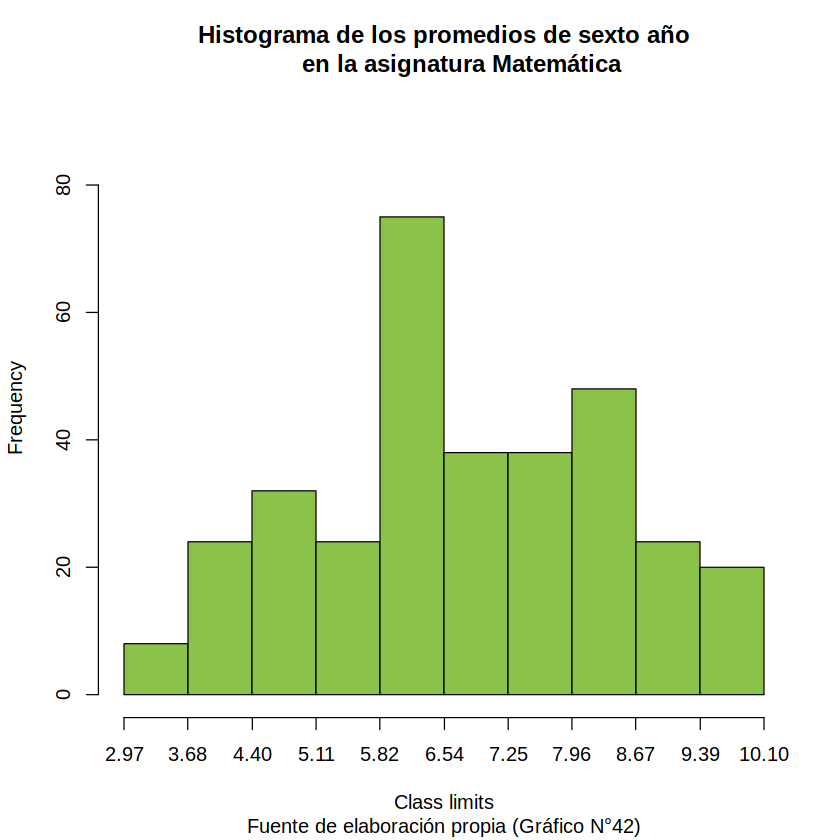

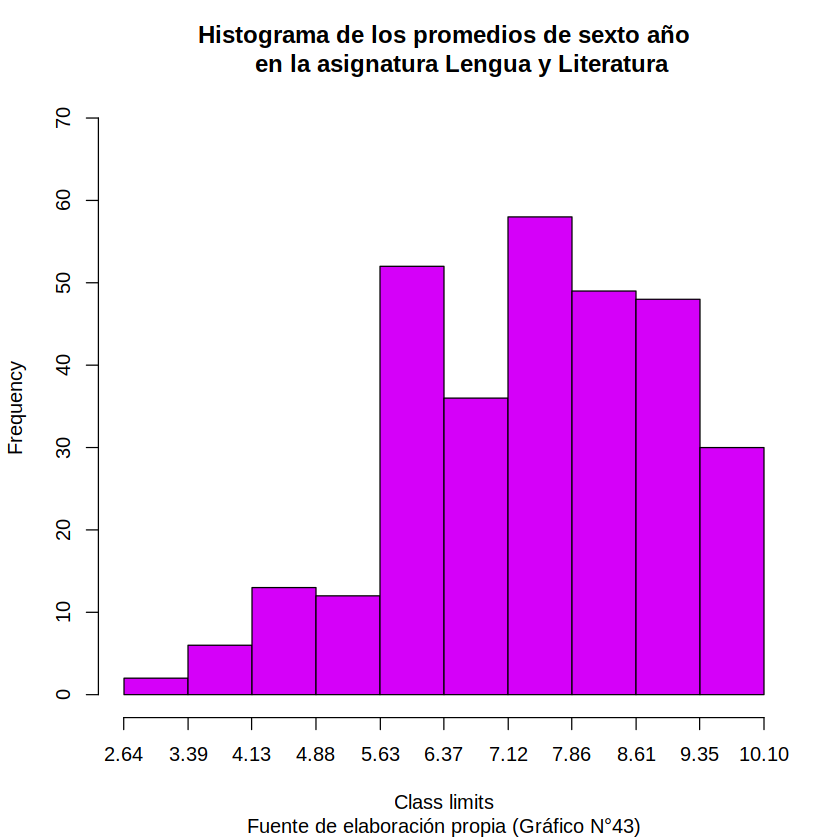

In [88]:
Notas_mat_6_secundaria <- fdt(Victoria_secundaria_sexto_mat$Promedio, breaks= "Sturges", na.rm= TRUE)
plot(Notas_mat_6_secundaria,
     type= "fh",
     col= verde_claro,
     main= "Histograma de los promedios de sexto año
     en la asignatura Matemática",
     sub= "

Fuente de elaboración propia (Gráfico N°42)",
     col.sub= "black",)

Notas_len_6_secundaria <- fdt(Victoria_secundaria_sexto_len$Promedio, breaks= "Sturges", na.rm= TRUE)
plot(Notas_len_6_secundaria,
     type= "fh",
     col= violeta_rosado,
     main= "Histograma de los promedios de sexto año
     en la asignatura Lengua y Literatura",
     sub= "

Fuente de elaboración propia (Gráfico N°43)",
     col.sub= "black",)

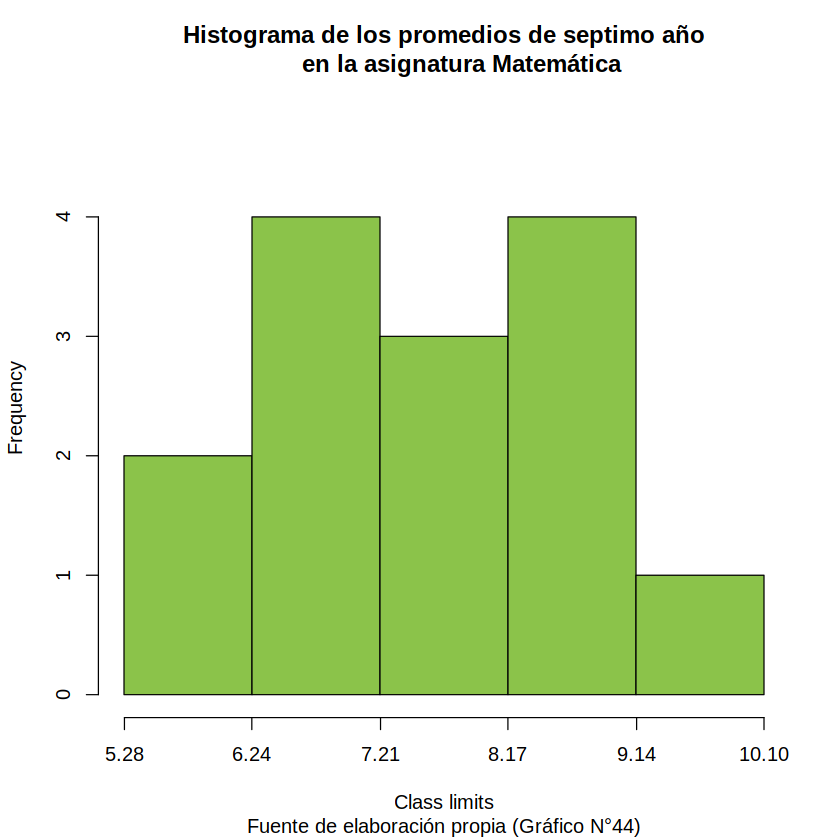

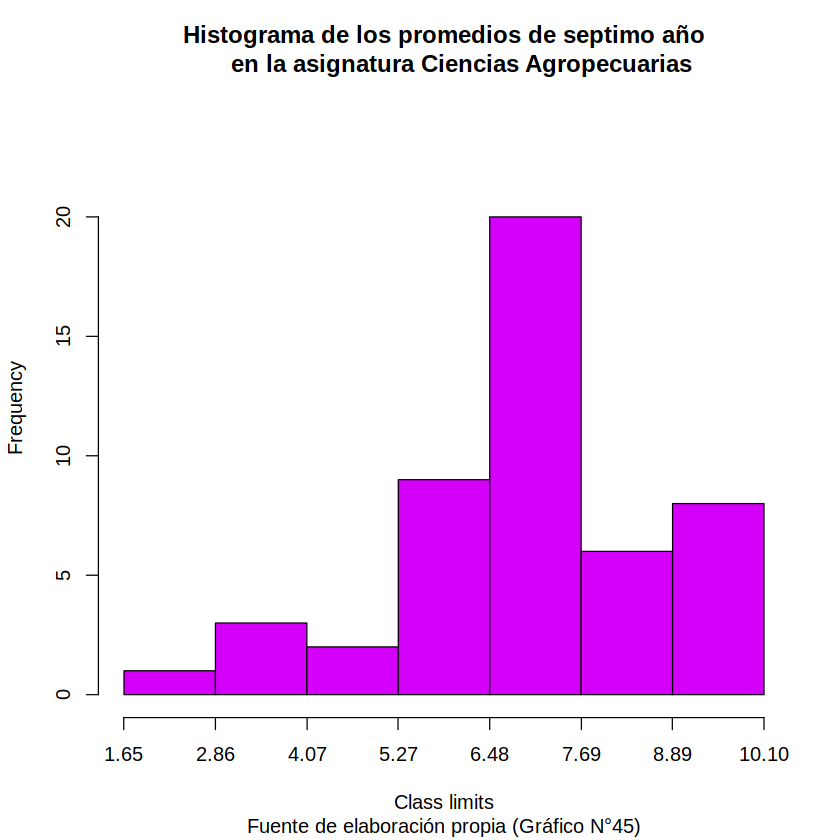

In [89]:
Notas_mat_7_secundaria <- fdt(Victoria_secundaria_septimo_mat$Promedio, breaks= "Sturges", na.rm= TRUE)
plot(Notas_mat_7_secundaria,
     type= "fh",
     col= verde_claro,
     main= "Histograma de los promedios de septimo año
     en la asignatura Matemática",
     sub= "

Fuente de elaboración propia (Gráfico N°44)",
     col.sub= "black",)

Notas_agro_7_secundaria <- fdt(Victoria_secundaria_septimo_agro$Promedio, breaks= "Sturges", na.rm= TRUE)
plot(Notas_agro_7_secundaria,
     type= "fh",
     col= violeta_rosado,
     main= "Histograma de los promedios de septimo año
     en la asignatura Ciencias Agropecuarias",
     sub= "

Fuente de elaboración propia (Gráfico N°45)",
     col.sub= "black",)

-----------------

# Guia ejercicios 4-5

In [91]:
#Aunque lo tenemos arriba, lo leemos nuevamente 
secundaria_VICTORIA <- read_excel("/home/santiago/Documentos/TUPED/Exploracion_Datos_Multivariados/TP_VICTORIA/VICTORIA_SECUNDARIA_LIMPIA.xlsx")

-----------------

In [92]:
#CHEQUEAMOS FALTA DE DATOS EN PRIMERO SEGUNDO TERCERO Y SEPTIMO COLEGIOS PRIVADOS SECUNDARIOS

In [93]:
aux <- filter(secundaria_VICTORIA,EsPrivada == "S")

In [94]:
names(aux)
unique(aux$`NivelEnseñanza`)
dim(aux)

[1] "CodigoUnicoEscolar" "EsPrivada"          "turno"             
 [4] "periodoEvaluatorio" "Documento"          "asignatura"        
 [7] "idalumno"           "observaciones"      "idSubOrganizacion" 
[10] "idDivision"         "NivelEnseñanza"     "orden"             
[13] "Nivel"              "esMultiaño"         "IdModEnseñanza"    
[16] "Modalidad"          "ModEnseñanza"       "NotasPrimerT"      
[19] "NotasSegundoT"      "NotasTercerT"       "Promedio"          
[22] "Condición"          "Año_Curso"

[1] "SECUNDARIO"

[1] 5722   23

In [95]:
unique(aux$Año_Curso)
#No hay colegios privados de primer,segundo y tercer año

[1] "SEXTO"  "QUINTO" "CUARTO"

In [96]:
unique(secundaria_VICTORIA$ModEnseñanza)

[1] "Comun"          "T\xe9cnica"     "Agrot\xe9cnica"

------------------

# ANALISIS SECUNDARIA POR AÑOS (PRIMERO - SEGUNDO - TERCERO - CUARTO - QUINTO - SEXTO - SEPTIMO)

In [97]:
#Separamos el dataset por año de cursado
PRIMERO_Victoria_secundaria <- filter(secundaria_VICTORIA,Año_Curso == "PRIMERO")
SEGUNDO_Victoria_secundaria <- filter(secundaria_VICTORIA,Año_Curso == "SEGUNDO")
TERCERO_Victoria_secundaria <- filter(secundaria_VICTORIA,Año_Curso == "TERCERO")
CUARTO_Victoria_secundaria <- filter(secundaria_VICTORIA,Año_Curso == "CUARTO")
QUINTO_Victoria_secundaria <- filter(secundaria_VICTORIA,Año_Curso == "QUINTO")
SEXTO_Victoria_secundaria <- filter(secundaria_VICTORIA,Año_Curso == "SEXTO")
SEPTIMO_Victoria_secundaria <- filter(secundaria_VICTORIA,Año_Curso == "SEPTIMO")

In [98]:
#A modo de verificacion contamos la cantidad de alumnos en cada año
alumnos_PRIMERO <- PRIMERO_Victoria_secundaria %>%
  distinct(Documento)
cat("N° alumnos PRIMERO: ",dim(alumnos_PRIMERO)[1], "\n")

alumnos_SEGUNDO <- SEGUNDO_Victoria_secundaria %>%
  distinct(Documento)
cat("N° alumnos SEGUNDO: ",dim(alumnos_SEGUNDO)[1], "\n")

alumnos_TERCERO <- TERCERO_Victoria_secundaria %>%
  distinct(Documento)
cat("N° alumnos TERCERO: ",dim(alumnos_TERCERO)[1], "\n")

alumnos_CUARTO <- CUARTO_Victoria_secundaria %>%
  distinct(Documento)
cat("N° alumnos CUARTO: ",dim(alumnos_CUARTO)[1], "\n")

alumnos_QUINTO <- QUINTO_Victoria_secundaria %>%
  distinct(Documento)
cat("N° alumnos QUINTO: ",dim(alumnos_QUINTO)[1], "\n")

alumnos_SEXTO <- SEXTO_Victoria_secundaria %>%
  distinct(Documento)
cat("N° alumnos SEXTO: ",dim(alumnos_SEXTO)[1], "\n")

alumnos_SEPTIMO <- SEPTIMO_Victoria_secundaria %>%
  distinct(Documento)
cat("N° alumnos SEPTIMO: ",dim(alumnos_SEPTIMO)[1], "\n")

N° alumnos PRIMERO:  594 
N° alumnos SEGUNDO:  631 
N° alumnos TERCERO:  530 
N° alumnos CUARTO:  481 
N° alumnos QUINTO:  396 
N° alumnos SEXTO:  371 
N° alumnos SEPTIMO:  50 


## PRIMERO

Mediana MATEMATICA 6.33 
Mediana LENGUA Y LITERATURA 6.67 
Mediana EDUCACION FISICA 8 
Mediana INGLES 7.33

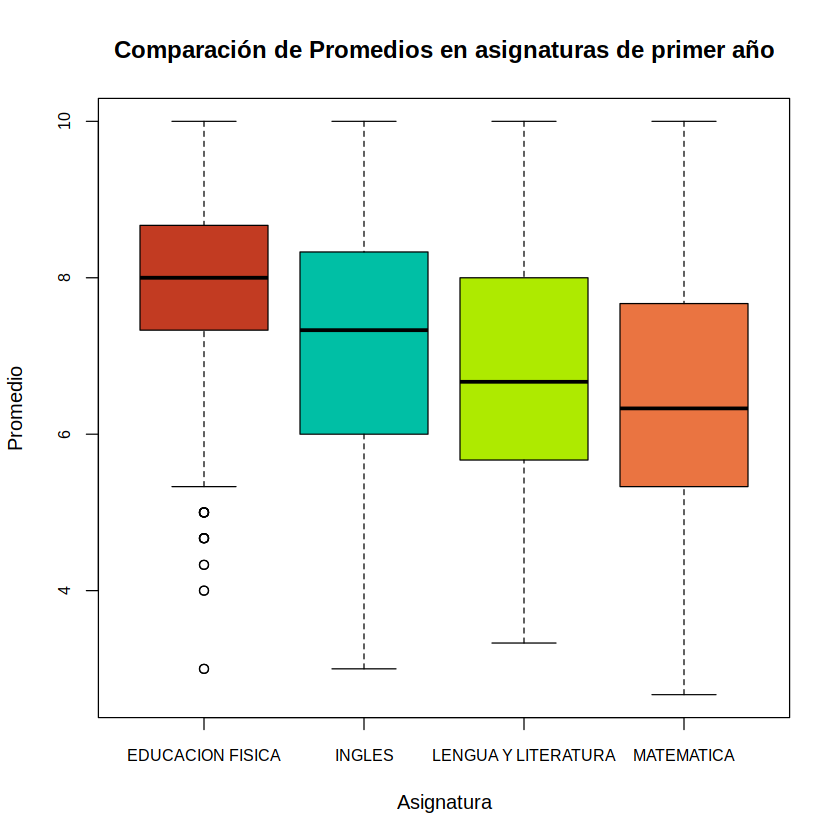

In [99]:
#Boxplots comparativos asignaturas PRIMER AÑO

# Filtrar los datos para las cuatro asignaturas
datos_boxplot <- PRIMERO_Victoria_secundaria %>%
  filter(asignatura %in% c("MATEMATICA", "LENGUA Y LITERATURA", "EDUCACION FISICA", "INGLES"))

# Crear un vector de colores para cada boxplot
colores <- c(rojo_pastel,azul_verde,amarillo_verde,naranja)

# Crear el boxplot
boxplot(Promedio ~ asignatura, data = datos_boxplot, 
        main = "Comparación de Promedios en asignaturas de primer año",
        xlab = "Asignatura",
        ylab = "Promedio",
        col = colores,
        border = "black",
        cex.axis = 0.8
       )

# Calcular el promedio de las asignaturas a modo de chequeo del grafico
cat("Mediana MATEMATICA",median(datos_boxplot$Promedio[datos_boxplot$asignatura == "MATEMATICA"], na.rm = TRUE), "\n")
cat("Mediana LENGUA Y LITERATURA",median(datos_boxplot$Promedio[datos_boxplot$asignatura == "LENGUA Y LITERATURA"], na.rm = TRUE), "\n")
cat("Mediana EDUCACION FISICA",median(datos_boxplot$Promedio[datos_boxplot$asignatura == "EDUCACION FISICA"], na.rm = TRUE), "\n")
cat("Mediana INGLES",median(datos_boxplot$Promedio[datos_boxplot$asignatura == "INGLES"], na.rm = TRUE))

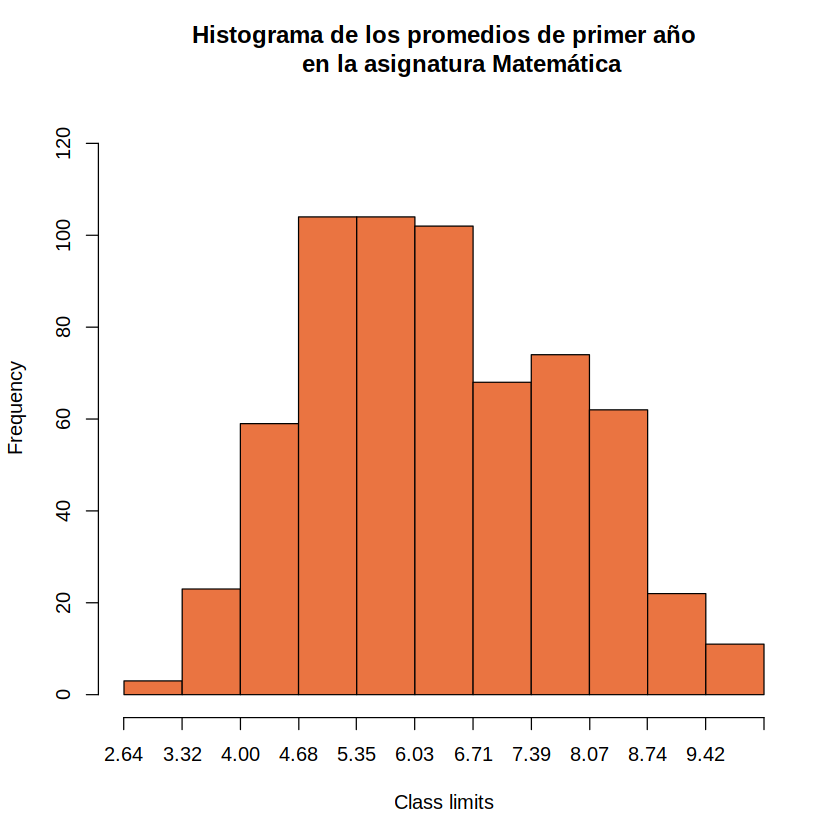

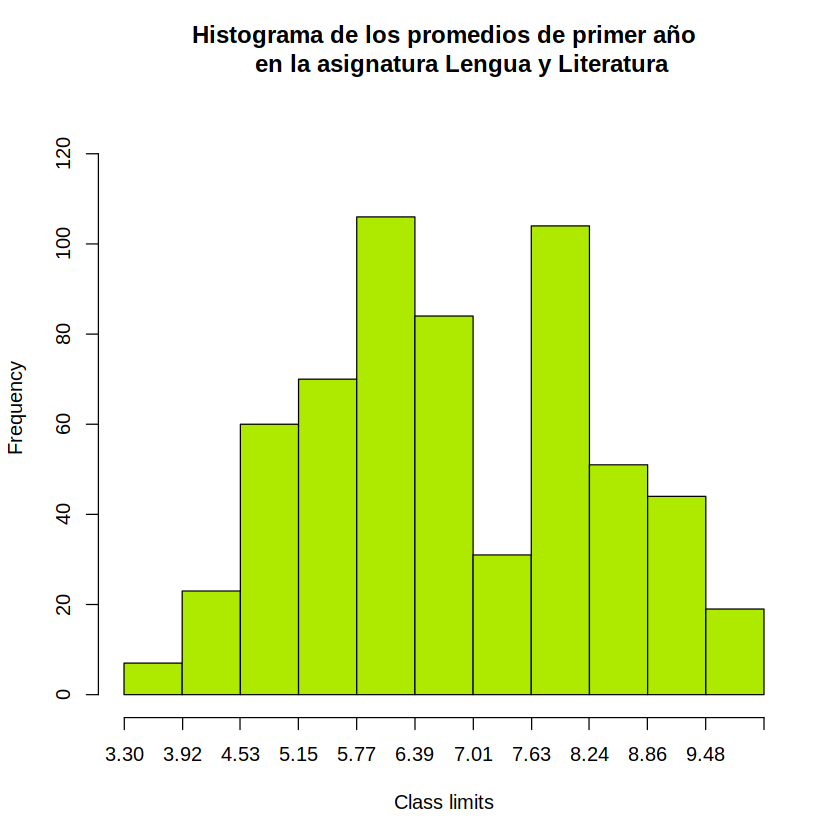

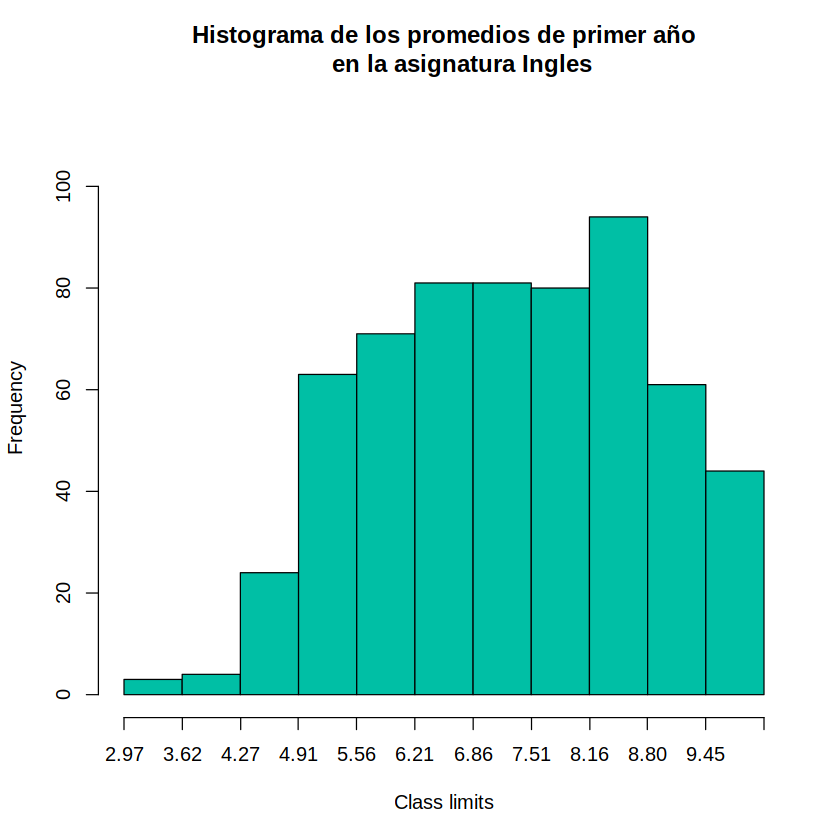

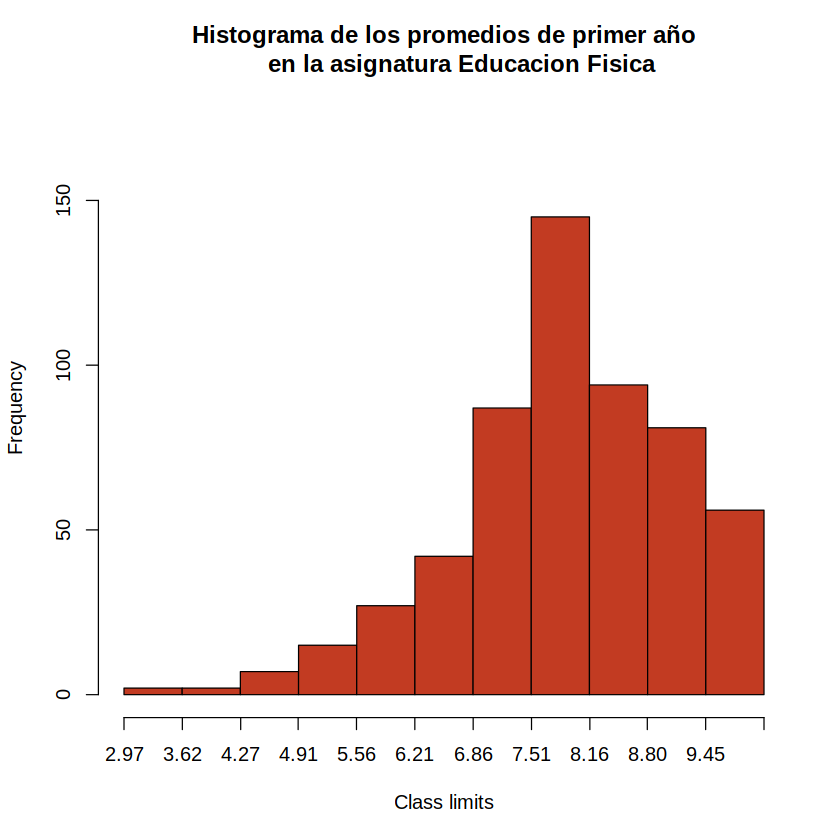

In [100]:
#Graficamos HISTOGRAMAS de los promedios de las materias de primer año

#MATEMATICA
Notas_matematica <- PRIMERO_Victoria_secundaria %>%
  filter(asignatura == "MATEMATICA") 
Grafico <- fdt(Notas_matematica$Promedio, breaks= "Sturges", na.rm= TRUE)
plot(Grafico,
     type= "fh",
     col= naranja,
     main= "Histograma de los promedios de primer año
     en la asignatura Matemática",
     col.sub= "black",)

#LENGUA Y LITERATURA 
Notas_lengua <- PRIMERO_Victoria_secundaria %>%
  filter(asignatura == "LENGUA Y LITERATURA") 
Grafico <- fdt(Notas_lengua$Promedio, breaks= "Sturges", na.rm= TRUE)
plot(Grafico,
     type= "fh",
     col= amarillo_verde,
     main= "Histograma de los promedios de primer año
     en la asignatura Lengua y Literatura",
     col.sub= "black",)

#INGLES
Notas_ingles <- PRIMERO_Victoria_secundaria %>%
  filter(asignatura == "INGLES") 
Grafico <- fdt(Notas_ingles$Promedio, breaks= "Sturges", na.rm= TRUE)
plot(Grafico,
     type= "fh",
     col= azul_verde,
     main= "Histograma de los promedios de primer año
     en la asignatura Ingles",
     col.sub= "black",)

#EDUCACION FISICA
Notas_ef <- PRIMERO_Victoria_secundaria %>%
  filter(asignatura == "EDUCACION FISICA") 
Grafico <- fdt(Notas_ef$Promedio, breaks= "Sturges", na.rm= TRUE)
plot(Grafico,
     type= "fh",
     col= rojo_pastel,
     main= "Histograma de los promedios de primer año
     en la asignatura Educacion Fisica",
     col.sub= "black",)

## SEGUNDO

Mediana MATEMATICA 5.33 
Mediana LENGUA Y LITERATURA 6.33 
Mediana EDUCACION FISICA 8 
Mediana INGLES 7.33

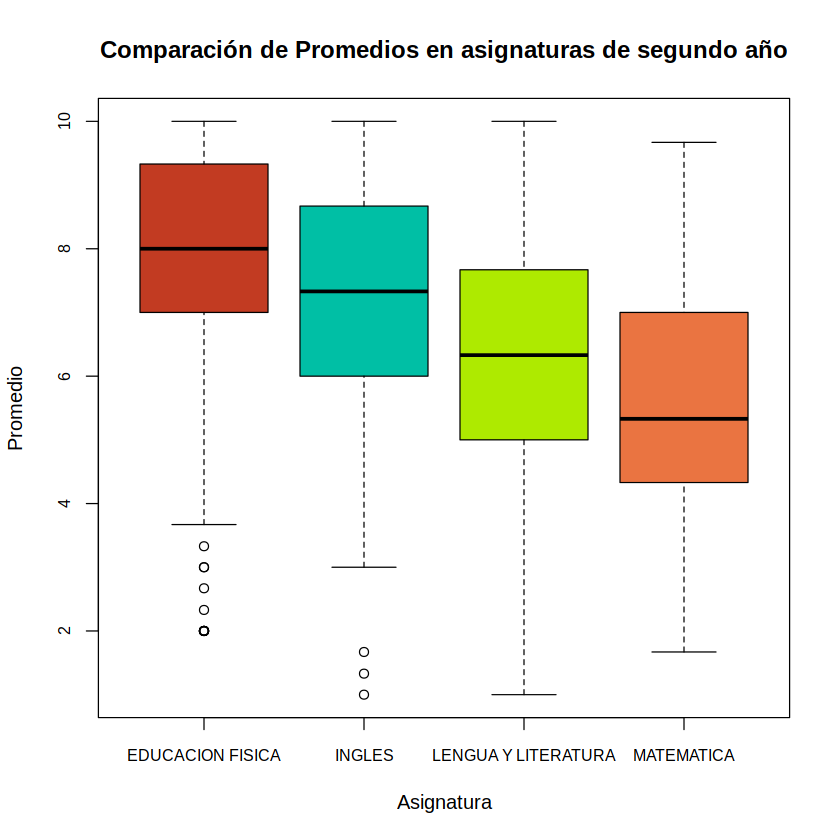

In [101]:
#Boxplots comparativos asignaturas SEGUNDO AÑO

# Filtrar los datos para las cuatro asignaturas
datos_boxplot <- SEGUNDO_Victoria_secundaria %>%
  filter(asignatura %in% c("MATEMATICA", "LENGUA Y LITERATURA", "EDUCACION FISICA", "INGLES"))

# Crear un vector de colores para cada boxplot
colores <- c(rojo_pastel,azul_verde,amarillo_verde,naranja)

# Crear el boxplot
boxplot(Promedio ~ asignatura, data = datos_boxplot, 
        main = "Comparación de Promedios en asignaturas de segundo año",
        xlab = "Asignatura",
        ylab = "Promedio",
        col = colores,
        border = "black",
        cex.axis = 0.8
       )

# Calcular el promedio de las asignaturas a modo de chequeo del grafico
cat("Mediana MATEMATICA",median(datos_boxplot$Promedio[datos_boxplot$asignatura == "MATEMATICA"], na.rm = TRUE), "\n")
cat("Mediana LENGUA Y LITERATURA",median(datos_boxplot$Promedio[datos_boxplot$asignatura == "LENGUA Y LITERATURA"], na.rm = TRUE), "\n")
cat("Mediana EDUCACION FISICA",median(datos_boxplot$Promedio[datos_boxplot$asignatura == "EDUCACION FISICA"], na.rm = TRUE), "\n")
cat("Mediana INGLES",median(datos_boxplot$Promedio[datos_boxplot$asignatura == "INGLES"],na.rm = TRUE))

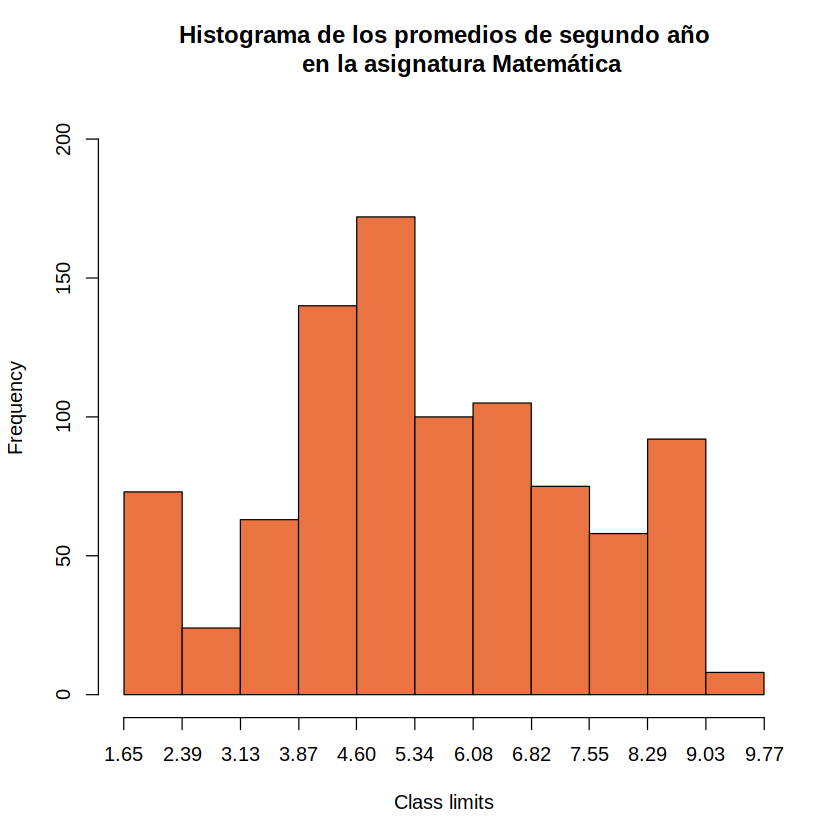

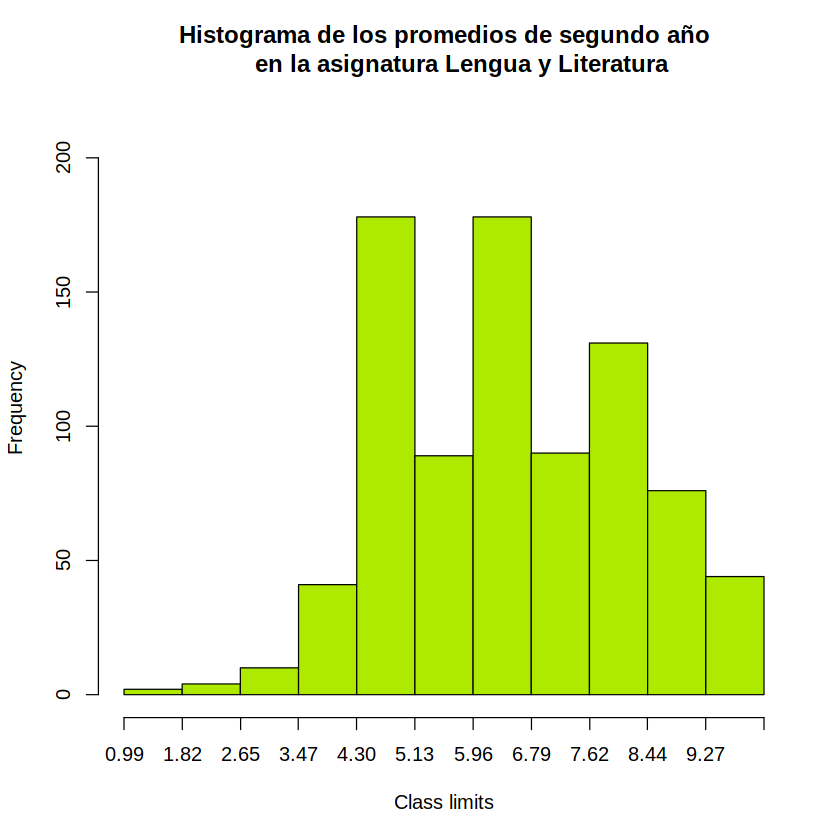

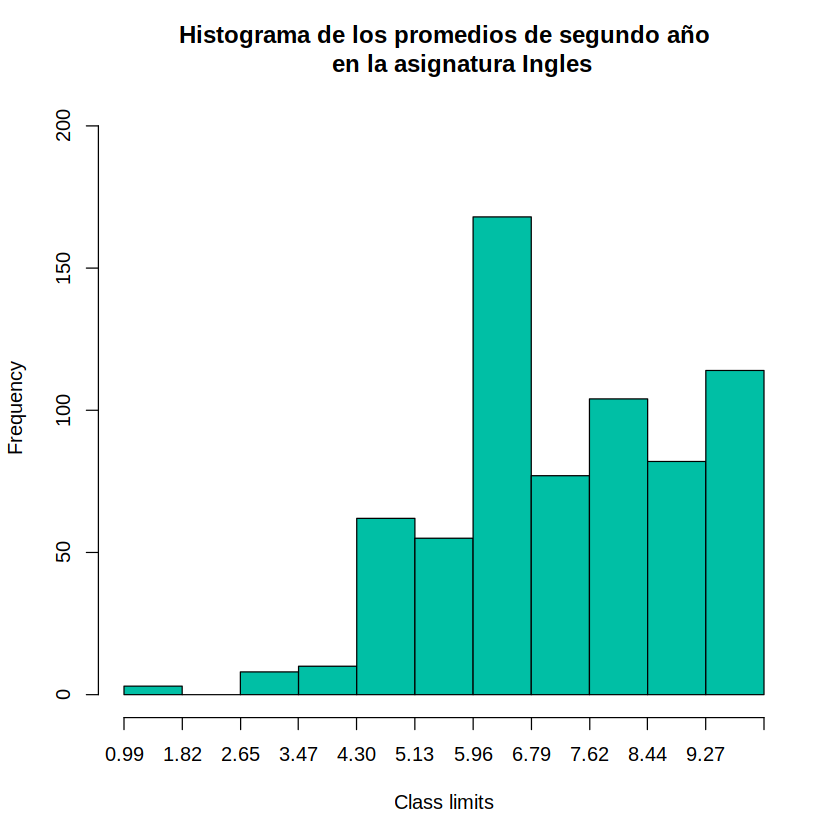

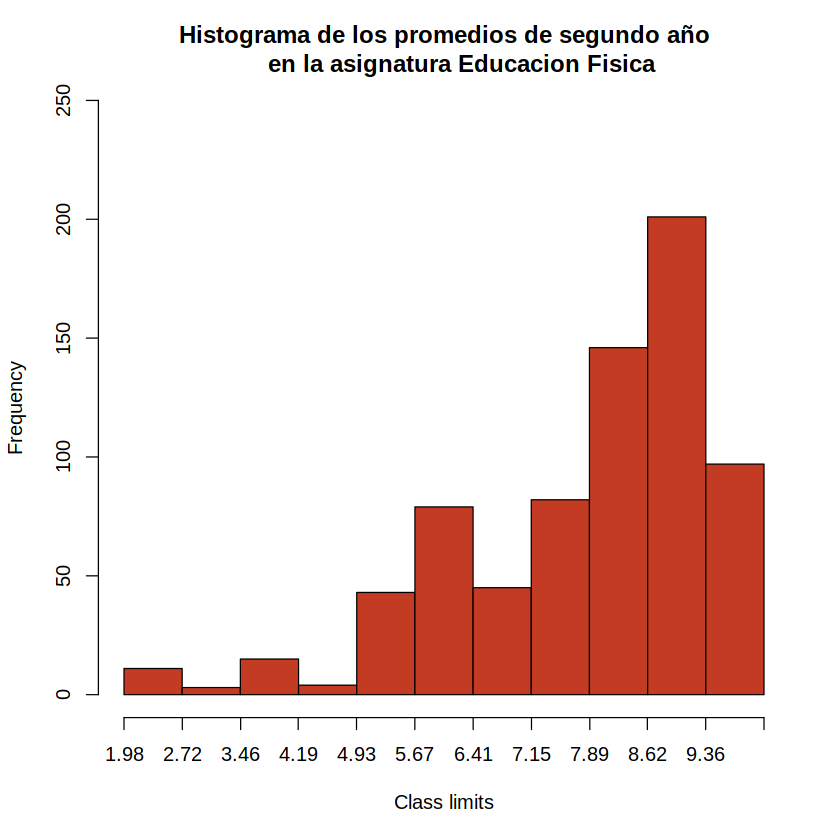

In [102]:
#Graficamos HISTOGRAMAS de los promedios de las materias de segundo año

#MATEMATICA
Notas_matematica <- SEGUNDO_Victoria_secundaria %>%
  filter(asignatura == "MATEMATICA") 
Grafico <- fdt(Notas_matematica$Promedio, breaks= "Sturges", na.rm= TRUE)
plot(Grafico,
     type= "fh",
     col= naranja,
     main= "Histograma de los promedios de segundo año
     en la asignatura Matemática",
     col.sub= "black",)

#LENGUA Y LITERATURA 
Notas_lengua <- SEGUNDO_Victoria_secundaria %>%
  filter(asignatura == "LENGUA Y LITERATURA") 
Grafico <- fdt(Notas_lengua$Promedio, breaks= "Sturges", na.rm= TRUE)
plot(Grafico,
     type= "fh",
     col= amarillo_verde,
     main= "Histograma de los promedios de segundo año
     en la asignatura Lengua y Literatura",
     col.sub= "black",)

#INGLES
Notas_ingles <- SEGUNDO_Victoria_secundaria %>%
  filter(asignatura == "INGLES") 
Grafico <- fdt(Notas_ingles$Promedio, breaks= "Sturges", na.rm= TRUE)
plot(Grafico,
     type= "fh",
     col= azul_verde,
     main= "Histograma de los promedios de segundo año
     en la asignatura Ingles",
     col.sub= "black",)

#EDUCACION FISICA
Notas_ef <- SEGUNDO_Victoria_secundaria %>%
  filter(asignatura == "EDUCACION FISICA") 
Grafico <- fdt(Notas_ef$Promedio, breaks= "Sturges", na.rm= TRUE)
plot(Grafico,
     type= "fh",
     col= rojo_pastel,
     main= "Histograma de los promedios de segundo año
     en la asignatura Educacion Fisica",
     col.sub= "black",)

## TERCERO

Mediana MATEMATICA 6 
Mediana LENGUA Y LITERATURA 6.67 
Mediana EDUCACION FISICA 8 
Mediana INGLES 7.33

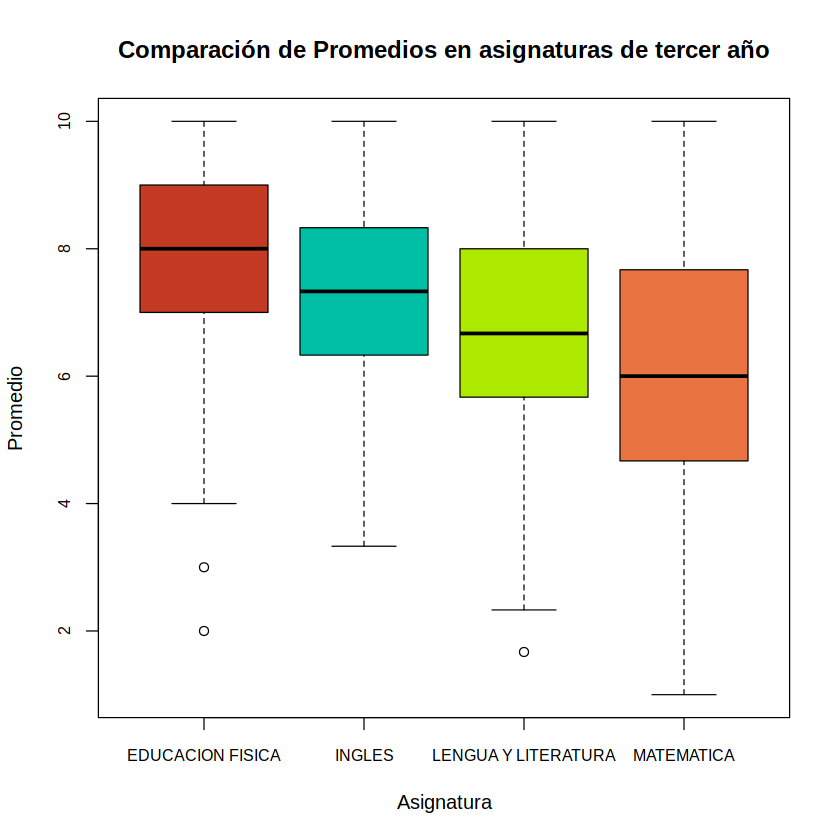

In [103]:
#Boxplots comparativos asignaturas TERCER AÑO

# Filtrar los datos para las cuatro asignaturas
datos_boxplot <- TERCERO_Victoria_secundaria %>%
  filter(asignatura %in% c("MATEMATICA", "LENGUA Y LITERATURA", "EDUCACION FISICA", "INGLES"))

# Crear un vector de colores para cada boxplot
colores <- c(rojo_pastel,azul_verde,amarillo_verde,naranja)

# Crear el boxplot
boxplot(Promedio ~ asignatura, data = datos_boxplot, 
        main = "Comparación de Promedios en asignaturas de tercer año",
        xlab = "Asignatura",
        ylab = "Promedio",
        col = colores,
        border = "black",
        cex.axis = 0.8
       )

# Calcular el promedio de las asignaturas a modo de chequeo del grafico
cat("Mediana MATEMATICA",median(datos_boxplot$Promedio[datos_boxplot$asignatura == "MATEMATICA"], na.rm = TRUE), "\n")
cat("Mediana LENGUA Y LITERATURA",median(datos_boxplot$Promedio[datos_boxplot$asignatura == "LENGUA Y LITERATURA"], na.rm = TRUE), "\n")
cat("Mediana EDUCACION FISICA",median(datos_boxplot$Promedio[datos_boxplot$asignatura == "EDUCACION FISICA"], na.rm = TRUE), "\n")
cat("Mediana INGLES",median(datos_boxplot$Promedio[datos_boxplot$asignatura == "INGLES"],na.rm = TRUE))

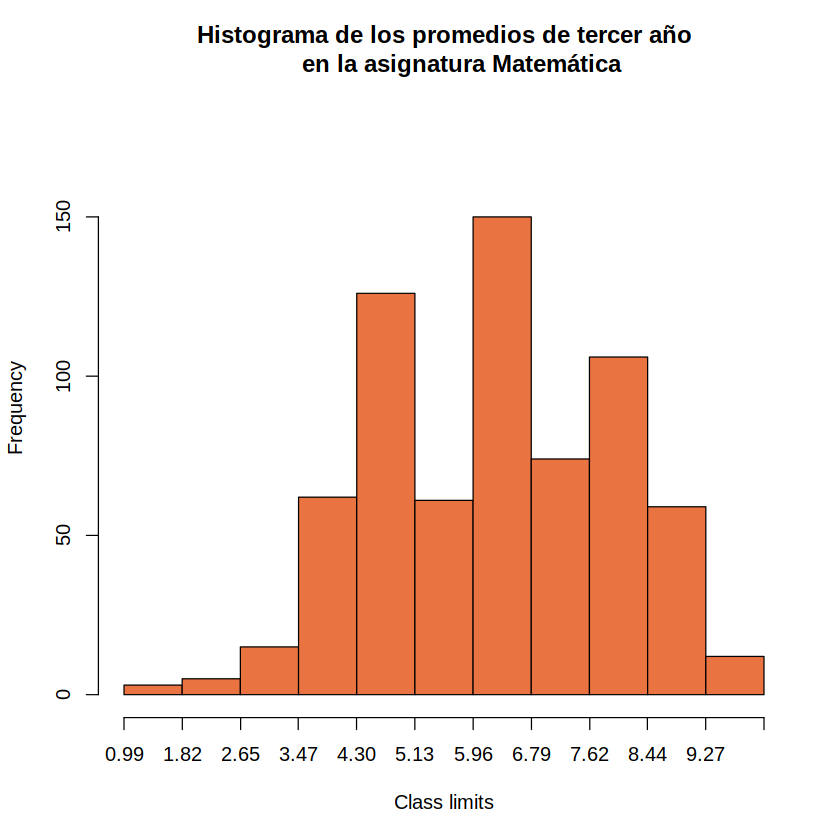

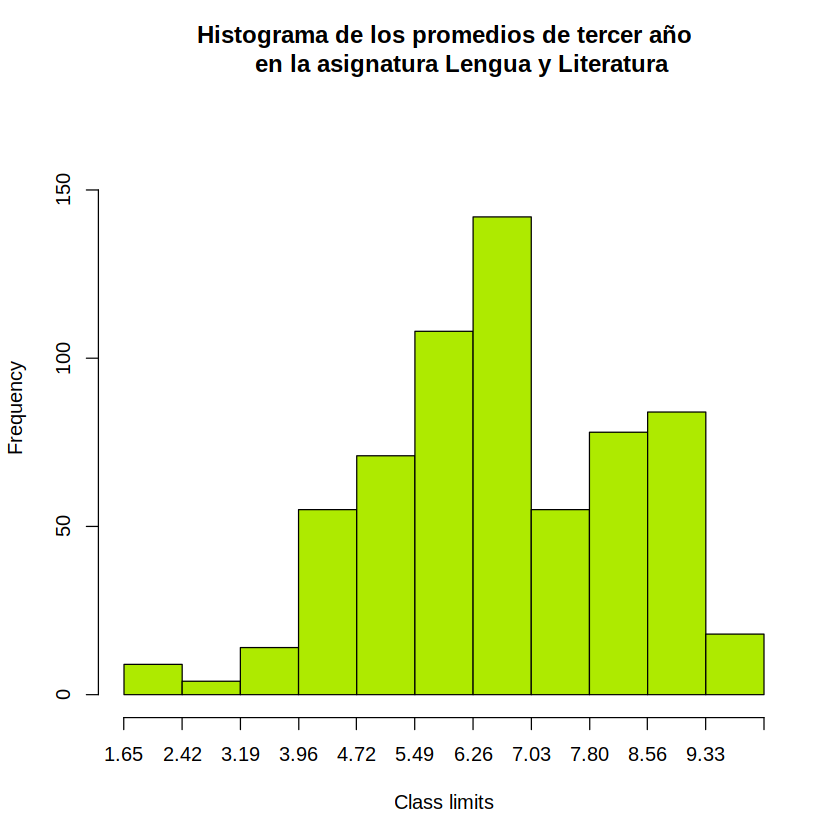

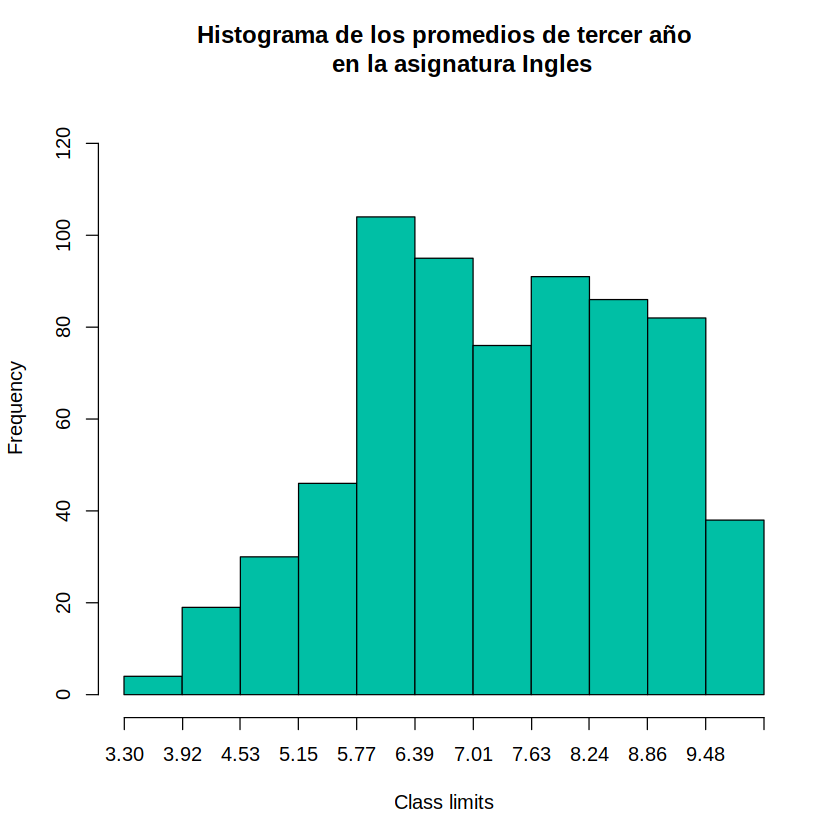

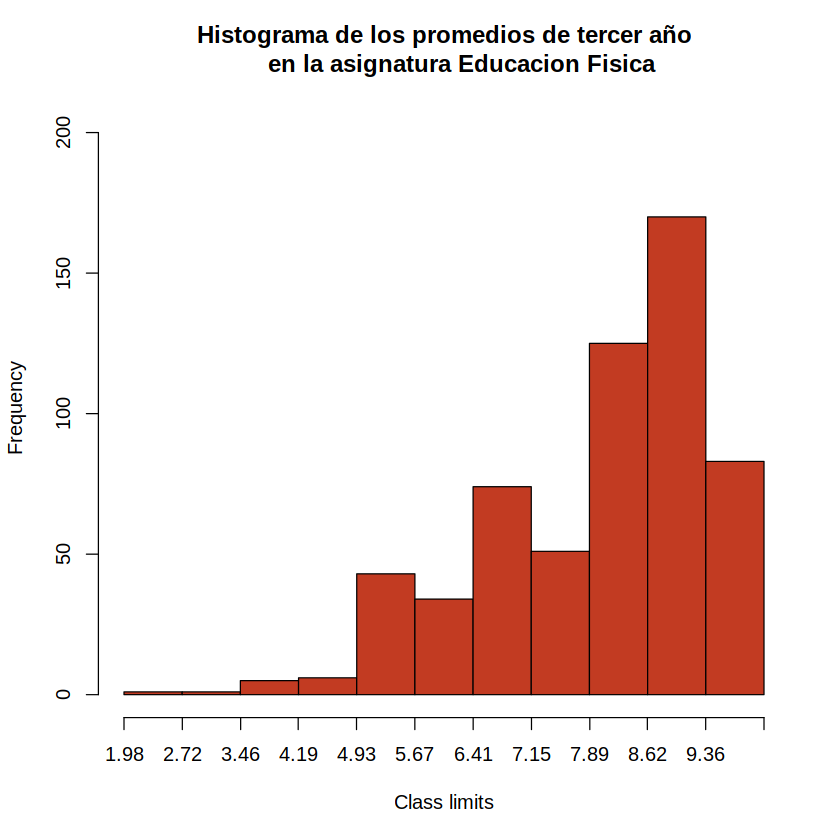

In [104]:
#Graficamos HISTOGRAMAS de los promedios de las materias de tercer año

#MATEMATICA
Notas_matematica <- TERCERO_Victoria_secundaria %>%
  filter(asignatura == "MATEMATICA") 
Grafico <- fdt(Notas_matematica$Promedio, breaks= "Sturges", na.rm= TRUE)
plot(Grafico,
     type= "fh",
     col= naranja,
     main= "Histograma de los promedios de tercer año
     en la asignatura Matemática",
     col.sub= "black",)

#LENGUA Y LITERATURA 
Notas_lengua <- TERCERO_Victoria_secundaria %>%
  filter(asignatura == "LENGUA Y LITERATURA") 
Grafico <- fdt(Notas_lengua$Promedio, breaks= "Sturges", na.rm= TRUE)
plot(Grafico,
     type= "fh",
     col= amarillo_verde,
     main= "Histograma de los promedios de tercer año
     en la asignatura Lengua y Literatura",
     col.sub= "black",)

#INGLES
Notas_ingles <- TERCERO_Victoria_secundaria %>%
  filter(asignatura == "INGLES") 
Grafico <- fdt(Notas_ingles$Promedio, breaks= "Sturges", na.rm= TRUE)
plot(Grafico,
     type= "fh",
     col= azul_verde,
     main= "Histograma de los promedios de tercer año
     en la asignatura Ingles",
     col.sub= "black",)

#EDUCACION FISICA
Notas_ef <- TERCERO_Victoria_secundaria %>%
  filter(asignatura == "EDUCACION FISICA") 
Grafico <- fdt(Notas_ef$Promedio, breaks= "Sturges", na.rm= TRUE)
plot(Grafico,
     type= "fh",
     col= rojo_pastel,
     main= "Histograma de los promedios de tercer año
     en la asignatura Educacion Fisica",
     col.sub= "black",)

## CUARTO

Mediana MATEMATICA 6 
Mediana LENGUA Y LITERATURA 7 
Mediana EDUCACION FISICA 8.33 
Mediana INGLES 7.67

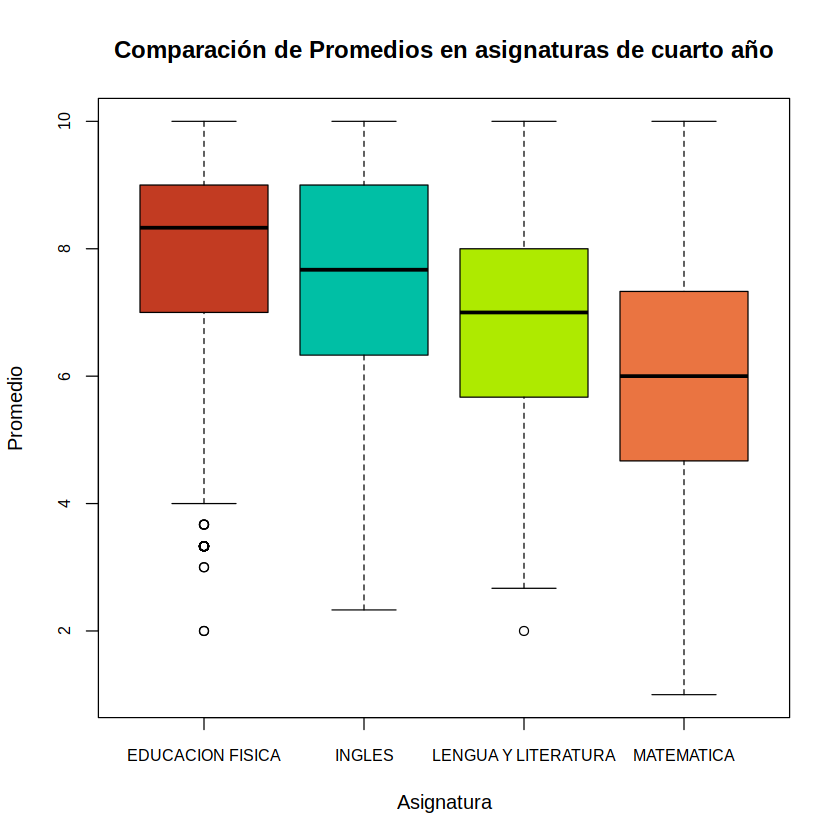

In [105]:
#Boxplots comparativos asignaturas CUARTO AÑO

# Filtrar los datos para las cuatro asignaturas
datos_boxplot <- CUARTO_Victoria_secundaria %>%
  filter(asignatura %in% c("MATEMATICA", "LENGUA Y LITERATURA", "EDUCACION FISICA", "INGLES"))

# Crear un vector de colores para cada boxplot
colores <- c(rojo_pastel,azul_verde,amarillo_verde,naranja)

# Crear el boxplot
boxplot(Promedio ~ asignatura, data = datos_boxplot, 
        main = "Comparación de Promedios en asignaturas de cuarto año",
        xlab = "Asignatura",
        ylab = "Promedio",
        col = colores,
        border = "black",
        cex.axis = 0.8
       )

# Calcular el promedio de las asignaturas a modo de chequeo del grafico
cat("Mediana MATEMATICA",median(datos_boxplot$Promedio[datos_boxplot$asignatura == "MATEMATICA"], na.rm = TRUE), "\n")
cat("Mediana LENGUA Y LITERATURA",median(datos_boxplot$Promedio[datos_boxplot$asignatura == "LENGUA Y LITERATURA"], na.rm = TRUE), "\n")
cat("Mediana EDUCACION FISICA",median(datos_boxplot$Promedio[datos_boxplot$asignatura == "EDUCACION FISICA"], na.rm = TRUE), "\n")
cat("Mediana INGLES",median(datos_boxplot$Promedio[datos_boxplot$asignatura == "INGLES"],na.rm = TRUE))

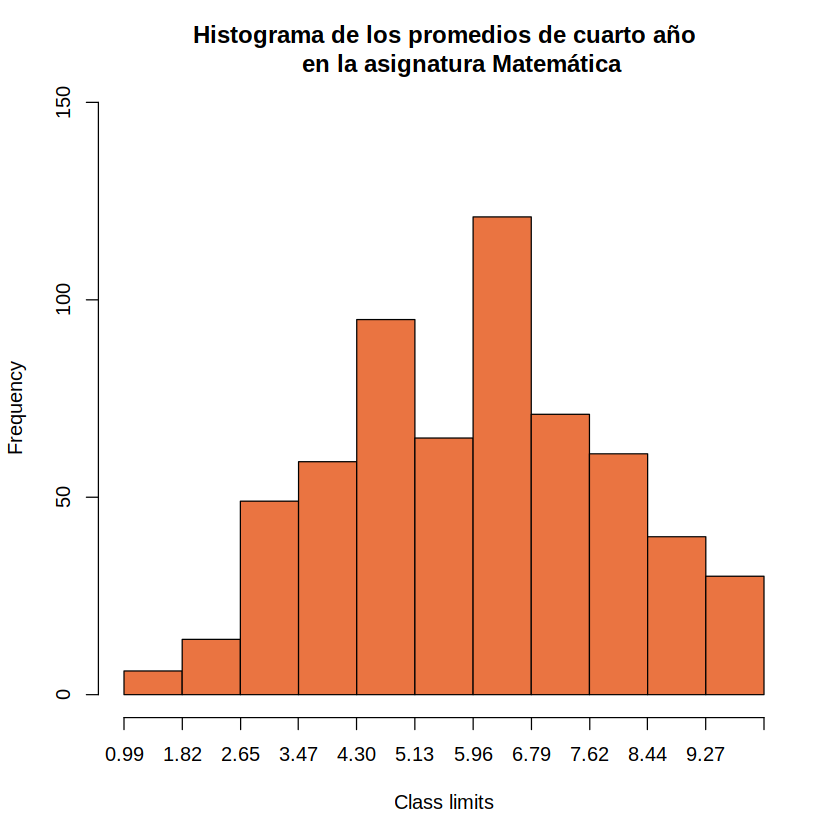

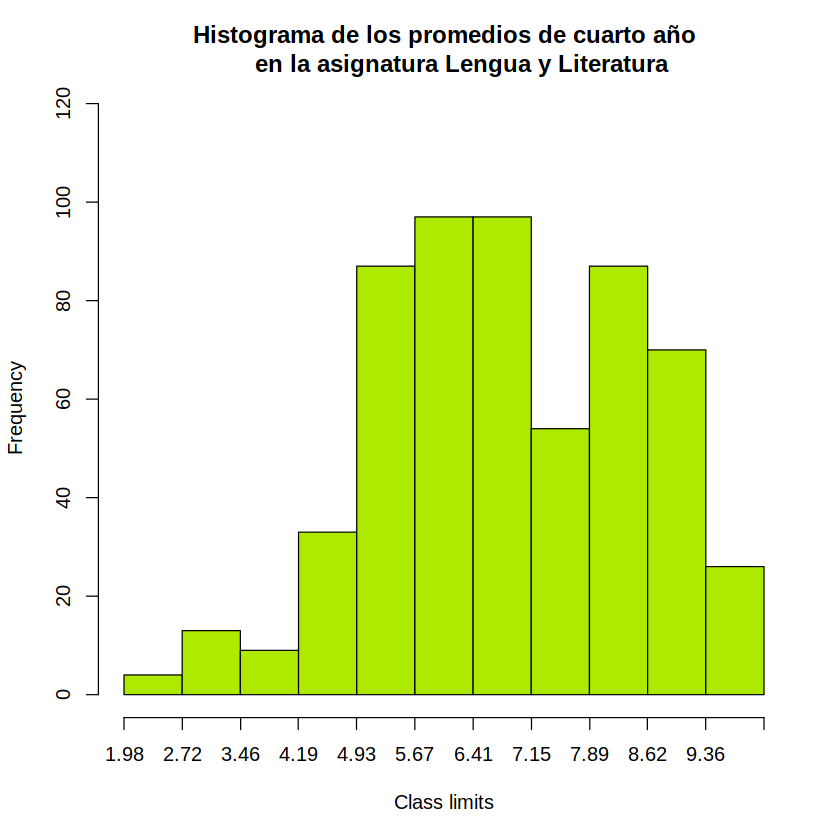

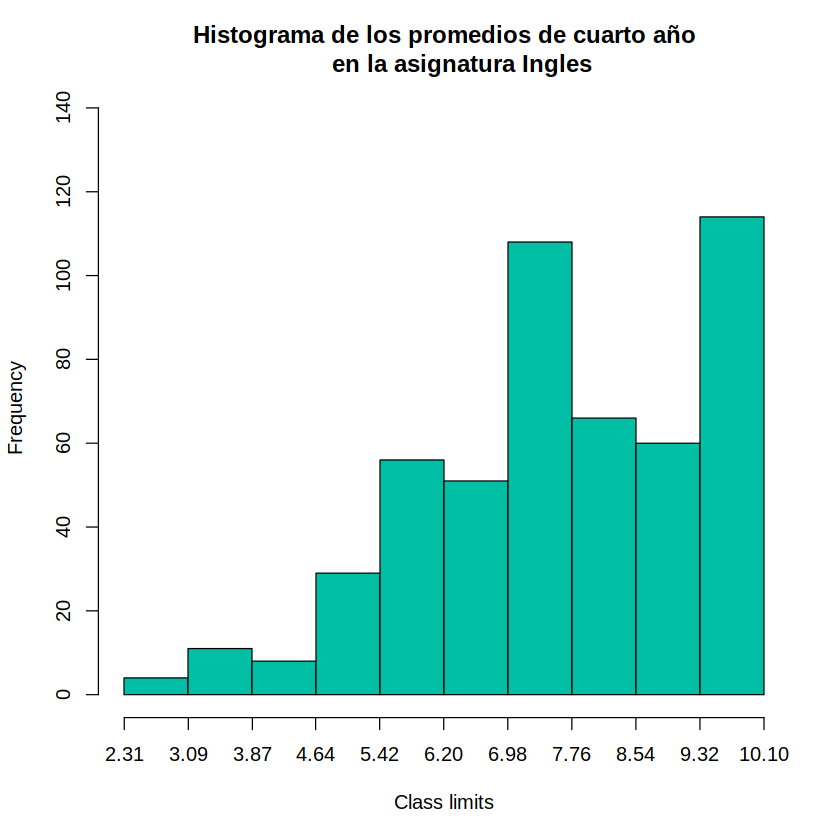

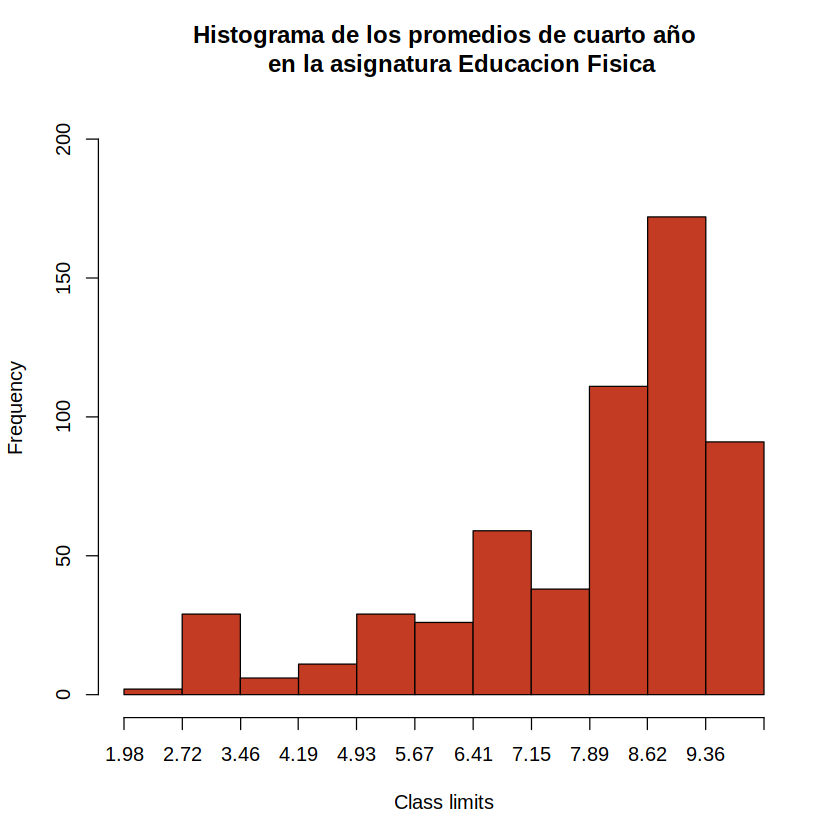

In [106]:
#Graficamos HISTOGRAMAS de los promedios de las materias de cuarto año

#MATEMATICA
Notas_matematica <- CUARTO_Victoria_secundaria %>%
  filter(asignatura == "MATEMATICA") 
Grafico <- fdt(Notas_matematica$Promedio, breaks= "Sturges", na.rm= TRUE)
plot(Grafico,
     type= "fh",
     col= naranja,
     main= "Histograma de los promedios de cuarto año
     en la asignatura Matemática",
     col.sub= "black",)

#LENGUA Y LITERATURA 
Notas_lengua <- CUARTO_Victoria_secundaria %>%
  filter(asignatura == "LENGUA Y LITERATURA") 
Grafico <- fdt(Notas_lengua$Promedio, breaks= "Sturges", na.rm= TRUE)
plot(Grafico,
     type= "fh",
     col= amarillo_verde,
     main= "Histograma de los promedios de cuarto año
     en la asignatura Lengua y Literatura",
     col.sub= "black",)

#INGLES
Notas_ingles <- CUARTO_Victoria_secundaria %>%
  filter(asignatura == "INGLES") 
Grafico <- fdt(Notas_ingles$Promedio, breaks= "Sturges", na.rm= TRUE)
plot(Grafico,
     type= "fh",
     col= azul_verde,
     main= "Histograma de los promedios de cuarto año
     en la asignatura Ingles",
     col.sub= "black",)

#EDUCACION FISICA
Notas_ef <- CUARTO_Victoria_secundaria %>%
  filter(asignatura == "EDUCACION FISICA") 
Grafico <- fdt(Notas_ef$Promedio, breaks= "Sturges", na.rm= TRUE)
plot(Grafico,
     type= "fh",
     col= rojo_pastel,
     main= "Histograma de los promedios de cuarto año
     en la asignatura Educacion Fisica",
     col.sub= "black",)

## QUINTO

Mediana MATEMATICA 6.67 
Mediana LENGUA Y LITERATURA 7.67 
Mediana EDUCACION FISICA 8.33 
Mediana INGLES 8

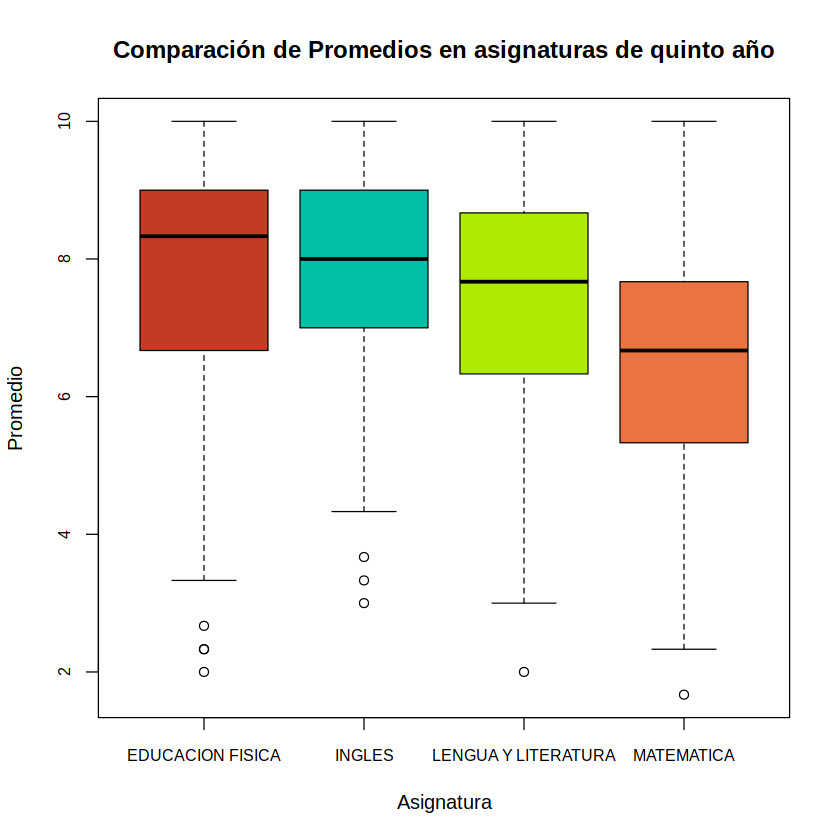

In [107]:
#Boxplots comparativos asignaturas QUINTO AÑO

# Filtrar los datos para las cuatro asignaturas
datos_boxplot <- QUINTO_Victoria_secundaria %>%
  filter(asignatura %in% c("MATEMATICA", "LENGUA Y LITERATURA", "EDUCACION FISICA", "INGLES"))

# Crear un vector de colores para cada boxplot
colores <- c(rojo_pastel,azul_verde,amarillo_verde,naranja)

# Crear el boxplot
boxplot(Promedio ~ asignatura, data = datos_boxplot, 
        main = "Comparación de Promedios en asignaturas de quinto año",
        xlab = "Asignatura",
        ylab = "Promedio",
        col = colores,
        border = "black",
        cex.axis = 0.8
       )

# Calcular el promedio de las asignaturas a modo de chequeo del grafico
cat("Mediana MATEMATICA",median(datos_boxplot$Promedio[datos_boxplot$asignatura == "MATEMATICA"], na.rm = TRUE), "\n")
cat("Mediana LENGUA Y LITERATURA",median(datos_boxplot$Promedio[datos_boxplot$asignatura == "LENGUA Y LITERATURA"], na.rm = TRUE), "\n")
cat("Mediana EDUCACION FISICA",median(datos_boxplot$Promedio[datos_boxplot$asignatura == "EDUCACION FISICA"], na.rm = TRUE), "\n")
cat("Mediana INGLES",median(datos_boxplot$Promedio[datos_boxplot$asignatura == "INGLES"],na.rm = TRUE))

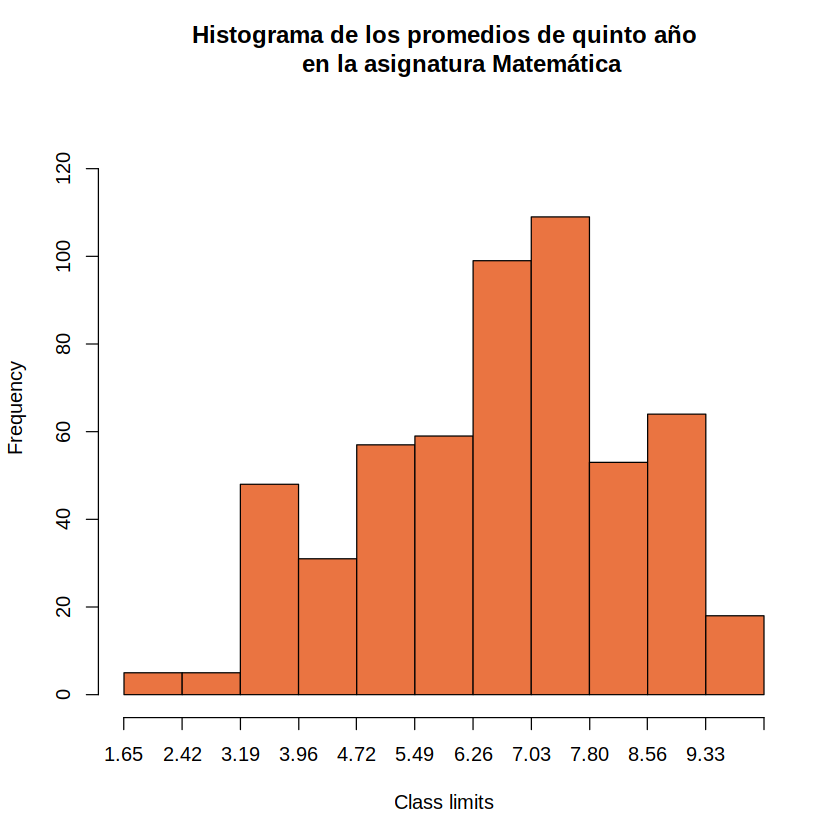

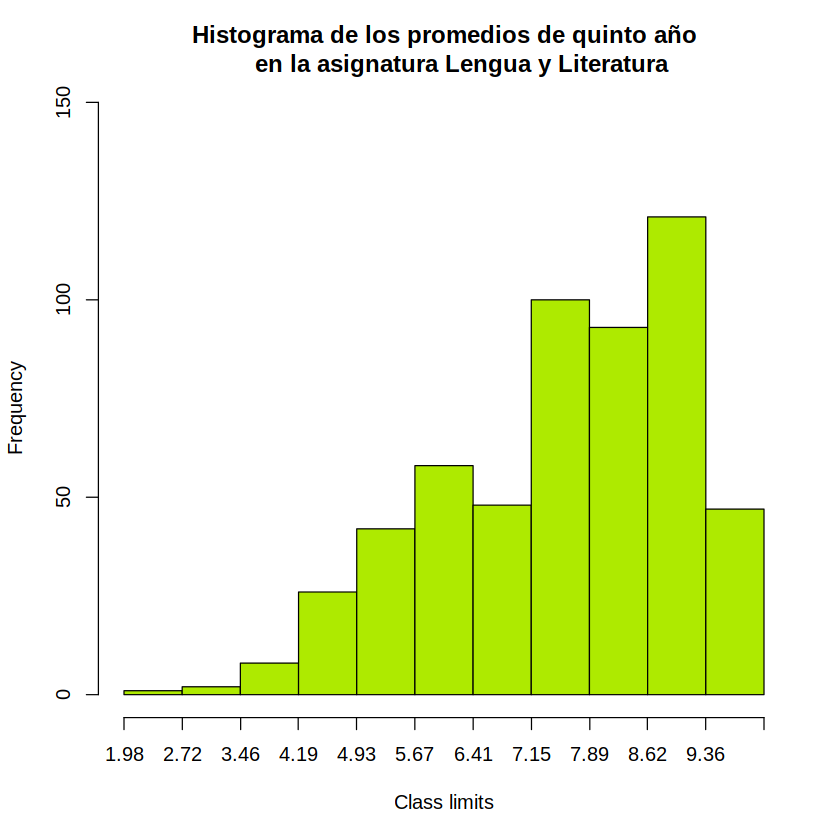

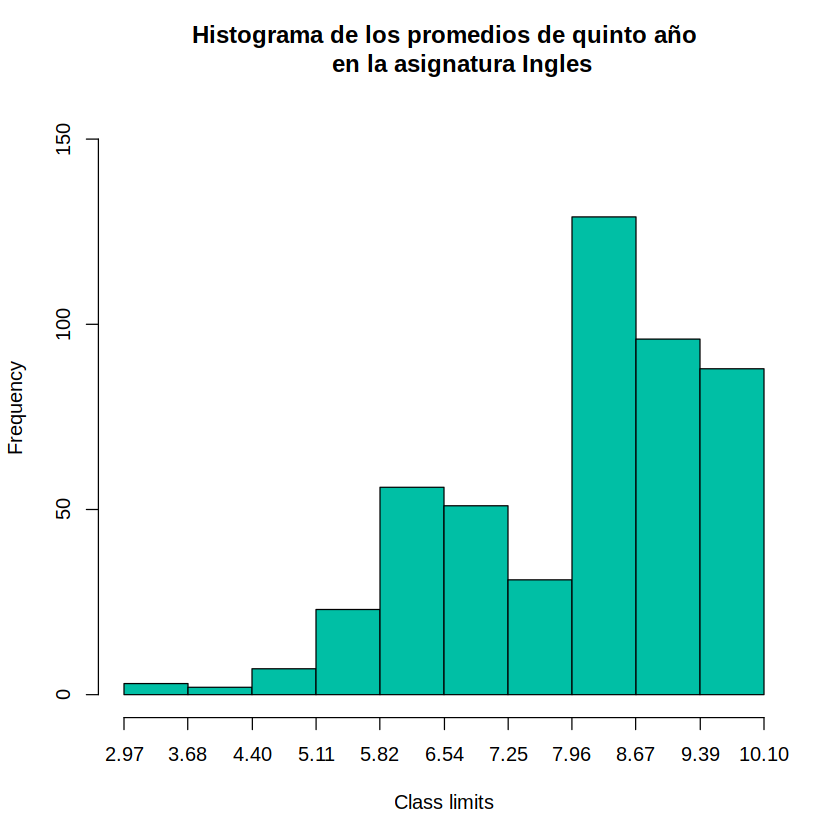

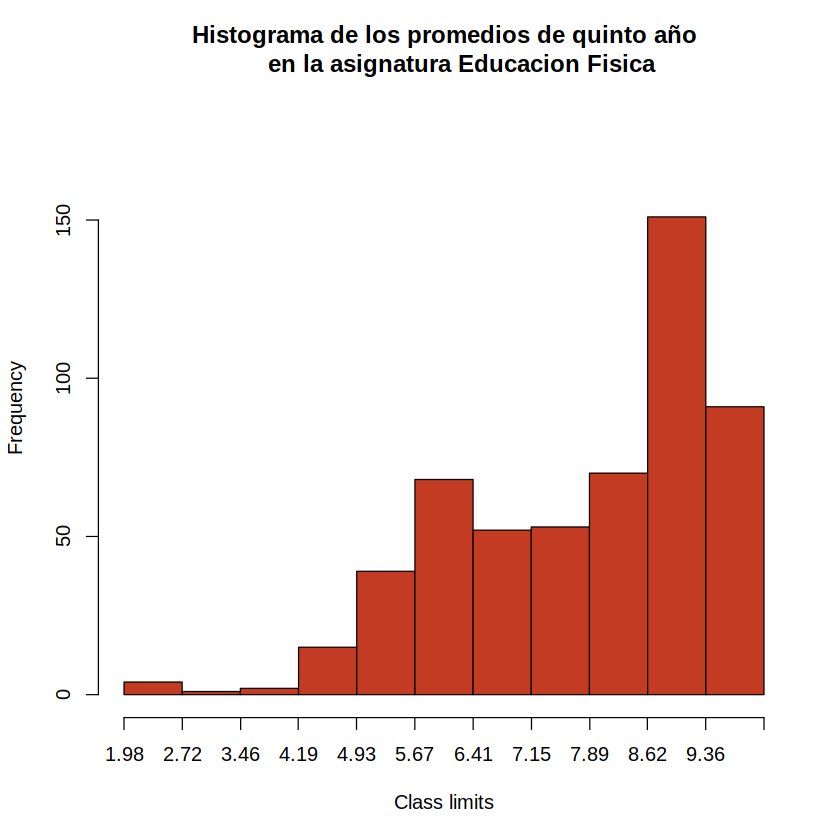

In [108]:
#Graficamos HISTOGRAMAS de los promedios de las materias de quinto año

#MATEMATICA
Notas_matematica <- QUINTO_Victoria_secundaria %>%
  filter(asignatura == "MATEMATICA") 
Grafico <- fdt(Notas_matematica$Promedio, breaks= "Sturges", na.rm= TRUE)
plot(Grafico,
     type= "fh",
     col= naranja,
     main= "Histograma de los promedios de quinto año
     en la asignatura Matemática",
     col.sub= "black",)

#LENGUA Y LITERATURA 
Notas_lengua <- QUINTO_Victoria_secundaria %>%
  filter(asignatura == "LENGUA Y LITERATURA") 
Grafico <- fdt(Notas_lengua$Promedio, breaks= "Sturges", na.rm= TRUE)
plot(Grafico,
     type= "fh",
     col= amarillo_verde,
     main= "Histograma de los promedios de quinto año
     en la asignatura Lengua y Literatura",
     col.sub= "black",)

#INGLES
Notas_ingles <- QUINTO_Victoria_secundaria %>%
  filter(asignatura == "INGLES") 
Grafico <- fdt(Notas_ingles$Promedio, breaks= "Sturges", na.rm= TRUE)
plot(Grafico,
     type= "fh",
     col= azul_verde,
     main= "Histograma de los promedios de quinto año
     en la asignatura Ingles",
     col.sub= "black",)

#EDUCACION FISICA
Notas_ef <- QUINTO_Victoria_secundaria %>%
  filter(asignatura == "EDUCACION FISICA") 
Grafico <- fdt(Notas_ef$Promedio, breaks= "Sturges", na.rm= TRUE)
plot(Grafico,
     type= "fh",
     col= rojo_pastel,
     main= "Histograma de los promedios de quinto año
     en la asignatura Educacion Fisica",
     col.sub= "black",)

## SEXTO

Mediana MATEMATICA 7 
Mediana LENGUA Y LITERATURA 8 
Mediana EDUCACION FISICA 8.33 
Mediana INGLES 8

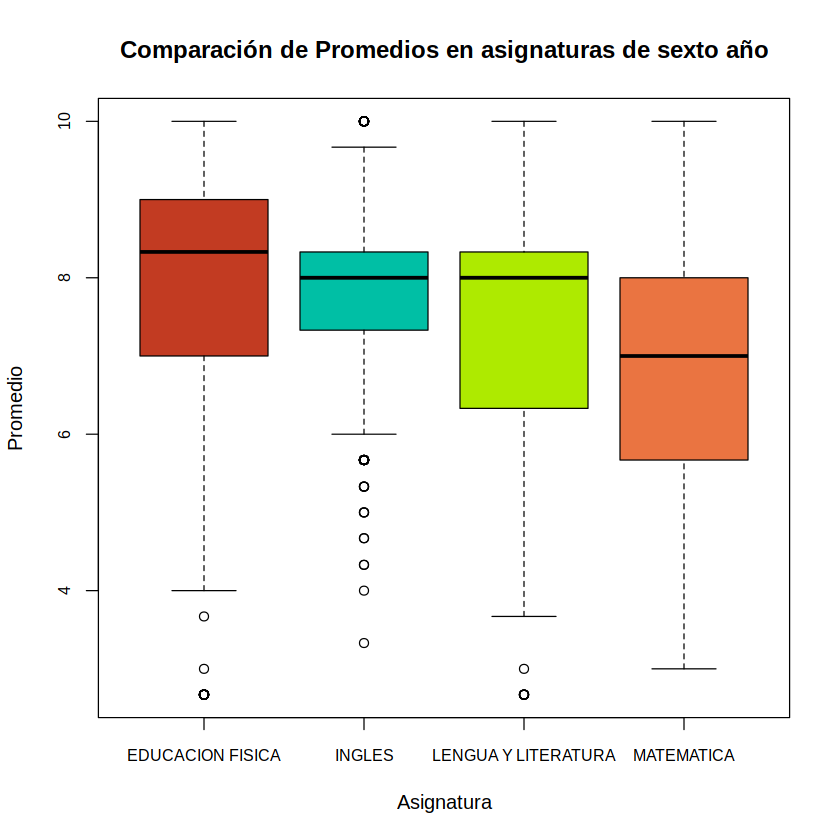

In [109]:
#Boxplots comparativos asignaturas SEXTO AÑO

# Filtrar los datos para las cuatro asignaturas
datos_boxplot <- SEXTO_Victoria_secundaria %>%
  filter(asignatura %in% c("MATEMATICA", "LENGUA Y LITERATURA", "EDUCACION FISICA", "INGLES"))

# Crear un vector de colores para cada boxplot
colores <- c(rojo_pastel,azul_verde,amarillo_verde,naranja)

# Crear el boxplot
boxplot(Promedio ~ asignatura, data = datos_boxplot, 
        main = "Comparación de Promedios en asignaturas de sexto año",
        xlab = "Asignatura",
        ylab = "Promedio",
        col = colores,
        border = "black",
        cex.axis = 0.8
       )

# Calcular el promedio de las asignaturas a modo de chequeo del grafico
cat("Mediana MATEMATICA",median(datos_boxplot$Promedio[datos_boxplot$asignatura == "MATEMATICA"], na.rm = TRUE), "\n")
cat("Mediana LENGUA Y LITERATURA",median(datos_boxplot$Promedio[datos_boxplot$asignatura == "LENGUA Y LITERATURA"], na.rm = TRUE), "\n")
cat("Mediana EDUCACION FISICA",median(datos_boxplot$Promedio[datos_boxplot$asignatura == "EDUCACION FISICA"], na.rm = TRUE), "\n")
cat("Mediana INGLES",median(datos_boxplot$Promedio[datos_boxplot$asignatura == "INGLES"],na.rm = TRUE))

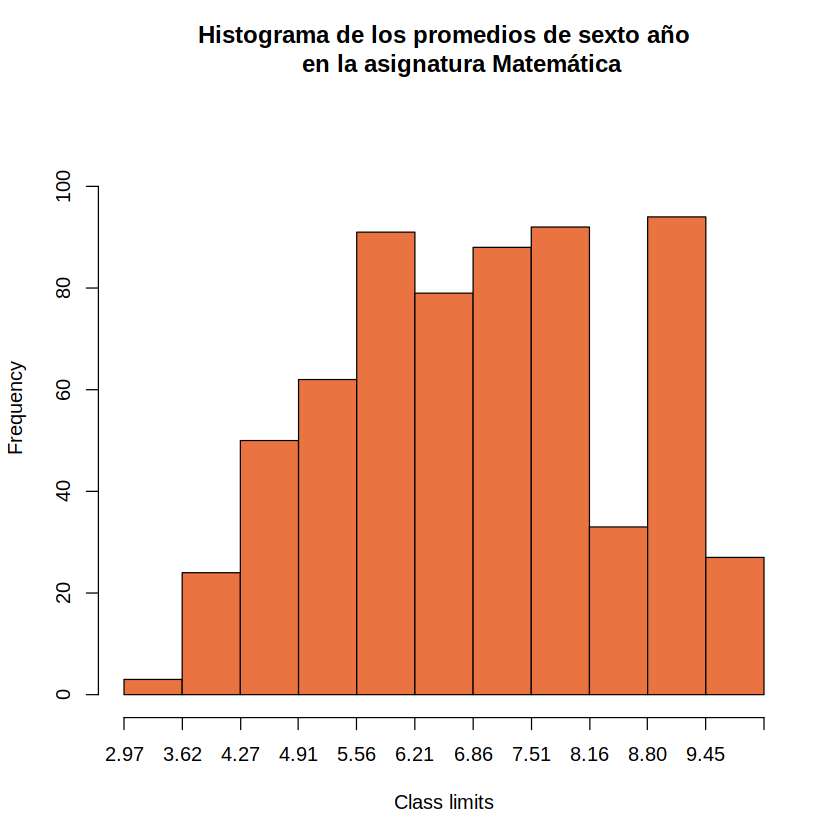

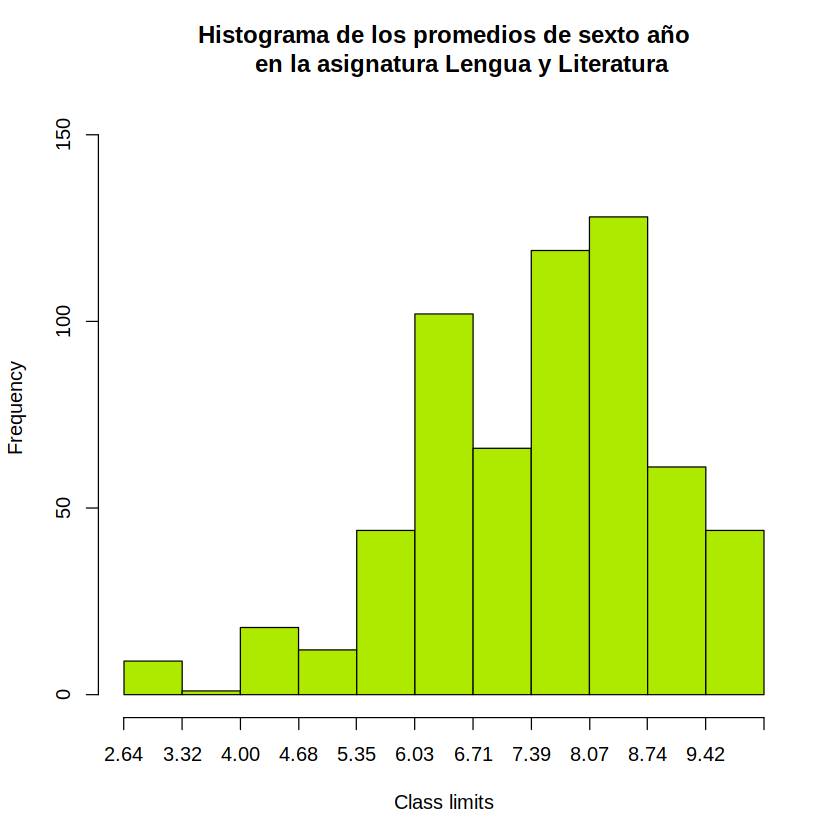

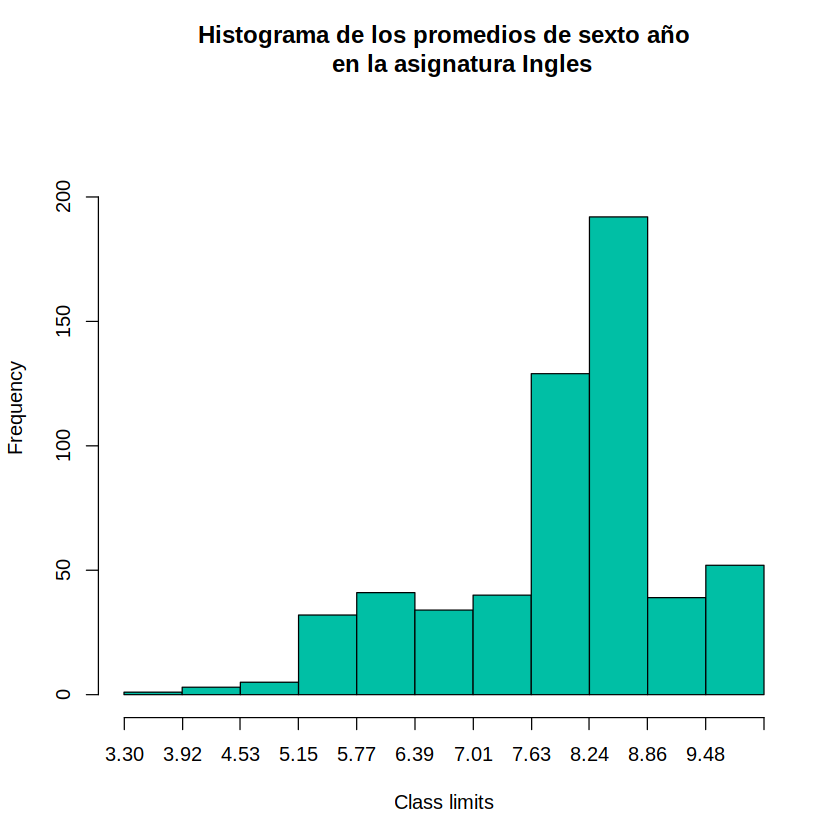

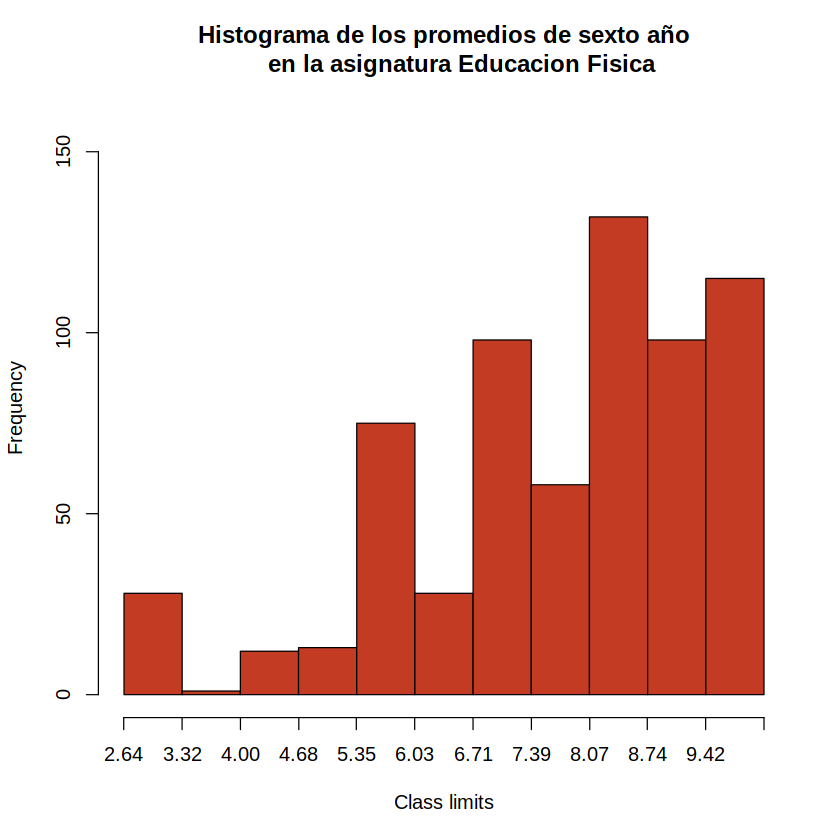

In [110]:
#Graficamos HISTOGRAMAS de los promedios de las materias de sexto año

#MATEMATICA
Notas_matematica <- SEXTO_Victoria_secundaria %>%
  filter(asignatura == "MATEMATICA") 
Grafico <- fdt(Notas_matematica$Promedio, breaks= "Sturges", na.rm= TRUE)
plot(Grafico,
     type= "fh",
     col= naranja,
     main= "Histograma de los promedios de sexto año
     en la asignatura Matemática",
     col.sub= "black",)

#LENGUA Y LITERATURA 
Notas_lengua <- SEXTO_Victoria_secundaria %>%
  filter(asignatura == "LENGUA Y LITERATURA") 
Grafico <- fdt(Notas_lengua$Promedio, breaks= "Sturges", na.rm= TRUE)
plot(Grafico,
     type= "fh",
     col= amarillo_verde,
     main= "Histograma de los promedios de sexto año
     en la asignatura Lengua y Literatura",
     col.sub= "black",)

#INGLES
Notas_ingles <- SEXTO_Victoria_secundaria %>%
  filter(asignatura == "INGLES") 
Grafico <- fdt(Notas_ingles$Promedio, breaks= "Sturges", na.rm= TRUE)
plot(Grafico,
     type= "fh",
     col= azul_verde,
     main= "Histograma de los promedios de sexto año
     en la asignatura Ingles",
     col.sub= "black",)

#EDUCACION FISICA
Notas_ef <- SEXTO_Victoria_secundaria %>%
  filter(asignatura == "EDUCACION FISICA") 
Grafico <- fdt(Notas_ef$Promedio, breaks= "Sturges", na.rm= TRUE)
plot(Grafico,
     type= "fh",
     col= rojo_pastel,
     main= "Histograma de los promedios de sexto año
     en la asignatura Educacion Fisica",
     col.sub= "black",)

## SEPTIMO

Mediana MATEMATICA 7 
Mediana EDUCACION FISICA 7 


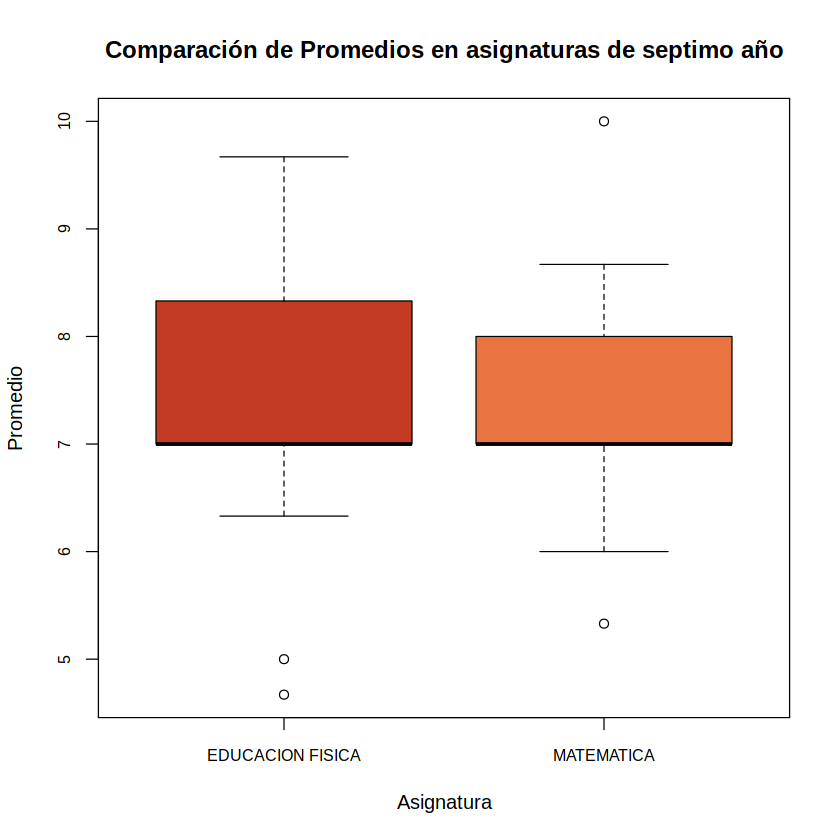

In [111]:
#Boxplots comparativos asignaturas SEPTIMO AÑO

# Filtrar los datos para las cuatro asignaturas
datos_boxplot <- SEPTIMO_Victoria_secundaria %>%
  filter(asignatura %in% c("MATEMATICA", "EDUCACION FISICA"))

# Crear un vector de colores para cada boxplot
colores <- c(rojo_pastel,naranja)

# Crear el boxplot
boxplot(Promedio ~ asignatura, data = datos_boxplot, 
        main = "Comparación de Promedios en asignaturas de septimo año",
        xlab = "Asignatura",
        ylab = "Promedio",
        col = colores,
        border = "black",
        cex.axis = 0.8
       )

# Calcular el promedio de las asignaturas a modo de chequeo del grafico
cat("Mediana MATEMATICA",median(datos_boxplot$Promedio[datos_boxplot$asignatura == "MATEMATICA"], na.rm = TRUE), "\n")
cat("Mediana EDUCACION FISICA",median(datos_boxplot$Promedio[datos_boxplot$asignatura == "EDUCACION FISICA"], na.rm = TRUE), "\n")

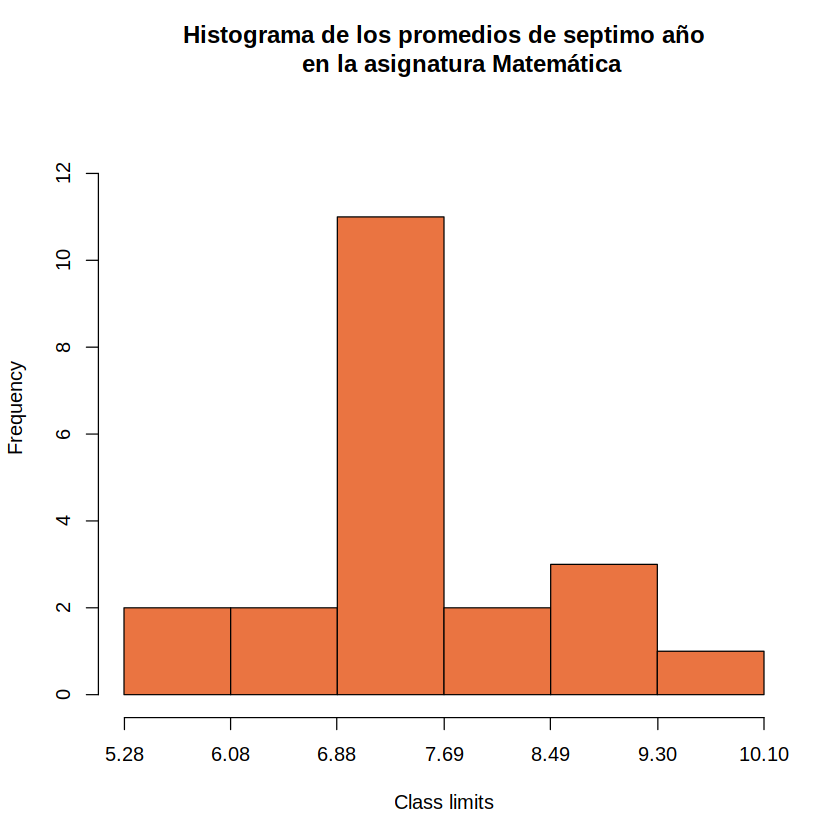

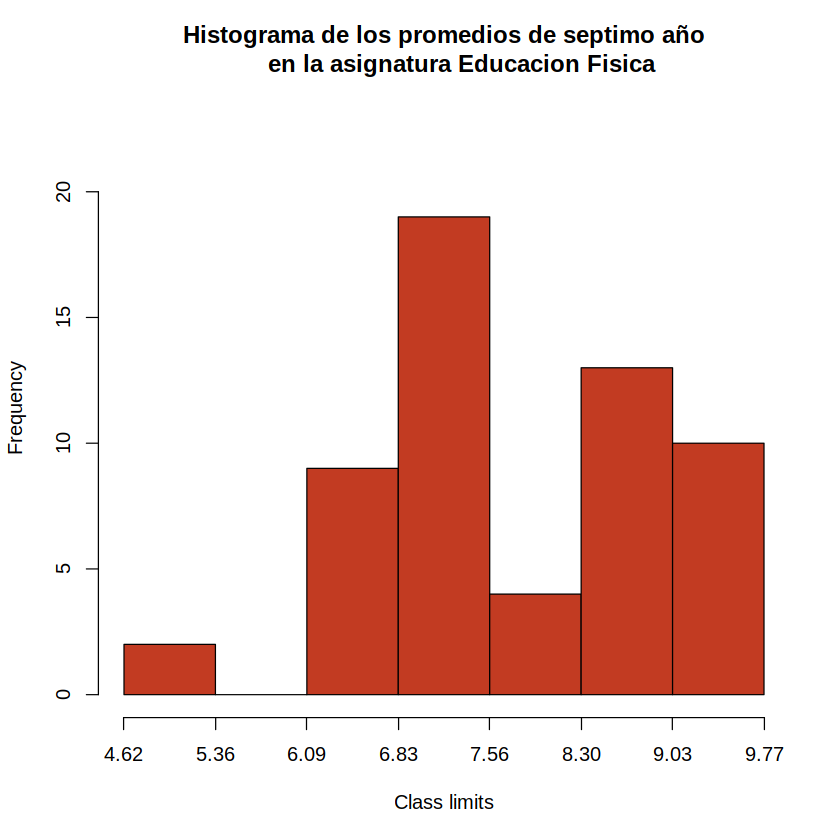

In [112]:
#Graficamos HISTOGRAMAS de los promedios de las materias de septimo año

#MATEMATICA
Notas_matematica <- SEPTIMO_Victoria_secundaria %>%
  filter(asignatura == "MATEMATICA") 
Grafico <- fdt(Notas_matematica$Promedio, breaks= "Sturges", na.rm= TRUE)
plot(Grafico,
     type= "fh",
     col= naranja,
     main= "Histograma de los promedios de septimo año
     en la asignatura Matemática",
     col.sub= "black",)

#EDUCACION FISICA
Notas_ef <- SEPTIMO_Victoria_secundaria %>%
  filter(asignatura == "EDUCACION FISICA") 
Grafico <- fdt(Notas_ef$Promedio, breaks= "Sturges", na.rm= TRUE)
plot(Grafico,
     type= "fh",
     col= rojo_pastel,
     main= "Histograma de los promedios de septimo año
     en la asignatura Educacion Fisica",
     col.sub= "black",)

## Calculo matriz de correlacion y correlacion parcial

In [114]:
#install.packages("corrplot")  # Instalar el paquete corrplot si no está instalado
library(corrplot)  # Cargar el paquete corrplot

In [116]:
#install.packages("ppcor")  # Instalar el paquete ppcor si no está instalado
library(ppcor)  # Cargar el paquete ppcor

### Primero

In [13]:
# Unimos en un data frame las materias seleccionadas para calcular correlaciones
df <- suppressWarnings(dplyr::select(filter(PRIMERO_Victoria_secundaria,asignatura == "MATEMATICA"),"Documento","Promedio") %>%
    	inner_join(dplyr::select(filter(PRIMERO_Victoria_secundaria,asignatura == "LENGUA Y LITERATURA"),"Documento","Promedio"),by="Documento")%>%
    	inner_join(dplyr::select(filter(PRIMERO_Victoria_secundaria,asignatura == "INGLES"),"Documento","Promedio"),by="Documento")%>%
    	inner_join(dplyr::select(filter(PRIMERO_Victoria_secundaria,asignatura == "EDUCACION FISICA"),"Documento","Promedio"),by="Documento")%>%
    	inner_join(dplyr::select(filter(PRIMERO_Victoria_secundaria,asignatura == "HISTORIA"),"Documento","Promedio"),by="Documento")%>%
    	inner_join(dplyr::select(filter(PRIMERO_Victoria_secundaria,asignatura == "GEOGRAFIA"),"Documento","Promedio"),by="Documento"))

In [14]:
#Renombramos las columnas
df <- rename(df,Prom_Mat=Promedio.x, Prom_Leng=Promedio.y, Prom_Ing=Promedio.x.x,
         	Prom_ef=Promedio.y.y,Prom_Hist=Promedio.x.x.x, Prom_Geo=Promedio.y.y.y)

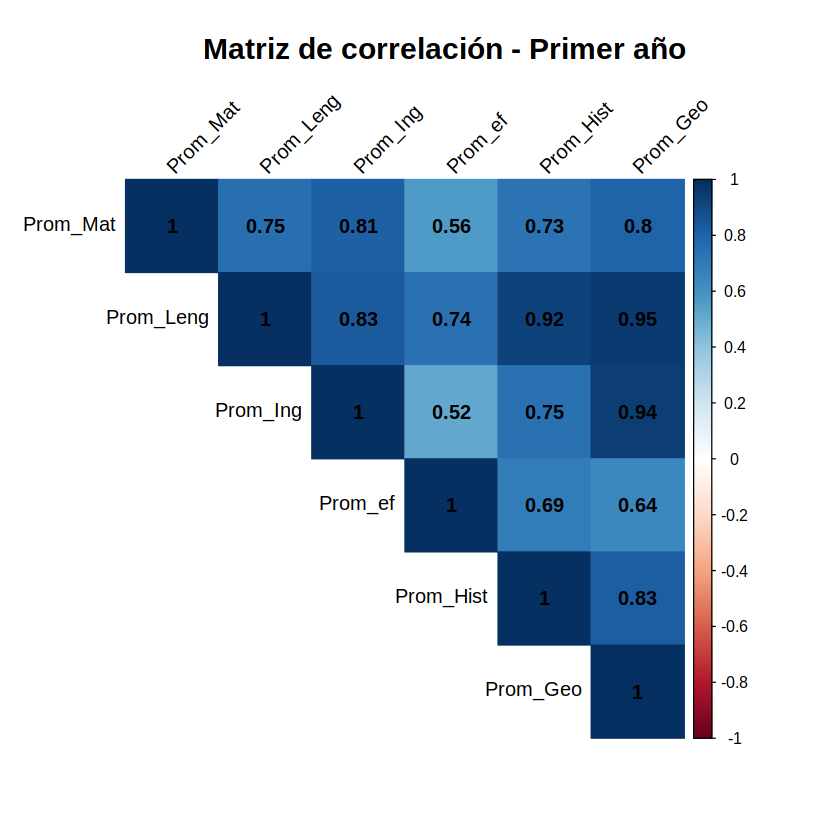

In [15]:
# Gráfico de la matriz de correlación
matriz_correlacion <- cor(df[, -1], method="spearman")
corrplot(matriz_correlacion, method = "color", type = "upper", 
         addCoef.col = "black", tl.col = "black", tl.srt = 45)
title("Matriz de correlación - Primer año", cex.main = 1.5)

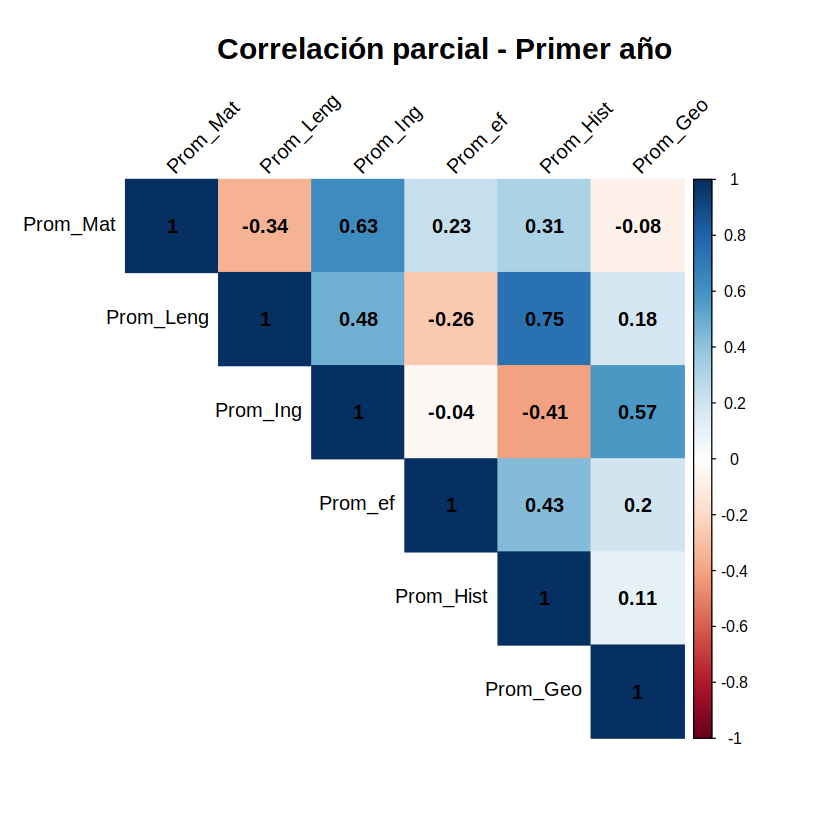

In [16]:
# Gráfico de correlación parcial
correlacion_parcial <- pcor(df[, -1], method = "pearson")$estimate
corrplot(correlacion_parcial, method = "color", type = "upper", 
         addCoef.col = "black", tl.col = "black", tl.srt = 45)
title("Correlación parcial - Primer año", cex.main = 1.5)